In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_colwidth = 999

In [2]:
df = pd.read_csv('./datos/top_consultas.csv')

In [3]:
metadatos = pd.read_csv('./datos/series-tiempo-metadatos.csv')
metadatos.nunique().sort_values()

catalogo_id                      1
serie_discontinuada              2
serie_actualizada                2
distribucion_descripcion         2
indice_tiempo_frecuencia         5
dataset_tema                     8
dataset_fuente                  28
serie_dias_no_cubiertos         87
serie_unidades                 135
dataset_descripcion            257
serie_indice_final             260
dataset_responsable            268
dataset_titulo                 268
dataset_id                     268
serie_indice_inicio            322
consultas_30_dias              331
serie_valores_cant             393
consultas_90_dias              557
distribucion_titulo            649
distribucion_id                657
consultas_180_dias             661
distribucion_url_descarga      662
consultas_total               1720
serie_titulo                  7870
serie_descripcion            11058
serie_valor_anterior         16872
serie_valor_ultimo           16977
serie_var_pct_anterior       17289
serie_id            

In [4]:
distrib_consultas = metadatos.groupby(['distribucion_id', 'distribucion_titulo', 'indice_tiempo_frecuencia', 'distribucion_url_descarga'])[['consultas_180_dias']].sum()
distrib_consultas.to_csv('./datos/distrib_consultas.csv')


In [5]:
distrib_consultas.sort_values('consultas_180_dias', ascending=False)

x = distrib_consultas['consultas_180_dias'].sort_values(ascending=False)
(x.cumsum()/x.sum() < .9).sum() # 2630

x.iloc[:316].sort_index().to_csv('./datos/dist_top_consultas.csv')

In [6]:
df[['serie_titulo', 'serie_descripcion', 'serie_unidades']]

serie_titulo  \
0                         tipo_cambio_real_multilateral_actual   
1                                              ipc_2016_nucleo   
2                       ipc_ng_nacional_tasa_variacion_mensual   
3                                             tasas_interes_pm   
4                                     tipo_cambio_bna_vendedor   
5                                          ica_saldo_comercial   
6                            eph_continua_tasa_desempleo_total   
7                           asalariados_priv_sin_estac_cordoba   
8                                                       merval   
9                                     total_recaudacion_var_ia   
10                                  emae_desestacionalizada_vm   
11                                                ff_eeuu_tasa   
12                                                     cemento   
13                                  ipc_nivel_general_nacional   
14                                               emae_original   
15                                                construccion   
16                                     industria_manufacturera   
17                                     rem_ipc_nac_var_ia_t_12   
18                                         ipc_nucleo_nacional   
19                                                  uva_diario   
20                                   dolar_referencia_com_3500   
21                                               nivel_general   
22                                        tasas_interes_badlar   
23                                               nivel_general   
24                                          tasas_interes_call   
25                                         ipc_2016_nivgeneral   
26                            reservas_internacionales_dolares   
27                                        dolar_estadounidense   
28                         tasas_interes_plazo_fijo_30_59_dias   
29                                       tipo_cambio_valuacion   
30               ipc_alimentos_bebidas_no_alcoholicas_nacional   
31                                     emae_desestacionalizada   
32                                  instr_bcra_lebac_pesos_1_m   
33                                        saldo_base_monetaria   
34    otras_operaciones_tesoro_nacional_adelantos_transitorios   
35                    compras_netas_divisas_al_tesoro_nacional   
36                     otras_operaciones_tesoro_nacional_resto   
37               compras_netas_divisas_al_sector_privado_otros   
38                                    pases_redescuentos_total   
39                                 compras_netas_divisas_total   
40  otras_operaciones_tesoro_nacional_transferencia_utilidades   
41                     otras_operaciones_tesoro_nacional_total   
42                                               nivel_general   
43                               tipo_cambio_implicito_en_adrs   
44                                      ipc_2016_nivel_general   
45                                                  ay24_yield   
46                                                  ao20_yield   
47                                                  dica_yield   
48                                            ica_expo_totales   
49                                                       ripte   

                                                                         serie_descripcion  \
0                                               Índice de Tipo de Cambio Real Multilateral   
1                                                  IPC-GBA. Núcleo. Base abr 2016. Mensual   
2                  IPC. Tasa de variación mensual. Nivel General. Nacional. Base dic 2016.   
3                                       Instrumentos del BCRA. Tasa de Política Monetaria.   
4                                                            Tipo de Cambio BNA (Vendedor)   
5                                                 Saldo comercial. En millones de dólares.   
6                        

In [7]:
# Leer el archivo CSV que contiene los valores de las series de tiempo en otro DataFrame\n,
series_tiempo_valores = pd.read_csv('./datos/series-tiempo-valores.csv')
# series_tiempo_valores = series_tiempo_valores.loc[series_tiempo_valores.serie_id.isin(top_series)] # Filtrar los IDs de las series principales\n,
series_tiempo_valores['indice_tiempo'] = pd.to_datetime(series_tiempo_valores['indice_tiempo']) # Convertir la columna 'indice_tiempo' al tipo de dato 'datetime'\n,
series_tiempo_valores.set_index('indice_tiempo', inplace=True)
numeric_df = series_tiempo_valores.select_dtypes(include=[np.number]) # Seleccionar las columnas numéricas del DataFrame filtrado\n,

# # Agrupar el DataFrame numérico por 'serie_id' y muestrear con frecuencia mensual, agregando los valores promedio\n,
# grouped_df = numeric_df.groupby(series_tiempo_valores.serie_id).resample('M').mean()

# # Restablecer el índice para convertir los datos agrupados en un DataFrame\n,
# grouped_df = grouped_df.reset_index()

In [8]:
import pandas as pd
import numpy as np

def compute_correlations(df, column_name, min_periods=1, method='pearson'):
    """
    Compute correlations of a specific column with all other columns in a DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column for which to compute correlations.
    min_periods (int): Minimum number of observations required per pair of columns to have a valid result.
    method (str): Method of correlation:
        * pearson : standard correlation coefficient
        * kendall : Kendall Tau correlation coefficient
        * spearman : Spearman rank correlation

    Returns:
    pd.Series: A Series containing the correlation coefficients.
    """
    # Find the full column tuple that corresponds to the given column name
    column_tuple = df.columns[df.columns.get_level_values(0) == column_name][0]
    
    
    # Select the column of interest
    target_series = df[column_tuple]
    
    # Initialize the result Series
    result = pd.Series(index=df.columns, dtype='float64')
    
    # Compute correlations
    for col in df.columns:
        valid = target_series.notna() & df[col].notna()
        if valid.sum() >= min_periods:
            result[col] = target_series[valid].corr(df[col][valid], method=method)
    
    # Drop the original column from the result
    result = result.drop(column_tuple)
    
    # Create a MultiIndex for the result
    result_index = pd.MultiIndex.from_tuples(result.index, names=['serie_id', 'indice_tiempo_frecuencia'])
    result.index = result_index
    
    result= result.reset_index().rename(columns = {0: 'corrw'})
    
    return result


In [9]:
consultas = pd.read_csv('./datos/consultas.csv')
serie = pd.read_csv('./datos/serie.csv')


In [10]:
serie.head()

serie_id            serie_id.1                    serie_titulo  \
0  1.1_DGCP_D_1993_A_27  1.1_DGCP_D_1993_A_27     demanda_global_consumo_priv   
1  1.1_DGCP_D_1993_A_30  1.1_DGCP_D_1993_A_30  demanda_global_consumo_publico   
2   1.1_DGE_D_1993_A_26   1.1_DGE_D_1993_A_26      demanda_global_exportacion   
3   1.1_DGI_D_1993_A_19   1.1_DGI_D_1993_A_19             demanda_global_ibif   
4   1.1_OGI_D_1993_A_25   1.1_OGI_D_1993_A_25       oferta_global_importacion   

                        serie_unidades  \
0  Millones de pesos a precios de 1993   
1  Millones de pesos a precios de 1993   
2  Millones de pesos a precios de 1993   
3  Millones de pesos a precios de 1993   
4  Millones de pesos a precios de 1993   

                                                                            serie_descripcion  \
0               Consumo privado desestacionalizado, en millones de pesos de 1993 y Trimestral   
1               Consumo publico desestacionalizado, en millones de pesos de 1993 y Trimestral   
2                Exportaciones desestacionalizadas, en millones de pesos de 1993 y Trimestral   
3  Inversion bruta interna fija desestacionalizada, en millones de pesos de 1993 y Trimestral   
4                Importaciones desestacionalizadas, en millones de pesos de 1993 y Trimestral   

  serie_indice_inicio serie_indice_final  serie_valores_cant  \
0          1993-01-01         2012-01-01                  20   
1          1993-01-01         2012-01-01                  20   
2          1993-01-01         2012-01-01                  20   
3          1993-01-01         2012-01-01                  20   
4          1993-01-01         2012-01-01                  20   

   serie_dias_no_cubiertos  serie_actualizada  serie_valor_ultimo  \
0                     3074                  0        62643.770104   
1                     3074                  0       316988.170499   
2                     3074                  0        53141.113279   
3                     3074                  0       106706.819487   
4                     3074                  0        65655.983349   

   serie_valor_anterior  serie_var_pct_anterior  serie_discontinuada  
0           58881.47300                0.063896                    1  
1          303623.48500                0.044017                    1  
2           57064.30975               -0.068750                    1  
3          112365.92175               -0.050363                    1  
4           69527.17350               -0.055679                    1

In [11]:
## Organizar los datos

unstacked = series_tiempo_valores.reset_index().drop_duplicates().set_index(['indice_tiempo', 'serie_id', 'indice_tiempo_frecuencia'])['valor'].unstack(0).T
data = unstacked.loc['2000':'2023'].dropna(how = 'all', axis = 1).dropna(how = 'all', axis = 0)

data_m = data.resample('M').mean()

In [18]:
def find_equivalent_series(df, consultas, series_info, focal_series, 
                            correlation_threshold=0.96, 
                            consultas_threshold=30, 
                            min_periods=20):
    """
    Find time series that are nearly equivalent to the focal series.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the time series data.
    consultas (pd.DataFrame): The DataFrame containing the consultation information.
    series_info (pd.DataFrame): The DataFrame containing additional information about the series.
    focal_series (str): The ID of the focal time series.
    correlation_threshold (float): The threshold for considering two series as nearly equivalent.
    consultas_threshold (int): The minimum number of consultations required to consider a series.
    min_periods (int): The minimum number of non-missing observations required to compute the correlation.

    Returns:
    pd.DataFrame: A DataFrame containing information about the nearly equivalent series.
    """

    # df = df.apply(pd.to_numeric, errors='coerce').fillna(0)

    # Compute correlations
    correlations = compute_correlations(df, focal_series, min_periods=min_periods)

    correlations = correlations.apply(pd.to_numeric, errors='coerce').fillna(0)
    
    # Filter based on correlation threshold
    equivalent_series = correlations[abs(correlations) > correlation_threshold].dropna()
    
    # Reset index for merging
    equivalent_series = equivalent_series.reset_index()
    
    # Merge with consultation information
    equivalent_series = equivalent_series.merge(consultas[['serie_id', 'consultas_180_dias']], 
                                                on='serie_id', how='left')
    
    # Merge with series information
    equivalent_series = equivalent_series.merge(series_info[['serie_id', 'serie_titulo', 
                                                             'serie_unidades', 'serie_descripcion']], 
                                                on='serie_id', how='left')
    
    # Filter based on consultation threshold
    equivalent_series = equivalent_series[equivalent_series.consultas_180_dias > consultas_threshold]
    
    # Sort results
    equivalent_series = equivalent_series.sort_values(by='serie_id')
    
    return equivalent_series


In [19]:
column = '38.3_CEM_1994_M_7'
threshold = 0.96
consultas_threshold = 30
min_periods = 20

result = find_equivalent_series(data_m, consultas, serie, column, threshold, consultas_threshold, min_periods)


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 120

In [21]:
column = '116.4_TCRZE_2015_D_36_4'
equivalent_series = find_equivalent_series(data_m, consultas, serie, column, threshold, consultas_threshold, min_periods)

In [24]:
# Step 1: Extract 'serie_id' and 'indice_tiempo_frecuencia' values
series_tuples = equivalent_series[['serie_id', 'indice_tiempo_frecuencia']].apply(tuple, axis=1).tolist()

# Step 2: Use these tuples to select columns from 'data_m'
selected_data = data[series_tuples]

filtered_data = selected_data.loc[:, selected_data.columns.get_level_values('serie_id').str.startswith('116.')]

# # Step 1: Create a dictionary for renaming series
# rename_dict = equivalent_series.set_index(['serie_id', 'indice_tiempo_frecuencia'])['serie_titulo'].to_dict()

# # Step 2: Rename the columns of filtered_data
# filtered_data = filtered_data.rename(columns=rename_dict)


TypeError: no numeric data to plot

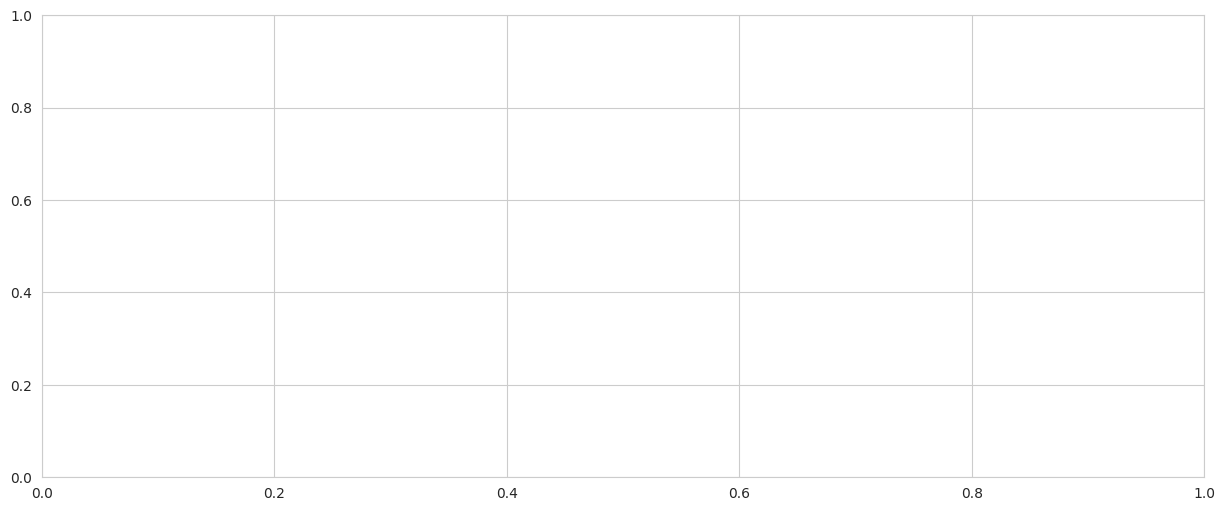

In [25]:

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Step 3: Plot the data
fig, ax = plt.subplots(figsize=(15, 6))

# Plot the data
filtered_data.plot(ax=ax, linewidth=1, alpha = .6)

# Adding grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set the minimum y-axis limit to 0
ax.set_ylim(bottom=0)

# Add titles and labels
ax.set_title('Tipo de Cambio Real', fontsize=16)
ax.set_xlabel('Anio', fontsize=12)
ax.set_ylabel('Valor', fontsize=12)

# Move the legend out of the plot
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)

plt.tight_layout()
plt.show()


# Tasas de interes

In [26]:
column = '89.2_TS_INTE_PM_0_D_16'
equivalent_series = find_equivalent_series(data_m, consultas, serie, column, threshold, consultas_threshold, min_periods)


In [27]:
equivalent_series

Empty DataFrame
Columns: [index, indice_tiempo_frecuencia, corrw, consultas_180_dias, serie_id, serie_titulo, serie_unidades, serie_descripcion]
Index: []

In [28]:

series_tuples = equivalent_series[['serie_id', 'indice_tiempo_frecuencia']].apply(tuple, axis=1).tolist()
selected_data = data_m[series_tuples]


# aa19_cotizacion = selected_data.loc[:, selected_data.columns.get_level_values('serie_id').str.startswith('179.')]
# rem_ipc_nac_var_ia_ = selected_data.loc[:, selected_data.columns.get_level_values('serie_id').str.startswith('430.')]
# tasas_interes_badlar = selected_data.loc[:, selected_data.columns.get_level_values('serie_id').str.startswith('89.')]
# tasa_interes_prestamos_interfinancieros_hasta_15d_pesos = selected_data.loc[:, selected_data.columns.get_level_values('serie_id').str.startswith('174.')]



In [29]:
import numpy as np
import pandas as pd

def align_time_series(data, anchor_col=None):
    # Step 1: Resample to monthly frequency
    data_resampled = data.resample('M').mean()
    
    # If no anchor column provided, use the first column
    if anchor_col is None:
        anchor_col = data_resampled.columns[0]
    
    # Initialize the aligned data with the anchor column
    aligned_data = data_resampled[[anchor_col]].copy()
    
    # Step 3: Iterate over the other columns
    for col in data_resampled.columns:
        if col == anchor_col:
            continue
        
        # Step 4: Find Proportionality Factor
        # Minimize the squared difference to the median of the aligned data
        def objective(factor):
            return np.sum((data_resampled[col] * factor - aligned_data.median(axis=1))**2)
        
        from scipy.optimize import minimize_scalar
        result = minimize_scalar(objective)
        
        # Step 5: Apply Proportionality Factor
        aligned_data[col] = data_resampled[col] * result.x
    
    return aligned_data


In [30]:
aligned_data = align_time_series(selected_data, anchor_col='89.2_TS_INTELAR_0_D_20')


KeyError: "['89.2_TS_INTELAR_0_D_20'] not in index"

NameError: name 'aligned_data' is not defined

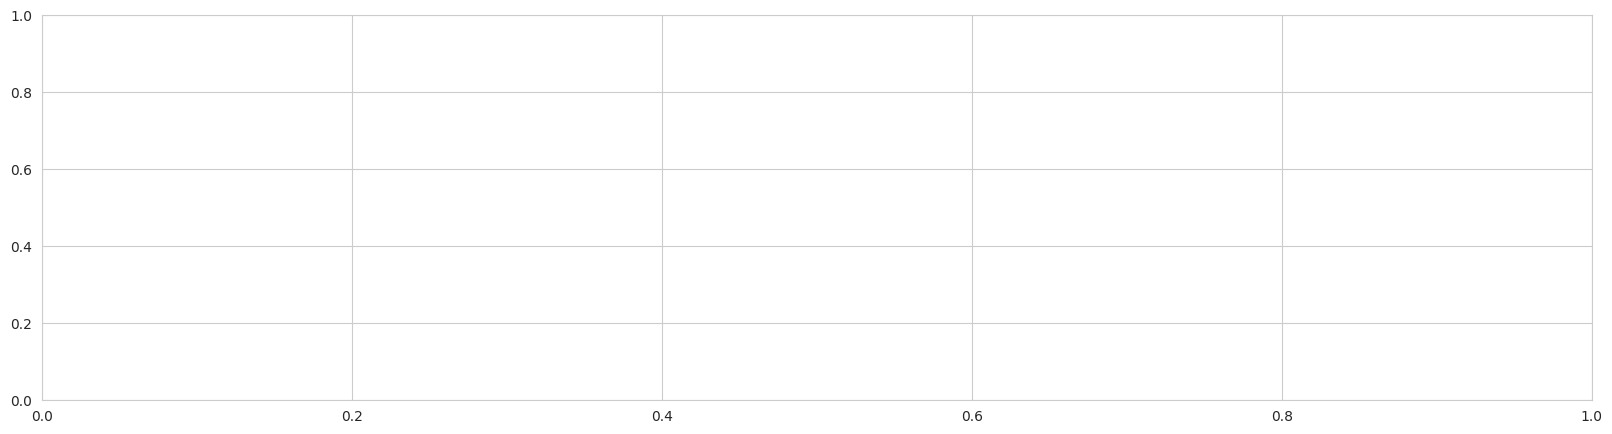

In [32]:

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Step 3: Plot the data
fig, ax = plt.subplots(figsize=(20, 5))

# Plot the data
# filtered_data.plot()
aligned_data.plot(ax=ax, linewidth=1, alpha = .8)

# Adding grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set the minimum y-axis limit to 0
ax.set_ylim(bottom=0)

# Add titles and labels
ax.set_title('Tasa de Interes', fontsize=16)
ax.set_xlabel('Anio', fontsize=12)
ax.set_ylabel('Porcentaje', fontsize=12)

# Move the legend out of the plot
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)

plt.tight_layout()
plt.show()


# Empleo

In [33]:
column = '45.2_ECTDT_0_T_33'
equivalent_series = find_equivalent_series(data_m, consultas, serie, column, threshold, consultas_threshold, min_periods)


In [34]:
series_tuples = equivalent_series[['serie_id', 'indice_tiempo_frecuencia']].apply(tuple, axis=1).tolist()
selected_data = data_m[series_tuples]
selected_data

# aa19_cotizacion = selected_data.loc[:, selected_data.columns.get_level_values('serie_id').str.startswith('179.')]

Empty DataFrame
Columns: []
Index: [2000-01-31 00:00:00, 2000-02-29 00:00:00, 2000-03-31 00:00:00, 2000-04-30 00:00:00, 2000-05-31 00:00:00, 2000-06-30 00:00:00, 2000-07-31 00:00:00, 2000-08-31 00:00:00, 2000-09-30 00:00:00, 2000-10-31 00:00:00, 2000-11-30 00:00:00, 2000-12-31 00:00:00, 2001-01-31 00:00:00, 2001-02-28 00:00:00, 2001-03-31 00:00:00, 2001-04-30 00:00:00, 2001-05-31 00:00:00, 2001-06-30 00:00:00, 2001-07-31 00:00:00, 2001-08-31 00:00:00, 2001-09-30 00:00:00, 2001-10-31 00:00:00, 2001-11-30 00:00:00, 2001-12-31 00:00:00, 2002-01-31 00:00:00, 2002-02-28 00:00:00, 2002-03-31 00:00:00, 2002-04-30 00:00:00, 2002-05-31 00:00:00, 2002-06-30 00:00:00, 2002-07-31 00:00:00, 2002-08-31 00:00:00, 2002-09-30 00:00:00, 2002-10-31 00:00:00, 2002-11-30 00:00:00, 2002-12-31 00:00:00, 2003-01-31 00:00:00, 2003-02-28 00:00:00, 2003-03-31 00:00:00, 2003-04-30 00:00:00, 2003-05-31 00:00:00, 2003-06-30 00:00:00, 2003-07-31 00:00:00, 2003-08-31 00:00:00, 2003-09-30 00:00:00, 2003-10-31 00:00:00, 2003-11-30 00:00:00, 2003-12-31 00:00:00, 2004-01-31 00:00:00, 2004-02-29 00:00:00, 2004-03-31 00:00:00, 2004-04-30 00:00:00, 2004-05-31 00:00:00, 2004-06-30 00:00:00, 2004-07-31 00:00:00, 2004-08-31 00:00:00, 2004-09-30 00:00:00, 2004-10-31 00:00:00, 2004-11-30 00:00:00, 2004-12-31 00:00:00, 2005-01-31 00:00:00, 2005-02-28 00:00:00, 2005-03-31 00:00:00, 2005-04-30 00:00:00, 2005-05-31 00:00:00, 2005-06-30 00:00:00, 2005-07-31 00:00:00, 2005-08-31 00:00:00, 2005-09-30 00:00:00, 2005-10-31 00:00:00, 2005-11-30 00:00:00, 2005-12-31 00:00:00, 2006-01-31 00:00:00, 2006-02-28 00:00:00, 2006-03-31 00:00:00, 2006-04-30 00:00:00, 2006-05-31 00:00:00, 2006-06-30 00:00:00, 2006-07-31 00:00:00, 2006-08-31 00:00:00, 2006-09-30 00:00:00, 2006-10-31 00:00:00, 2006-11-30 00:00:00, 2006-12-31 00:00:00, 2007-01-31 00:00:00, 2007-02-28 00:00:00, 2007-03-31 00:00:00, 2007-04-30 00:00:00, 2007-05-31 00:00:00, 2007-06-30 00:00:00, 2007-07-31 00:00:00, 2007-08-31 00:00:00, 2007-09-30 00:00:00, 2007-10-31 00:00:00, 2007-11-30 00:00:00, 2007-12-31 00:00:00, 2008-01-31 00:00:00, 2008-02-29 00:00:00, 2008-03-31 00:00:00, 2008-04-30 00:00:00, ...]

[288 rows x 0 columns]

In [35]:
selected_data.loc[:, selected_data.columns.get_level_values('serie_id').str.startswith('42.3')].dropna().plot()
selected_data.loc[:, selected_data.columns.get_level_values('serie_id').str.startswith('45.2')].dropna().plot()

TypeError: no numeric data to plot

In [36]:
selected_data.loc[:, selected_data.columns.get_level_values('serie_id').str.startswith('325.2')].dropna().plot()

TypeError: no numeric data to plot

In [37]:
selected_data.loc[:, selected_data.columns.get_level_values('serie_id').str.startswith('16.2')].dropna().plot()

TypeError: no numeric data to plot

In [38]:
equivalent_series

Empty DataFrame
Columns: [index, indice_tiempo_frecuencia, corrw, consultas_180_dias, serie_id, serie_titulo, serie_unidades, serie_descripcion]
Index: []

In [39]:
column = '154.2_COBAOBA_S_0_0_7'
equivalent_series = find_equivalent_series(data_m, consultas, serie, column, threshold, consultas_threshold, min_periods)


In [40]:
equivalent_series

Empty DataFrame
Columns: [index, indice_tiempo_frecuencia, corrw, consultas_180_dias, serie_id, serie_titulo, serie_unidades, serie_descripcion]
Index: []

In [ ]:
## EMpleo por ramas:

# 66.2_CMMR_E_0_T_41	R/P3M	0.968645	61.0	comercio_mayorista_minorista_reparaciones	Miles de personas	Miles de puestos de trabajo declarados. Comercio Mayorista, Minorista y Reparaciones
# 27	66.2_M_E_0_T_19	R/P3M	0.987133	76.0	maquinarias_equipos	Miles de personas	Miles de puestos de trabajo declarados. Maquinarias y equipos
# 28	66.2_SP_E_0_T_14	R/P3M	0.961665	31.0	sector_privado	Miles de personas	Miles de puestos de trabajo declarados. Sector privado
# 29	66.2_TAC_E_0_T_40	R/P3M	0.964018	40.0	transporte_almacenamiento_comunicaciones	Miles de personas	Miles de puestos de trabajo declarados. Transporte, Almacenamiento y Comunicaciones
# 30	66.2_TM_E_0_T_29	R/P3M	0.972360	83.0	total_industria_manufacturera	Miles de personas	Miles de puestos de trabajo declarados. Total Industria manufacturera

In [ ]:
series_tuples = equivalent_series[['serie_id', 'indice_tiempo_frecuencia']].apply(tuple, axis=1).tolist()
selected_data = data_m[series_tuples]
selected_data


serie_id                 10.2_ISD_1993_T_31 10.3_ISD_1993_M_31  \
indice_tiempo_frecuencia              R/P3M              R/P1M   
indice_tiempo                                                    
2000-01-31                       118.212322         117.916341   
2000-02-29                              NaN         118.643355   
2000-03-31                              NaN         118.077269   
2000-04-30                       116.198519         117.148142   
2000-05-31                              NaN         115.721309   
...                                     ...                ...   
2023-08-31                              NaN                NaN   
2023-09-30                              NaN                NaN   
2023-10-31                              NaN                NaN   
2023-11-30                              NaN                NaN   
2023-12-31                              NaN                NaN   

serie_id                 10.3_ITS_1993_M_26 152.1_TL_SIN_EST_2009_M_13  \
indice_tiempo_frecuencia              R/P1M                      R/P1M   
indice_tiempo                                                            
2000-01-31                       118.313366                        NaN   
2000-02-29                       118.132418                        NaN   
2000-03-31                       117.791471                        NaN   
2000-04-30                       117.354234                        NaN   
2000-05-31                       116.893372                        NaN   
...                                     ...                        ...   
2023-08-31                              NaN                        NaN   
2023-09-30                              NaN                        NaN   
2023-10-31                              NaN                        NaN   
2023-11-30                              NaN                        NaN   
2023-12-31                              NaN                        NaN   

serie_id                 154.1_COBAOBA_C_0_0_7 154.1_SA_FE_FE_C_0_0_8  \
indice_tiempo_frecuencia                 R/P1M                  R/P1M   
indice_tiempo                                                           
2000-01-31                                 NaN                    NaN   
2000-02-29                                 NaN                    NaN   
2000-03-31                                 NaN                    NaN   
2000-04-30                                 NaN                    NaN   
2000-05-31                                 NaN                    NaN   
...                                        ...                    ...   
2023-08-31                                 NaN                    NaN   
2023-09-30                                 NaN                    NaN   
2023-10-31                                 NaN                    NaN   
2023-11-30                                 NaN                    NaN   
2023-12-31                                 NaN                    NaN   

serie_id                 154.2_SA_FE_FE_S_0_0_8 155.1_TLTAL_C_0_0_5  \
indice_tiempo_frecuencia                  R/P1M               R/P3M   
indice_tiempo                                                         
2000-01-31                                  NaN           4026798.0   
2000-02-29                                  NaN                 NaN   
2000-03-31                                  NaN                 NaN   
2000-04-30                                  NaN           3968337.0   
2000-05-31                                  NaN                 NaN   
...                                         ...                 ...   
2023-08-31                                  NaN                 NaN   
2023-09-30                                  NaN                 NaN   
2023-10-31                                  NaN                 NaN   
2023-11-30                                  NaN                 NaN   
2023-12-31                                  NaN                 NaN   

serie_id            

In [ ]:
# selected_data.loc[:, selected_data.columns.get_level_values('serie_id').str.startswith('10.3')].plot()

<Axes: xlabel='indice_tiempo'>

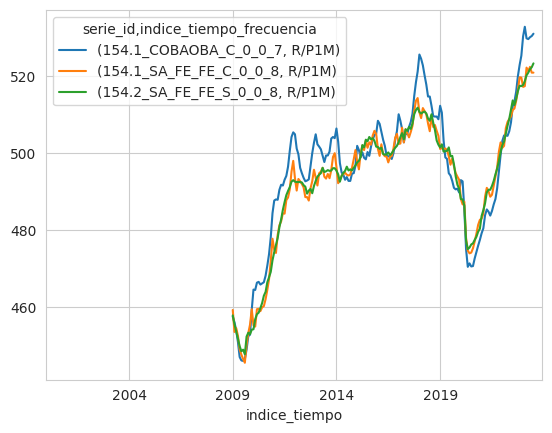

In [ ]:
selected_data.loc[:, selected_data.columns.get_level_values('serie_id').str.startswith('154')].plot()

<Axes: xlabel='indice_tiempo'>

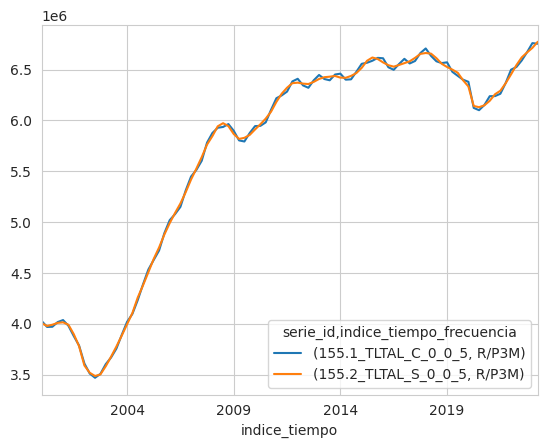

In [ ]:
selected_data.loc[:, selected_data.columns.get_level_values('serie_id').str.startswith('155')].dropna().plot()

<Axes: xlabel='indice_tiempo'>

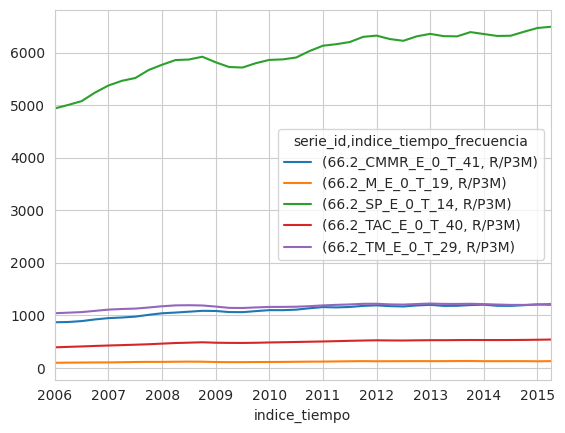

In [ ]:
# selected_data.loc[:, selected_data.columns.get_level_values('serie_id').str.startswith('179')].plot()

selected_data.loc[:, selected_data.columns.get_level_values('serie_id').str.startswith('66')].dropna().plot()

# Construccion

In [ ]:
column = '38.3_CEM_1994_M_7'
equivalent_series = find_equivalent_series(data_m, consultas, serie, column, threshold, consultas_threshold, min_periods)


In [ ]:
equivalent_series

serie_id indice_tiempo_frecuencia         0  \
0            1.2_DGI_D_1993_T_19                    R/P3M  0.969930   
3              12.3_MM_2004_M_19                    R/P1M  0.973661   
5           15.2_FPMNM_1997_T_44                    R/P3M  0.977491   
6             2.2_DGIC_1993_T_32                    R/P3M  0.973395   
7              2.2_DGI_1993_T_19                    R/P3M  0.969044   
18           32.3_IEOD_2004_M_29                    R/P1M  0.993089   
20            32.3_ING_2004_M_18                    R/P1M  0.990605   
24  33.3_ISAC_CEMENAND_0_0_21_29                    R/P1M  0.999582   
27       357.1_PBA_PARAGUUAY__12                    R/P1Y  0.960185   
28             38.1_CEM_1994_A_7                    R/P1Y  0.968461   
29             38.2_CEM_1994_T_7                    R/P3M  0.972799   
33     453.2_CEMENTONTO_0_0_7_59                    R/P1M  0.990231   
34               5.2_C_1993_T_12                    R/P3M  0.984482   
35                50.1_IT_0_0_12                    R/P1Y  0.966959   
36               51.1_IGC_0_0_19                    R/P1Y  0.963023   

    consultas_180_dias                                  serie_titulo  \
0                   33                           demanda_global_ibif   
3                   32                           minerales_metalicos   
5                   46  fabricacion_productos_minerales_no_metalicos   
6                   31              demanda_global_ibif_construccion   
7                   36                           demanda_global_ibif   
18                  33                 isac_edificios_otros_destinos   
20                  42                            isac_nivel_general   
24                  58                         isac_cemento_portland   
27                  47                                  pba_paraguay   
28                  47                                       cemento   
29                  42                                       cemento   
33                  40                                       cemento   
34                  33                                  construccion   
35                 172                                  indice_total   
36                  75                           indice_gran_cordoba   

                         serie_unidades  \
0   Millones de pesos a precios de 1993   
3                       Índice 2004=100   
5                       Índice 1997=100   
6   Millones de pesos a precios de 1993   
7   Millones de pesos a precios de 1993   
18                      Índice 2004=100   
20                      Índice 2004=100   
24                      Índice 2004=100   
27                  Millones de dolares   
28                   Miles de toneladas   
29                   Miles de toneladas   
33                    Índice 2004 = 100   
34  Millones de pesos a precios de 1993   
35                               Índice   
36                               Índice   

                                                                            serie_descripcion  
0                                      Consumo privado, en millones de pesos de 1993 y Anual.  
3                                                EMI. Minerales metálicos. Índice (Base 2004)  
5    Índice de Volumen Físico (IVF). Fabricación de productos minerales no metálicos. Anuales  
6    Inversion bruta interna fija en construccion, en millones de pesos de 1993 y Trimestral.  
7                    Inversion bruta interna fija, en millones de pesos de 1993 y Trimestral.  
18  Indicador sintético de la actividad de la construcción de edificicios para otros destinos  
20                                     Indicador sintético de la actividad de la construcción  
24          Indicador sintético de la actividad de la construcción. Insumos. Cemento portland  
27                                                           Datos exportaciones pba Paraguay  
28          Ventas al mercado interno de Producción Nacional de cemento en miles de t

In [ ]:
series_tuples = equivalent_series[['serie_id', 'indice_tiempo_frecuencia']].apply(tuple, axis=1).tolist()
selected_data = data_m[series_tuples]


In [ ]:
aligned_data = align_time_series(selected_data, anchor_col='32.3_ING_2004_M_18')


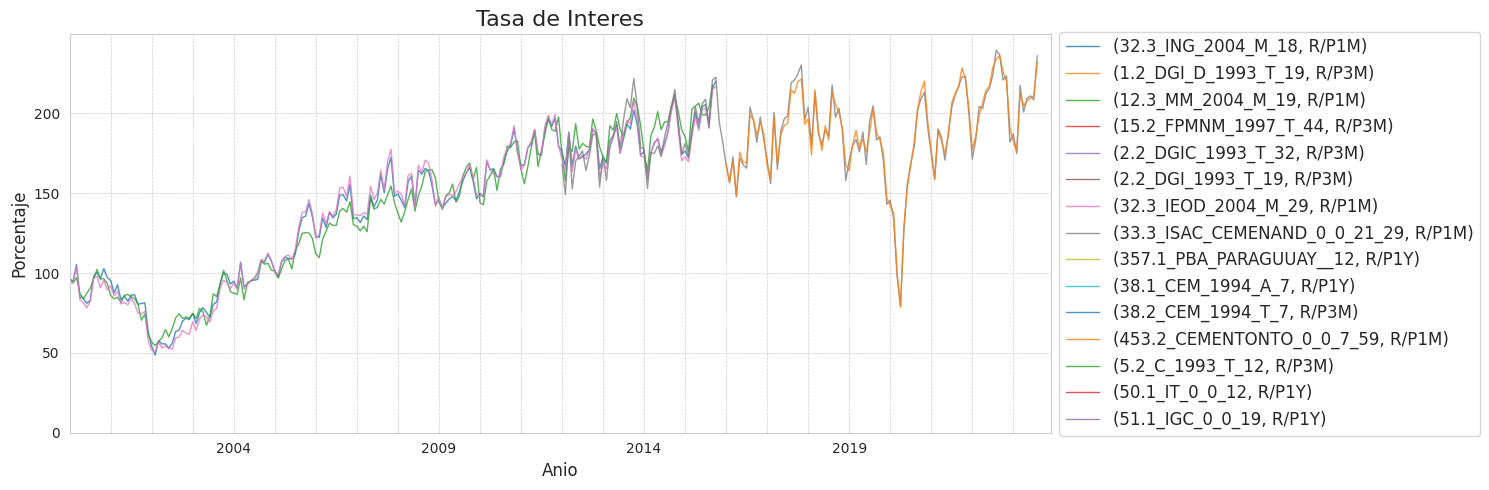

In [ ]:

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Step 3: Plot the data
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the data
# filtered_data.plot()
aligned_data.plot(ax=ax, linewidth=1, alpha = .8)

# Adding grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set the minimum y-axis limit to 0
ax.set_ylim(bottom=0)

# Add titles and labels
ax.set_title('Cemento / Construccion', fontsize=16)
ax.set_xlabel('Anio', fontsize=12)
ax.set_ylabel('Porcentaje', fontsize=12)

# Move the legend out of the plot
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)

plt.tight_layout()
plt.show()


# Producto

In [ ]:
column = '143.3_NO_PR_2004_A_21'
equivalent_series = find_equivalent_series(data_m, consultas, serie, column, threshold, consultas_threshold, min_periods)


KeyboardInterrupt: 

In [ ]:
series_tuples = equivalent_series[['serie_id', 'indice_tiempo_frecuencia']].apply(tuple, axis=1).tolist()
selected_data = data_m[series_tuples]


In [ ]:
aligned_data = align_time_series(selected_data, anchor_col='4.2_OGP_2004_T_17')

In [ ]:
aligned_data.dropna().shape

(39, 7)

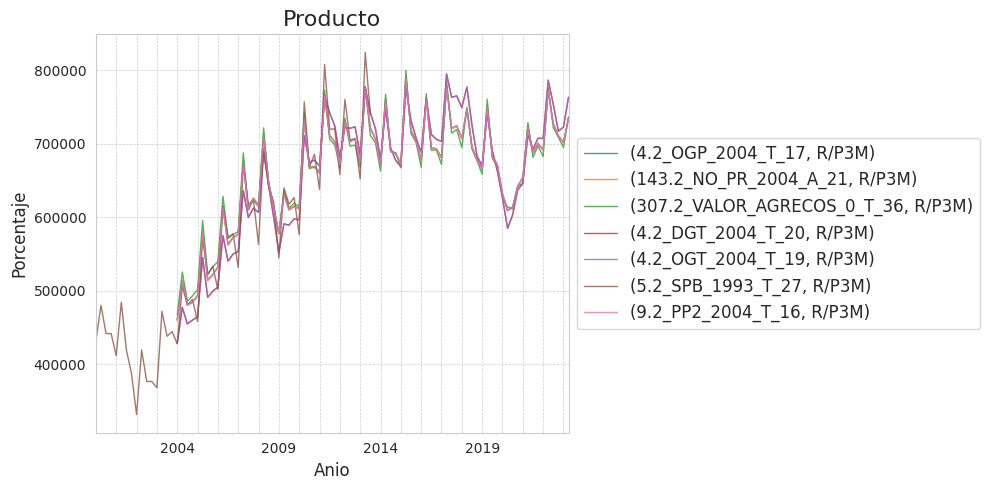

In [ ]:

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Step 3: Plot the data
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the data
# filtered_data.plot()
aligned_data.dropna(how = 'all').plot(ax=ax, linewidth=1, alpha = .8)

# Adding grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set the minimum y-axis limit to 0
# ax.set_ylim(bottom=0)

# Add titles and labels
ax.set_title('Producto', fontsize=16)
ax.set_xlabel('Anio', fontsize=12)
ax.set_ylabel('Porcentaje', fontsize=12)

# Move the legend out of the plot
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:

series_tuples = equivalent_series[['serie_id', 'indice_tiempo_frecuencia']].apply(tuple, axis=1).tolist()
selected_data = data_m[series_tuples]

aligned_data = align_time_series(selected_data, anchor_col='4.2_OGP_2004_T_17')
aligned_data.dropna().shape

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Step 3: Plot the data
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the data
# filtered_data.plot()
aligned_data.dropna(how = 'all').plot(ax=ax, linewidth=1, alpha = .8)

# Adding grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set the minimum y-axis limit to 0
# ax.set_ylim(bottom=0)

# Add titles and labels
ax.set_title('Producto', fontsize=16)
ax.set_xlabel('Anio', fontsize=12)
ax.set_ylabel('Porcentaje', fontsize=12)

# Move the legend out of the plot
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
top_consultas = pd.read_csv('./datos/top_consultas.csv')

for column in top_consultas.serie_id.unique():
    display(serie.loc[serie.serie_id == column][['serie_id', 'serie_titulo', 'serie_unidades', 'serie_descripcion']])

    result = find_equivalent_series(data_m, consultas, serie, column, threshold, consultas_threshold, min_periods)
    display(result)


serie_id                          serie_titulo  \
1068  116.4_TCRZE_2015_D_36_4  tipo_cambio_real_multilateral_actual   

              serie_unidades                           serie_descripcion  
1068  Índice 17-Dic-2015=100  Índice de Tipo de Cambio Real Multilateral

serie_id indice_tiempo_frecuencia         0  \
0           116.2_TCRCA_0_T_23                    R/P3M  0.979580   
1           116.2_TCRCH_0_T_22                    R/P3M  0.971996   
2           116.2_TCRMA_0_T_36                    R/P3M  0.991017   
3           116.2_TCRZE_0_T_26                    R/P3M  0.969189   
4           116.3_TCRCH_0_M_22                    R/P1M  0.983635   
5            116.3_TCRC_0_M_23                    R/P1M  0.985199   
6           116.3_TCRMA_0_M_36                    R/P1M  0.999996   
7           116.3_TCRZE_0_M_26                    R/P1M  0.974747   
8     116.4_TCRZE_2015_D_22_31                    R/P1D  0.983594   
9     116.4_TCRZE_2015_D_23_29                    R/P1D  0.985208   
10    116.4_TCRZE_2015_D_26_49                    R/P1D  0.974839   
11  179.1_AA19_COTIZION_0_0_15                    R/P1D  0.961325   
12  300.1_AP_ACT_TITFMI_0_M_59                    R/P1M  0.968581   

    consultas_180_dias  \
0                   57   
1                   53   
2                   81   
3                   69   
4                   69   
5                   72   
6                 1699   
7                   84   
8                   66   
9                  100   
10                  67   
11                 211   
12                  73   

                                                   serie_titulo  \
0                                       tipo_cambio_real_canada   
1                                        tipo_cambio_real_chile   
2                          tipo_cambio_real_multilateral_actual   
3                                    tipo_cambio_real_zona_euro   
4                                        tipo_cambio_real_chile   
5                                       tipo_cambio_real_canada   
6                          tipo_cambio_real_multilateral_actual   
7                                    tipo_cambio_real_zona_euro   
8                                        tipo_cambio_real_chile   
9                                       tipo_cambio_real_canada   
10                                   tipo_cambio_real_zona_euro   
11                                              aa19_cotizacion   
12  ap_act_tit_pub_ley_extranjera_letras_sobre_obligaciones_fmi   

            serie_unidades  \
0   Índice 17-Dic-2015=100   
1   Índice 17-Dic-2015=100   
2   Índice 17-Dic-2015=100   
3   Índice 17-Dic-2015=100   
4   Índice 17-Dic-2015=100   
5   Índice 17-Dic-2015=100   
6   Índice 17-Dic-2015=100   
7   Índice 17-Dic-2015=100   
8   Índice 17-Dic-2015=100   
9   Índice 17-Dic-2015=100   
10  Índice 17-Dic-2015=100   
11                 Dólares   
12          Miles de pesos   

                                                                                       serie_descripcion  
0                                                                   Índice de Tipo de Cambio Real Canadá  
1                                                                    Índice de Tipo de Cambio Real Chile  
2                                                             Índice de Tipo de Cambio Real Multilateral  
3                                                                Índice de Tipo de Cambio Real Zona Euro  
4                                                                    Índice de Tipo de Cambio Real Chile  
5                                                                   Índice de Tipo de Cambio Real Canadá  
6                                                             Índice de Tipo de Cambio Real Multilateral  
7                                                                Índice de Tipo de Cambio Real Zona Euro  
8                                                                    Índice de Tipo de Cambio Real Chile  
9                                                                   Índice de Tipo de Cambio Real Canadá  
10                                                               Índice de Tipo de Cambio Real Zona Euro  
11                                            

serie_id     serie_titulo       serie_unidades  \
136  103.1_I2N_2016_M_15  ipc_2016_nucleo  Índice Dic-2016=100   

                           serie_descripcion  
136  IPC-GBA. Núcleo. Base abr 2016. Mensual

serie_id indice_tiempo_frecuencia         0  \
0            101.1_I2ABA_2016_M_28                    R/P1M  0.999079   
1             101.1_I2AB_2016_M_26                    R/P1M  0.999525   
2            101.1_I2AMS_2016_M_30                    R/P1M  0.999380   
3            101.1_I2BSV_2016_M_15                    R/P1M  0.999146   
4            101.1_I2EDH_2016_M_31                    R/P1M  0.999697   
...                            ...                      ...       ...   
1667  92.2_PASIVOS_MOIOS_0_0_18_34                    R/P1D  0.975409   
1668  92.2_TIPO_CAMBIION_0_0_21_24                    R/P1D  0.988331   
1669              94.2_CD_D_0_0_10                    R/P1D  0.999157   
1670            94.2_UVAD_D_0_0_10                    R/P1D  0.999139   
1671            94.2_UVID_D_0_0_10                    R/P1D  0.995830   

      consultas_180_dias                      serie_titulo  \
0                   53.0      ipc_2016_bebidas_alcoholicas   
1                   53.0        ipc_2016_alimentos_bebidas   
2                   49.0    ipc_2016_atencion_medica_salud   
3                   62.0  ipc_2016_bienes_servicios_varios   
4                   55.0   ipc_2016_equipamiento_del_hogar   
...                  ...                               ...   
1667                58.0                pasivos_monetarios   
1668               516.0             tipo_cambio_valuacion   
1669              2816.0                        cer_diario   
1670              9652.0                        uva_diario   
1671              3182.0                        uvi_diario   

                  serie_unidades  \
0            Índice Dic-2016=100   
1            Índice Dic-2016=100   
2            Índice Dic-2016=100   
3            Índice Dic-2016=100   
4            Índice Dic-2016=100   
...                          ...   
1667           Millones de pesos   
1668  Pesos argentinos por dólar   
1669        Índice 02-feb-2002=1   
1670    Índice 31-mar-2016=14,05   
1671    Índice 31-mar-2016=14,05   

                                               serie_descripcion  
0           IPC-GBA. Bebidas alcohólicas. Base abr 2016. Mensual  
1           IPC-GBA. Alimentos y Bebidas. Base abr 2016. Mensual  
2       IPC-GBA. Atención médica y salud. Base abr 2016. Mensual  
3     IPC-GBA. Bienes y servicios varios. Base abr 2016. Mensual  
4        IPC-GBA. Equipamiento del hogar. Base abr 2016. Mensual  
...                                                          ...  
1667                    Pasivos monetarios, en millones de pesos  
1668                Tipo de cambio de valuación (peso por dólar)  
1669                                                  CER diario  
1670                                                  UVA diario  
1671                                                  UVI diario  

[788 rows x 7 columns]

serie_id                            serie_titulo  \
2087  145.3_INGNACUAL_DICI_M_38  ipc_ng_nacional_tasa_variacion_mensual   

              serie_unidades  \
2087  Variación intermensual   

                                                            serie_descripcion  
2087  IPC. Tasa de variación mensual. Nivel General. Nacional. Base dic 2016.

serie_id indice_tiempo_frecuencia         0  \
0    145.3_INGCUYUAL_DICI_M_34                    R/P1M  0.986183   
1    145.3_INGGBAUAL_DICI_M_33                    R/P1M  0.995669   
2    145.3_INGNEAUAL_DICI_M_33                    R/P1M  0.975361   
3    145.3_INGNOAUAL_DICI_M_33                    R/P1M  0.983499   
4    145.3_INGPAMUAL_DICI_M_38                    R/P1M  0.996530   
5    145.3_INGPATUAL_DICI_M_39                    R/P1M  0.973605   
6   173.1_INUCLEOLEO_DIC-_0_10                    R/P1M  0.979470   
13     347.1_GBA_NIVEL_UAL__25                    R/P1M  0.995041   
14     347.1_NEA_NIVEL_UAL__25                    R/P1M  0.969005   
15     347.1_NOA_NIVEL_UAL__25                    R/P1M  0.979898   

    consultas_180_dias                             serie_titulo  \
0                  153       ipc_ng_cuyo_tasa_variacion_mensual   
1                  202        ipc_ng_gba_tasa_variacion_mensual   
2                  169        ipc_ng_nea_tasa_variacion_mensual   
3                  156        ipc_ng_noa_tasa_variacion_mensual   
4                  157   ipc_ng_pampeana_tasa_variacion_mensual   
5                  152  ipc_ng_patagonia_tasa_variacion_mensual   
6                 1716                               ipc_nucleo   
13                  38                gba_nivel_general_mensual   
14                  37                nea_nivel_general_mensual   
15                  32                noa_nivel_general_mensual   

          serie_unidades  \
0   Variación Porcentual   
1   Variación Porcentual   
2   Variación Porcentual   
3   Variación Porcentual   
4   Variación Porcentual   
5   Variación Porcentual   
6   Variación porcentual   
13                Índice   
14                Índice   
15                Índice   

                                                                   serie_descripcion  
0                IPC. Tasa de variación mensual. Nivel General. Cuyo. Base dic 2016.  
1   IPC. Tasa de variación mensual. Nivel General. Gran Buenos Aires. Base dic 2016.  
2      IPC. Tasa de variación mensual. Nivel General. Región Noreste. Base dic 2016.  
3     IPC. Tasa de variación mensual. Nivel General. región Noroeste. Base dic 2016.  
4     IPC. Tasa de variación mensual. Nivel General. Región Pampeana. Base dic 2016.  
5   IPC. Tasa de variación mensual. Nivel General. Región Patagónica. Base dic 2016.  
6                                                                         IPC núcleo  
13                                     Incidencia absoluta mensual GBA nivel general  
14                                     Incidencia absoluta mensual NEA nivel general  
15                                     Incidencia absoluta mensual NOA nivel general

serie_id      serie_titulo      serie_unidades  \
19512  89.2_TS_INTE_PM_0_D_16  tasas_interes_pm  Porcentaje (0-100)   

                                        serie_descripcion  
19512  Instrumentos del BCRA. Tasa de Política Monetaria.

serie_id indice_tiempo_frecuencia         0  \
0            174.1_T_INTERO_0_0_57                    R/P1M  0.972602   
1       179.1_AA19_COTIZION_0_0_15                    R/P1D  0.975187   
2  430.1_MEDIANA_IP018_M_0_0_27_82                    R/P1M  0.963982   
3  430.1_REM_IPC_NA023_M_0_0_23_17                    R/P1M  0.988126   
4           89.2_TS_INTELAR_0_D_20                    R/P1D  0.970978   

   consultas_180_dias  \
0                  52   
1                 211   
2                 121   
3                  45   
4                7430   

                                              serie_titulo  \
0  tasa_interes_prestamos_interfinancieros_hasta_15d_pesos   
1                                          aa19_cotizacion   
2                                  rem_ipc_nac_var_ia_2018   
3                                  rem_ipc_nac_var_ia_2023   
4                                     tasas_interes_badlar   

         serie_unidades  \
0            Porcentaje   
1               Dólares   
2  Variación Porcentual   
3  Variación Porcentual   
4    Porcentaje (0-100)   

                                                                          serie_descripcion  
0  Tasa de interés Por préstamos interfinancieros hasta 15 días de plazo De moneda nacional  
1                                 Bono de la Nación Argentina Bonar 2025 - AA19. Cotización  
2                                                     REM: Mediana IPC Nacional var ia 2018  
3                                                     REM: Mediana IPC Nacional var ia 2023  
4                                          Tasas de interés publicadas por el BCRA. Badlar.

serie_id              serie_titulo  \
3675  168.1_T_CAMBIOR_D_0_0_26  tipo_cambio_bna_vendedor   

                  serie_unidades              serie_descripcion  
3675  Pesos argentinos por dólar  Tipo de Cambio BNA (Vendedor)

serie_id indice_tiempo_frecuencia         0  \
0            101.1_I2ABA_2016_M_28                    R/P1M  0.987947   
1             101.1_I2AB_2016_M_26                    R/P1M  0.988378   
2            101.1_I2AMS_2016_M_30                    R/P1M  0.991350   
3            101.1_I2BSV_2016_M_15                    R/P1M  0.990475   
4            101.1_I2EDH_2016_M_31                    R/P1M  0.990725   
...                            ...                      ...       ...   
1393  92.2_PASIVOS_MOIOS_0_0_18_34                    R/P1D  0.981918   
1394  92.2_TIPO_CAMBIION_0_0_21_24                    R/P1D  0.999943   
1395              94.2_CD_D_0_0_10                    R/P1D  0.990513   
1396            94.2_UVAD_D_0_0_10                    R/P1D  0.990195   
1397            94.2_UVID_D_0_0_10                    R/P1D  0.988251   

      consultas_180_dias                      serie_titulo  \
0                   53.0      ipc_2016_bebidas_alcoholicas   
1                   53.0        ipc_2016_alimentos_bebidas   
2                   49.0    ipc_2016_atencion_medica_salud   
3                   62.0  ipc_2016_bienes_servicios_varios   
4                   55.0   ipc_2016_equipamiento_del_hogar   
...                  ...                               ...   
1393                58.0                pasivos_monetarios   
1394               516.0             tipo_cambio_valuacion   
1395              2816.0                        cer_diario   
1396              9652.0                        uva_diario   
1397              3182.0                        uvi_diario   

                  serie_unidades  \
0            Índice Dic-2016=100   
1            Índice Dic-2016=100   
2            Índice Dic-2016=100   
3            Índice Dic-2016=100   
4            Índice Dic-2016=100   
...                          ...   
1393           Millones de pesos   
1394  Pesos argentinos por dólar   
1395        Índice 02-feb-2002=1   
1396    Índice 31-mar-2016=14,05   
1397    Índice 31-mar-2016=14,05   

                                               serie_descripcion  
0           IPC-GBA. Bebidas alcohólicas. Base abr 2016. Mensual  
1           IPC-GBA. Alimentos y Bebidas. Base abr 2016. Mensual  
2       IPC-GBA. Atención médica y salud. Base abr 2016. Mensual  
3     IPC-GBA. Bienes y servicios varios. Base abr 2016. Mensual  
4        IPC-GBA. Equipamiento del hogar. Base abr 2016. Mensual  
...                                                          ...  
1393                    Pasivos monetarios, en millones de pesos  
1394                Tipo de cambio de valuación (peso por dólar)  
1395                                                  CER diario  
1396                                                  UVA diario  
1397                                                  UVI diario  

[683 rows x 7 columns]

serie_id         serie_titulo       serie_unidades  \
18478  74.3_ISC_0_M_19  ica_saldo_comercial  Millones de dólares   

                              serie_descripcion  
18478  Saldo comercial. En millones de dólares.

Empty DataFrame
Columns: [serie_id, indice_tiempo_frecuencia, 0, consultas_180_dias, serie_titulo, serie_unidades, serie_descripcion]
Index: []

serie_id                       serie_titulo serie_unidades  \
17053  45.2_ECTDT_0_T_33  eph_continua_tasa_desempleo_total     Porcentaje   

                             serie_descripcion  
17053  Tasa de desempleo total. En porcentaje.

serie_id indice_tiempo_frecuencia         0  \
0         16.2_FMCIM_1997_T_55                    R/P3M -0.961066   
1         16.2_FPMNM_1997_T_44                    R/P3M -0.971060   
2            16.2_NG_1997_T_13                    R/P3M -0.965158   
3   313.1_EN_PORCENTPIB_0_T_21                    R/P3M  0.966204   
4      325.2_CONSTRUCCIION__12                    R/P3M -0.962806   
6      325.2_INDUSTRIA_ERA__23                    R/P3M -0.960532   
7    42.3_EPH_PUNTUAAIP_0_M_28                    R/P3M  0.979752   
8    42.3_EPH_PUNTUAGBA_0_M_28                    R/P3M  0.989918   
9    42.3_EPH_PUNTUATAL_0_M_30                    R/P3M  1.000000   
10          45.2_ECTDTG_0_T_37                    R/P3M  0.989568   
11         45.2_ECTDTPG_0_T_46                    R/P3M  0.980657   
12         45.2_ECTDTRP_0_T_49                    R/P3M  0.967882   
15           54.2_IOO_T_0_0_23                    R/P3M -0.964172   

    consultas_180_dias  \
0                 36.0   
1                 37.0   
2                 38.0   
3                 48.0   
4                 32.0   
6                 47.0   
7                 44.0   
8                 45.0   
9                220.0   
10               183.0   
11               186.0   
12               183.0   
15                36.0   

                                               serie_titulo  \
0   fabricacion_muebles_colchones_industrias_manufactureras   
1              fabricacion_productos_minerales_no_metalicos   
2                                             nivel_general   
3                                     en_porcentaje_del_pib   
4                                              construccion   
6                                   industria_manufacturera   
7                              eph_puntual_desocupacion_aip   
8                              eph_puntual_desocupacion_gba   
9                            eph_puntual_desocupacion_total   
10                    eph_continua_tasa_desempleo_total_gba   
11           eph_continua_tasa_desempleo_total_partidos_gba   
12        eph_continua_tasa_desempleo_total_region_pampeana   
15                                  indice_obreros_ocupados   

          serie_unidades  \
0        Índice 1997=100   
1        Índice 1997=100   
2        Índice 1997=100   
3    Porecentaje del PIB   
4   En millones de pesos   
6   En millones de pesos   
7             Porcentaje   
8             Porcentaje   
9             Porcentaje   
10            Porcentaje   
11            Porcentaje   
12            Porcentaje   
15                Índice   

                                                                                         serie_descripcion  
0   Índice de Obreros Ocupados (IOO). Fabricación de muebles, colchones (industria manufacturera). Anuales  
1               Índice de Obreros Ocupados (IOO). Fabricación de productos minerales no metálicos. Anuales  
2                                                Índice de Obreros Ocupados (IOO). Índice General. Anuales  
3                                                        Stock deuda externa privada en porcentaje del PIB  
4                                                                                             construcción  
6                                                                                  industria manufacturera  
7                                                                 Tasa de desocupación AIP. En porcentaje.  
8                                                                 Tasa de desocupación GBA. En porcentaje.  
9                                                               Tasa de desocupación total. En porcentaje.  
10                                               Tasa de desempleo total Gran Buenos Aires. En porcentaje.  
11                                                    Tasa de desempleo total partidos GBA. En porcentaje.  
12                                                 Tasa de desempleo total región pampeana. En porcentaje.

serie_id                        serie_titulo  \
2485  154.2_COBAOBA_S_0_0_7  asalariados_priv_sin_estac_cordoba   

         serie_unidades  \
2485  Miles de personas   

                                                           serie_descripcion  
2485  Asalariados. Sector privado. Sin Estacionalidad. Provincia de Córdoba.

serie_id indice_tiempo_frecuencia         0  \
0              10.2_ISD_1993_T_31                    R/P3M  0.981455   
1              10.3_ISD_1993_M_31                    R/P1M  0.981927   
2              10.3_ITS_1993_M_26                    R/P1M  0.983201   
3      152.1_TL_SIN_EST_2009_M_13                    R/P1M  0.966078   
4           154.1_COBAOBA_C_0_0_7                    R/P1M  0.988387   
5          154.1_SA_FE_FE_C_0_0_8                    R/P1M  0.963625   
6          154.2_SA_FE_FE_S_0_0_8                    R/P1M  0.968829   
7             155.1_TLTAL_C_0_0_5                    R/P3M  0.963301   
8             155.2_TLTAL_S_0_0_5                    R/P3M  0.970900   
9               156.1_TLTAL_0_0_5                    R/P3M  0.961867   
10     179.1_A2E3_DURDUR_0_0_8_49                    R/P1D  0.990064   
11  179.1_A2E3_PPV_EIOS_0_0_17_67                    R/P1D  0.987677   
12     179.1_A2E8_DURDUR_0_0_8_32                    R/P1D  0.976849   
13  179.1_A2E8_PPV_EIOS_0_0_17_79                    R/P1D  0.985805   
16  179.1_AA48_PPV_EIOS_0_0_17_98                    R/P1D  0.976256   
26             66.2_CMMR_E_0_T_41                    R/P3M  0.968645   
27                66.2_M_E_0_T_19                    R/P3M  0.987133   
28               66.2_SP_E_0_T_14                    R/P3M  0.961665   
29              66.2_TAC_E_0_T_40                    R/P3M  0.964018   
30               66.2_TM_E_0_T_29                    R/P3M  0.972360   

    consultas_180_dias                               serie_titulo  \
0                 52.0            indice_serie_desestacionalizada   
1                187.0            indice_serie_desestacionalizada   
2                 74.0                 indice_tendencia_suavizada   
3               1494.0                              total_sin_est   
4                 93.0                   asalariados_priv_cordoba   
5                 55.0                  asalariados_priv_santa_fe   
6                273.0        asalariados_priv_sin_estac_santa_fe   
7                225.0               empleo_registrado_priv_total   
8                 43.0     empleo_registrado_priv_sin_estac_total   
9                109.0                                      total   
10               154.0                                   a2e3_dur   
11               133.0                          a2e3_ppv_en_anios   
12                59.0                                   a2e8_dur   
13                54.0                          a2e8_ppv_en_anios   
16                34.0                          aa48_ppv_en_anios   
26                61.0  comercio_mayorista_minorista_reparaciones   
27                76.0                        maquinarias_equipos   
28                31.0                             sector_privado   
29                40.0   transporte_almacenamiento_comunicaciones   
30                83.0              total_industria_manufacturera   

        serie_unidades  \
0      Índice 1993=100   
1      Índice 1993=100   
2      Índice 1993=100   
3    Miles de Personas   
4    Miles de personas   
5    Miles de personas   
6    Miles de personas   
7   Puestos de trabajo   
8   Puestos de trabajo   
9   Puestos de trabajo   
10                Años   
11                Años   
12                Años   
13                Años   
16                Años   
26   Miles de personas   
27   Miles de personas   
28   Miles de personas   
29   Miles de personas   
30   Miles de personas   

                                                                       serie_descripcion  
0                                Serie desestacionalizada EMAE en Trimestral (base 1993)  
1                                   Serie desestacionalizada EMAE en Mensual (base 1993)  
2                Serie desestacionalizada EMAE, Mensual (base 1993), tendencia suavizada  
3                                Asalariados. Sector privado. Total. Sin estacionalidad.  
4                                     Asalariados. Sector pr

serie_id serie_titulo serie_unidades       serie_descripcion
3679  169.1_MALVAL_0_0_6       merval         Índice  Índice Merval del IAMC

serie_id indice_tiempo_frecuencia         0  \
0         101.1_I2AB_2016_M_26                    R/P1M  0.963705   
1        101.1_I2EDH_2016_M_31                    R/P1M  0.962473   
2         101.1_I2NG_2016_M_22                    R/P1M  0.961470   
3         101.1_I2RC_2016_M_32                    R/P1M  0.964227   
4         101.1_I2RH_2016_M_22                    R/P1M  0.970486   
..                         ...                      ...       ...   
903  90.1_DET_DESAGRTAS_0_0_58                    R/P1M  0.975900   
904     90.1_DPNACUPRIV_0_0_41                    R/P1M  0.968124   
905      90.1_DPNACUPUB_0_0_41                    R/P1M  0.967096   
906         90.1_DTPPRI_0_0_31                    R/P1M  0.960486   
907  91.1_DETALLE_PRTOS_0_0_56                    R/P1M  0.965079   

     consultas_180_dias  \
0                    53   
1                    55   
2                  4681   
3                    51   
4                    51   
..                  ...   
903                  35   
904                3152   
905                 120   
906                  62   
907                  50   

                                                 serie_titulo  \
0                                  ipc_2016_alimentos_bebidas   
1                             ipc_2016_equipamiento_del_hogar   
2                                      ipc_2016_nivel_general   
3                                 ipc_2016_recreacion_cultura   
4                                ipc_2016_restauranes_hoteles   
..                                                        ...   
903     det_desagreg_plazo_fijo_sec_priv_pesos_usd_mayoristas   
904                 depositos_pf_no_ajustable_cer_uva_privado   
905                 depositos_pf_no_ajustable_cer_uva_publico   
906                           depositos_totales_pesos_privado   
907  detalle_prestamos_sect_priv_pesos_comerciales_documentos   

          serie_unidades  \
0    Índice Dic-2016=100   
1    Índice Dic-2016=100   
2    Índice Dic-2016=100   
3    Índice Dic-2016=100   
4    Índice Dic-2016=100   
..                   ...   
903    Millones de pesos   
904    Millones de pesos   
905    Millones de pesos   
906    Millones de pesos   
907    Millones de pesos   

                                                                                            serie_descripcion  
0                                                        IPC-GBA. Alimentos y Bebidas. Base abr 2016. Mensual  
1                                                     IPC-GBA. Equipamiento del hogar. Base abr 2016. Mensual  
2                                                              IPC-GBA. Nivel General. Base abr 2016. Mensual  
3                                                              IPC-GBA. Esparcimiento. Base abr 2016. Mensual  
4                                                      IPC-GBA. Restauranes y hoteles. Base abr 2016. Mensual  
..                                                                                                        ...  
903                          Detalle desagregado de Plazo Fijo Sector Privado en pesos y dolares. Mayoristas.  
904  Depósitos del sector privado y del sector público. Plazos fijos no ajustables por CER/UVA sector privado  
905  Depósitos del sector privado y del sector público. Plazos fijos no ajustables por CER/UVA sector público  
906                                         Depósitos del sector privado y del sector público. Sector privado  
907                                      Detalle préstamos al sector privado en pesos: comerciales documentos  

[436 rows x 7 columns]

serie_id              serie_titulo  \
3826  172.3_TL_RECA_IA_M_0_0_24  total_recaudacion_var_ia   

            serie_unidades                        serie_descripcion  
3826  Variación interanual  Total recaudación. Variación interanual

Empty DataFrame
Columns: [indice_tiempo_frecuencia, 0, consultas_180_dias, serie_id, serie_titulo, serie_unidades, serie_descripcion]
Index: []

serie_id                serie_titulo  \
1638  143.3_ICE_SER_VM_2004_A_34  emae_desestacionalizada_vm   

         serie_unidades  \
1638  Variación mensual   

                                            serie_descripcion  
1638  EMAE desestacionalizado. Base 2004. Variación % mensual

Empty DataFrame
Columns: [indice_tiempo_frecuencia, 0, consultas_180_dias, serie_id, serie_titulo, serie_unidades, serie_descripcion]
Index: []

serie_id  serie_titulo serie_unidades  \
1485  131.1_FET_0_0_12  ff_eeuu_tasa     Porcentaje   

                      serie_descripcion  
1485  FF (Federal Funds) - EE.UU - Tasa

serie_id indice_tiempo_frecuencia         0  \
0                132.1_IT_0_D_7_36                    R/P1D  0.984237   
2          179.1_AA19_DURDUR_0_0_8                    R/P1D -0.989945   
3        179.1_AA19_PPVEIOS_0_0_17                    R/P1D -0.990187   
9  430.1_REM_IPC_NA023_M_0_0_23_17                    R/P1M  0.971508   

   consultas_180_dias             serie_titulo        serie_unidades  \
0                44.0       titulos_us_1_anios            Porcentaje   
2               204.0                 aa19_dur                  Años   
3               206.0        aa19_ppv_en_anios                  Años   
9                45.0  rem_ipc_nac_var_ia_2023  Variación Porcentual   

                                                           serie_descripcion  
0                                        Rendimiento Bono del Tesoro a 1 año  
2                         Bono de la Nación Argentina Bonar 2025 - AA19. Dur  
3  Bono de la Nación Argentina Bonar 2025 - AA19. Promedio ponderado de vida  
9                                      REM: Mediana IPC Nacional var ia 2023

serie_id serie_titulo      serie_unidades  \
14544  38.3_CEM_1994_M_7      cemento  Miles de toneladas   

                                                                       serie_descripcion  
14544  Ventas al mercado interno de Producción Nacional de cemento en miles de toneladas

serie_id indice_tiempo_frecuencia         0  \
0            1.2_DGI_D_1993_T_19                    R/P3M  0.969930   
3              12.3_MM_2004_M_19                    R/P1M  0.973661   
5           15.2_FPMNM_1997_T_44                    R/P3M  0.977491   
6             2.2_DGIC_1993_T_32                    R/P3M  0.973395   
7              2.2_DGI_1993_T_19                    R/P3M  0.969044   
18           32.3_IEOD_2004_M_29                    R/P1M  0.993089   
20            32.3_ING_2004_M_18                    R/P1M  0.990605   
24  33.3_ISAC_CEMENAND_0_0_21_29                    R/P1M  0.999582   
27       357.1_PBA_PARAGUUAY__12                    R/P1Y  0.960185   
28             38.1_CEM_1994_A_7                    R/P1Y  0.968461   
29             38.2_CEM_1994_T_7                    R/P3M  0.972799   
33     453.2_CEMENTONTO_0_0_7_59                    R/P1M  0.990231   
34               5.2_C_1993_T_12                    R/P3M  0.984482   
35                50.1_IT_0_0_12                    R/P1Y  0.966959   
36               51.1_IGC_0_0_19                    R/P1Y  0.963023   

    consultas_180_dias                                  serie_titulo  \
0                   33                           demanda_global_ibif   
3                   32                           minerales_metalicos   
5                   46  fabricacion_productos_minerales_no_metalicos   
6                   31              demanda_global_ibif_construccion   
7                   36                           demanda_global_ibif   
18                  33                 isac_edificios_otros_destinos   
20                  42                            isac_nivel_general   
24                  58                         isac_cemento_portland   
27                  47                                  pba_paraguay   
28                  47                                       cemento   
29                  42                                       cemento   
33                  40                                       cemento   
34                  33                                  construccion   
35                 172                                  indice_total   
36                  75                           indice_gran_cordoba   

                         serie_unidades  \
0   Millones de pesos a precios de 1993   
3                       Índice 2004=100   
5                       Índice 1997=100   
6   Millones de pesos a precios de 1993   
7   Millones de pesos a precios de 1993   
18                      Índice 2004=100   
20                      Índice 2004=100   
24                      Índice 2004=100   
27                  Millones de dolares   
28                   Miles de toneladas   
29                   Miles de toneladas   
33                    Índice 2004 = 100   
34  Millones de pesos a precios de 1993   
35                               Índice   
36                               Índice   

                                                                            serie_descripcion  
0                                      Consumo privado, en millones de pesos de 1993 y Anual.  
3                                                EMI. Minerales metálicos. Índice (Base 2004)  
5    Índice de Volumen Físico (IVF). Fabricación de productos minerales no metálicos. Anuales  
6    Inversion bruta interna fija en construccion, en millones de pesos de 1993 y Trimestral.  
7                    Inversion bruta interna fija, en millones de pesos de 1993 y Trimestral.  
18  Indicador sintético de la actividad de la construcción de edificicios para otros destinos  
20                                     Indicador sintético de la actividad de la construcción  
24          Indicador sintético de la actividad de la construcción. Insumos. Cemento portland  
27                                                           Datos exportaciones pba Paraguay  
28          Ventas al mercado interno de Producción Nacional de cemento en miles de t

serie_id                serie_titulo serie_unidades  \
2333  148.3_INIVELNAL_DICI_M_26  ipc_nivel_general_nacional         Índice   

                                         serie_descripcion  
2333  IPC. Nivel General Nacional. Base dic 2016. Mensual.

serie_id indice_tiempo_frecuencia         0  \
0            101.1_I2ABA_2016_M_28                    R/P1M  0.999137   
1             101.1_I2AB_2016_M_26                    R/P1M  0.999619   
2            101.1_I2AMS_2016_M_30                    R/P1M  0.999347   
3            101.1_I2BSV_2016_M_15                    R/P1M  0.999488   
4            101.1_I2EDH_2016_M_31                    R/P1M  0.999714   
...                            ...                      ...       ...   
1676  92.2_PASIVOS_MOIOS_0_0_18_34                    R/P1D  0.974258   
1677  92.2_TIPO_CAMBIION_0_0_21_24                    R/P1D  0.990879   
1678              94.2_CD_D_0_0_10                    R/P1D  0.998493   
1679            94.2_UVAD_D_0_0_10                    R/P1D  0.998461   
1680            94.2_UVID_D_0_0_10                    R/P1D  0.994530   

      consultas_180_dias                      serie_titulo  \
0                   53.0      ipc_2016_bebidas_alcoholicas   
1                   53.0        ipc_2016_alimentos_bebidas   
2                   49.0    ipc_2016_atencion_medica_salud   
3                   62.0  ipc_2016_bienes_servicios_varios   
4                   55.0   ipc_2016_equipamiento_del_hogar   
...                  ...                               ...   
1676                58.0                pasivos_monetarios   
1677               516.0             tipo_cambio_valuacion   
1678              2816.0                        cer_diario   
1679              9652.0                        uva_diario   
1680              3182.0                        uvi_diario   

                  serie_unidades  \
0            Índice Dic-2016=100   
1            Índice Dic-2016=100   
2            Índice Dic-2016=100   
3            Índice Dic-2016=100   
4            Índice Dic-2016=100   
...                          ...   
1676           Millones de pesos   
1677  Pesos argentinos por dólar   
1678        Índice 02-feb-2002=1   
1679    Índice 31-mar-2016=14,05   
1680    Índice 31-mar-2016=14,05   

                                               serie_descripcion  
0           IPC-GBA. Bebidas alcohólicas. Base abr 2016. Mensual  
1           IPC-GBA. Alimentos y Bebidas. Base abr 2016. Mensual  
2       IPC-GBA. Atención médica y salud. Base abr 2016. Mensual  
3     IPC-GBA. Bienes y servicios varios. Base abr 2016. Mensual  
4        IPC-GBA. Equipamiento del hogar. Base abr 2016. Mensual  
...                                                          ...  
1676                    Pasivos monetarios, en millones de pesos  
1677                Tipo de cambio de valuación (peso por dólar)  
1678                                                  CER diario  
1679                                                  UVA diario  
1680                                                  UVI diario  

[795 rows x 7 columns]

serie_id   serie_titulo   serie_unidades serie_descripcion
1639  143.3_NO_PR_2004_A_21  emae_original  Índice 2004=100   EMAE. Base 2004

serie_id indice_tiempo_frecuencia         0  \
0       143.2_NO_PR_2004_A_21                    R/P3M  0.978577   
1  307.2_VALOR_AGRECOS_0_T_36                    R/P3M  0.967777   
2           4.2_DGT_2004_T_20                    R/P3M  0.977119   
3           4.2_OGP_2004_T_17                    R/P3M  0.978577   
4           4.2_OGT_2004_T_19                    R/P3M  0.977119   
5           5.2_SPB_1993_T_27                    R/P3M  0.969957   
8           9.2_PP2_2004_T_16                    R/P3M  0.978577   

   consultas_180_dias                          serie_titulo  \
0                  56                         emae_original   
1                 155  valor_agregado_bruto_precios_basicos   
2                  68                  demanda_global_total   
3                 914                     oferta_global_pib   
4                 436                   oferta_global_total   
5                  34           sectores_productores_bienes   
8                 168                      pib_precios_2004   

                        serie_unidades  \
0                      Índice 2004=100   
1         millones de pesos corrientes   
2  Millones de pesos a precios de 2004   
3  Millones de pesos a precios de 2004   
4  Millones de pesos a precios de 2004   
5  Millones de pesos a precios de 1993   
8         Millones de pesos corrientes   

                                                                                            serie_descripcion  
0                                                                                             EMAE. Base 2004  
1                                                            Valor agregado bruto a precios básicos del total  
2                                             Demanda global total, en millones de pesos de 2004 y Trimestral  
3                                      PIB a precios de comprador, en millones de pesos de 2004 y Trimestral.  
4                      Oferta global total a precios de comprador, en millones de pesos de 2004 y Trimestral.  
5  Valor agregado bruto trimestral a precios de productor, de sectores productores de bienes en pesos de 1993  
8                                                          PIB a precios constantes 2004 en millones de pesos

serie_id  serie_titulo   serie_unidades   serie_descripcion
916  11.3_VMATC_2004_M_12  construccion  Índice 2004=100  EMAE. Construcción

serie_id indice_tiempo_frecuencia         0  \
0         11.2_VMATC_2004_T_12                    R/P3M  0.975540   
2          122.2_ACH_1999_0_24                    R/P1M  0.984821   
20          16.2_FME_1997_T_30                    R/P3M  0.971068   
21        16.2_FPMNM_1997_T_44                    R/P3M  0.961469   
22           16.2_NG_1997_T_13                    R/P3M  0.964110   
23     178.1_ACION_MLUD_0_0_21                    R/P1M  0.977892   
24     178.1_AENTOS_DAS_0_0_17                    R/P1M  0.985940   
25     178.1_BES_SERIOS_0_0_23                    R/P1M  0.967456   
26       178.1_EACIONION_0_0_9                    R/P1M  0.975512   
27     178.1_EPAMIENGAR_0_0_32                    R/P1M  0.982405   
28     178.1_NL_GENERAL_0_0_13                    R/P1M  0.984773   
29     178.1_TSPORTENES_0_0_25                    R/P1M  0.966180   
30     178.1_VENDA_SCOS_0_0_26                    R/P1M  0.979256   
31  307.2_CONSTRUCCIION_0_T_12                    R/P3M  0.975540   
32      59.4_CSTA_BARIA_0_0_26                    R/P1M  0.963670   
33      59.4_CSTA_BATAL_0_0_20                    R/P1M  0.971862   
34      59.4_LA_INDICIA_0_0_16                    R/P1M  0.963670   
35      59.4_LA_POBREZA_0_0_13                    R/P1M  0.971862   

    consultas_180_dias                                  serie_titulo  \
0                   68                                  construccion   
2                   35                      alimentos_consumir_hogar   
20                  37                fabricacion_maquinaria_equipos   
21                  37  fabricacion_productos_minerales_no_metalicos   
22                  38                                 nivel_general   
23                 101                         atencion_medica_salud   
24                 113                             alimentos_bebidas   
25                 101                       bienes_servicios_varios   
26                 114                                     educacion   
27                 107              equipamiento_mantenimiento_hogar   
28                 982                                 nivel_general   
29                 102                     transporte_comunicaciones   
30                 112                    vivienda_servicios_basicos   
31                  66                                  construccion   
32                  36                    canasta_basica_alimentaria   
33                  32                          canasta_basica_total   
34                  33                              linea_indigencia   
35                  35                                 linea_pobreza   

                  serie_unidades  \
0                Índice 2004=100   
2                Índice 1999=100   
20               Índice 1997=100   
21               Índice 1997=100   
22               Índice 1997=100   
23               Índice base 100   
24               Índice base 100   
25               Índice base 100   
26               Índice base 100   
27               Índice base 100   
28               Índice base 100   
29               Índice base 100   
30               Índice base 100   
31  millones de pesos corrientes   
32              Pesos corrientes   
33              Pesos corrientes   
34              Pesos corrientes   
35              Pesos corrientes   

                                                                             serie_descripcion  
0                                                                           EMAE. Construcción  
2                                           Alimentos para consumir en el hogar índice mensual  
20                 Índice de Obreros Ocupados (IOO). Fabricación maquinaria y equipos. Anuales  
21  Índice de Obreros Ocupados (IOO). Fabricación de productos minerales no metálicos. Anuales  
22                                   Índice de Obreros Ocupados (IOO). Índice General. Anuales  
23                                                                     Ate

serie_id             serie_titulo   serie_unidades  \
915  11.3_VMASD_2004_M_23  industria_manufacturera  Índice 2004=100   

                 serie_descripcion  
915  EMAE. Industria Manufacturera

serie_id indice_tiempo_frecuencia         0  \
1             2.2_DGIC_1993_T_32                    R/P3M  0.968008   
2     307.2_INDUSTRIA_TAL_0_T_29                    R/P3M  0.960562   
3     307.2_RECICLAMIENTO_0_T_13                    R/P3M  0.969575   
4  453.1_SERIE_ORIGNAL_0_0_14_46                    R/P1M  0.963813   
5  453.2_RECLICLAMINTO_0_0_51_47                    R/P1M  0.963813   

   consultas_180_dias                                         serie_titulo  \
1                  31                     demanda_global_ibif_construccion   
2                 124                        industria_manufacturera_total   
3                  50                                        reciclamiento   
4                1241                                       serie_original   
5                 426  recliclamiento_reparacion_instalacion_mantenimiento   

                        serie_unidades  \
1  Millones de pesos a precios de 1993   
2         millones de pesos corrientes   
3         millones de pesos corrientes   
4                    Índice 2004 = 100   
5                    Índice 2004 = 100   

                                                                          serie_descripcion  
1  Inversion bruta interna fija en construccion, en millones de pesos de 1993 y Trimestral.  
2                 Valor agregado bruto a precios básicos del sector industria manufacturera  
3                           Valor agregado bruto a precios básicos del sector reciclamiento  
4                                                          IPI Nivel General Serie Original  
5        IPI Divisiones y Subclases Reciclamiento y reparación, instalación y mantenimiento

serie_id             serie_titulo  \
15594  430.1_MEDIANA_IP_12_M_0_0_27_96  rem_ipc_nac_var_ia_t_12   

             serie_unidades                      serie_descripcion  
15594  Variación Porcentual  REM: Mediana IPC Nacional var ia t 12

serie_id indice_tiempo_frecuencia         0  \
0           101.1_I2ABA_2016_M_28                    R/P1M  0.969037   
1            101.1_I2AB_2016_M_26                    R/P1M  0.973297   
2           101.1_I2AMS_2016_M_30                    R/P1M  0.969788   
3           101.1_I2BSV_2016_M_15                    R/P1M  0.975244   
4           101.1_I2EDH_2016_M_31                    R/P1M  0.972812   
..                            ...                      ...       ...   
791               92.1_TCV_0_0_21                    R/P1M  0.966603   
792  92.2_LETRAS_LIQSOS_0_0_27_53                    R/P1D  0.969185   
793  92.2_TIPO_CAMBIION_0_0_21_24                    R/P1D  0.966603   
794              94.2_CD_D_0_0_10                    R/P1D  0.969421   
795            94.2_UVAD_D_0_0_10                    R/P1D  0.969299   

     consultas_180_dias                      serie_titulo  \
0                    53      ipc_2016_bebidas_alcoholicas   
1                    53        ipc_2016_alimentos_bebidas   
2                    49    ipc_2016_atencion_medica_salud   
3                    62  ipc_2016_bienes_servicios_varios   
4                    55   ipc_2016_equipamiento_del_hogar   
..                  ...                               ...   
791                6553             tipo_cambio_valuacion   
792                  59       letras_liquidez_saldo_pesos   
793                 516             tipo_cambio_valuacion   
794                2816                        cer_diario   
795                9652                        uva_diario   

                 serie_unidades  \
0           Índice Dic-2016=100   
1           Índice Dic-2016=100   
2           Índice Dic-2016=100   
3           Índice Dic-2016=100   
4           Índice Dic-2016=100   
..                          ...   
791  Pesos argentinos por dólar   
792           Millones de pesos   
793  Pesos argentinos por dólar   
794        Índice 02-feb-2002=1   
795    Índice 31-mar-2016=14,05   

                                              serie_descripcion  
0          IPC-GBA. Bebidas alcohólicas. Base abr 2016. Mensual  
1          IPC-GBA. Alimentos y Bebidas. Base abr 2016. Mensual  
2      IPC-GBA. Atención médica y salud. Base abr 2016. Mensual  
3    IPC-GBA. Bienes y servicios varios. Base abr 2016. Mensual  
4       IPC-GBA. Equipamiento del hogar. Base abr 2016. Mensual  
..                                                          ...  
791                Tipo de cambio de valuación (peso por dólar)  
792                       Letras de Liquidez  -  Saldo en Pesos  
793                Tipo de cambio de valuación (peso por dólar)  
794                                                  CER diario  
795                                                  UVA diario  

[415 rows x 7 columns]

serie_id         serie_titulo serie_unidades  \
2340  148.3_INUCLEONAL_DICI_M_19  ipc_nucleo_nacional         Índice   

                                   serie_descripcion  
2340  IPC. Núcleo. Nacional. Base dic 2016. Mensual.

serie_id indice_tiempo_frecuencia         0  \
0            101.1_I2ABA_2016_M_28                    R/P1M  0.998694   
1             101.1_I2AB_2016_M_26                    R/P1M  0.999534   
2            101.1_I2AMS_2016_M_30                    R/P1M  0.999474   
3            101.1_I2BSV_2016_M_15                    R/P1M  0.999043   
4            101.1_I2EDH_2016_M_31                    R/P1M  0.999733   
...                            ...                      ...       ...   
1673  92.2_PASIVOS_MOIOS_0_0_18_34                    R/P1D  0.973973   
1674  92.2_TIPO_CAMBIION_0_0_21_24                    R/P1D  0.991074   
1675              94.2_CD_D_0_0_10                    R/P1D  0.998081   
1676            94.2_UVAD_D_0_0_10                    R/P1D  0.998051   
1677            94.2_UVID_D_0_0_10                    R/P1D  0.994250   

      consultas_180_dias                      serie_titulo  \
0                   53.0      ipc_2016_bebidas_alcoholicas   
1                   53.0        ipc_2016_alimentos_bebidas   
2                   49.0    ipc_2016_atencion_medica_salud   
3                   62.0  ipc_2016_bienes_servicios_varios   
4                   55.0   ipc_2016_equipamiento_del_hogar   
...                  ...                               ...   
1673                58.0                pasivos_monetarios   
1674               516.0             tipo_cambio_valuacion   
1675              2816.0                        cer_diario   
1676              9652.0                        uva_diario   
1677              3182.0                        uvi_diario   

                  serie_unidades  \
0            Índice Dic-2016=100   
1            Índice Dic-2016=100   
2            Índice Dic-2016=100   
3            Índice Dic-2016=100   
4            Índice Dic-2016=100   
...                          ...   
1673           Millones de pesos   
1674  Pesos argentinos por dólar   
1675        Índice 02-feb-2002=1   
1676    Índice 31-mar-2016=14,05   
1677    Índice 31-mar-2016=14,05   

                                               serie_descripcion  
0           IPC-GBA. Bebidas alcohólicas. Base abr 2016. Mensual  
1           IPC-GBA. Alimentos y Bebidas. Base abr 2016. Mensual  
2       IPC-GBA. Atención médica y salud. Base abr 2016. Mensual  
3     IPC-GBA. Bienes y servicios varios. Base abr 2016. Mensual  
4        IPC-GBA. Equipamiento del hogar. Base abr 2016. Mensual  
...                                                          ...  
1673                    Pasivos monetarios, en millones de pesos  
1674                Tipo de cambio de valuación (peso por dólar)  
1675                                                  CER diario  
1676                                                  UVA diario  
1677                                                  UVI diario  

[797 rows x 7 columns]

serie_id serie_titulo            serie_unidades  \
19692  94.2_UVAD_D_0_0_10   uva_diario  Índice 31-mar-2016=14,05   

      serie_descripcion  
19692        UVA diario

serie_id indice_tiempo_frecuencia         0  \
0            101.1_I2ABA_2016_M_28                    R/P1M  0.999134   
1             101.1_I2AB_2016_M_26                    R/P1M  0.997143   
2            101.1_I2AMS_2016_M_30                    R/P1M  0.998316   
3            101.1_I2BSV_2016_M_15                    R/P1M  0.998752   
4            101.1_I2EDH_2016_M_31                    R/P1M  0.998066   
...                            ...                      ...       ...   
1640  92.2_LETRAS_LIQSOS_0_0_27_53                    R/P1D  0.993019   
1641  92.2_PASIVOS_MOIOS_0_0_18_34                    R/P1D  0.980907   
1642  92.2_TIPO_CAMBIION_0_0_21_24                    R/P1D  0.991077   
1643              94.2_CD_D_0_0_10                    R/P1D  0.999999   
1644            94.2_UVID_D_0_0_10                    R/P1D  0.997972   

      consultas_180_dias                      serie_titulo  \
0                   53.0      ipc_2016_bebidas_alcoholicas   
1                   53.0        ipc_2016_alimentos_bebidas   
2                   49.0    ipc_2016_atencion_medica_salud   
3                   62.0  ipc_2016_bienes_servicios_varios   
4                   55.0   ipc_2016_equipamiento_del_hogar   
...                  ...                               ...   
1640                59.0       letras_liquidez_saldo_pesos   
1641                58.0                pasivos_monetarios   
1642               516.0             tipo_cambio_valuacion   
1643              2816.0                        cer_diario   
1644              3182.0                        uvi_diario   

                  serie_unidades  \
0            Índice Dic-2016=100   
1            Índice Dic-2016=100   
2            Índice Dic-2016=100   
3            Índice Dic-2016=100   
4            Índice Dic-2016=100   
...                          ...   
1640           Millones de pesos   
1641           Millones de pesos   
1642  Pesos argentinos por dólar   
1643        Índice 02-feb-2002=1   
1644    Índice 31-mar-2016=14,05   

                                               serie_descripcion  
0           IPC-GBA. Bebidas alcohólicas. Base abr 2016. Mensual  
1           IPC-GBA. Alimentos y Bebidas. Base abr 2016. Mensual  
2       IPC-GBA. Atención médica y salud. Base abr 2016. Mensual  
3     IPC-GBA. Bienes y servicios varios. Base abr 2016. Mensual  
4        IPC-GBA. Equipamiento del hogar. Base abr 2016. Mensual  
...                                                          ...  
1640                       Letras de Liquidez  -  Saldo en Pesos  
1641                    Pasivos monetarios, en millones de pesos  
1642                Tipo de cambio de valuación (peso por dólar)  
1643                                                  CER diario  
1644                                                  UVI diario  

[780 rows x 7 columns]

serie_id               serie_titulo serie_unidades  \
3884  175.1_DR_REFE500_0_0_25  dolar_referencia_com_3500          Pesos   

                                       serie_descripcion  
3884  Dólar Referencia Comunicación "A" 3500 (Mayorista)

serie_id indice_tiempo_frecuencia         0  \
0     101.1_I2ABA_2016_M_28                    R/P1M  0.989047   
1      101.1_I2AB_2016_M_26                    R/P1M  0.989503   
2     101.1_I2AMS_2016_M_30                    R/P1M  0.992183   
3     101.1_I2BSV_2016_M_15                    R/P1M  0.991537   
4     101.1_I2EDH_2016_M_31                    R/P1M  0.991586   
...                     ...                      ...       ...   
1989   98.3_INAMS_2013_0_28                    R/P1M  0.966307   
1990   98.3_INEDH_2013_0_29                    R/P1M  0.974687   
1992    98.3_INTC_2013_0_32                    R/P1M  0.970300   
1995       99.2_IR_2008_0_9                    R/P3M  0.965437   
1997      99.3_IR_2008_0_13                    R/P1M  0.981666   

      consultas_180_dias                      serie_titulo  \
0                   53.0      ipc_2016_bebidas_alcoholicas   
1                   53.0        ipc_2016_alimentos_bebidas   
2                   49.0    ipc_2016_atencion_medica_salud   
3                   62.0  ipc_2016_bienes_servicios_varios   
4                   55.0   ipc_2016_equipamiento_del_hogar   
...                  ...                               ...   
1989                32.0      ipc_nu_atencion_medica_salud   
1990                36.0     ipc_nu_equipamiento_del_hogar   
1992                31.0  ipc_nu_transporte_comunicaciones   
1995               409.0                         ipc_resto   
1997                33.0                     ipc_regulados   

                serie_unidades  \
0          Índice Dic-2016=100   
1          Índice Dic-2016=100   
2          Índice Dic-2016=100   
3          Índice Dic-2016=100   
4          Índice Dic-2016=100   
...                        ...   
1989  Índice oct-13/sep-14=100   
1990  Índice oct-13/sep-14=100   
1992  Índice oct-13/sep-14=100   
1995       Índice abr-2008=100   
1997       Índice abr-2008=100   

                                                                                    serie_descripcion  
0                                                IPC-GBA. Bebidas alcohólicas. Base abr 2016. Mensual  
1                                                IPC-GBA. Alimentos y Bebidas. Base abr 2016. Mensual  
2                                            IPC-GBA. Atención médica y salud. Base abr 2016. Mensual  
3                                          IPC-GBA. Bienes y servicios varios. Base abr 2016. Mensual  
4                                             IPC-GBA. Equipamiento del hogar. Base abr 2016. Mensual  
...                                                                                               ...  
1989      Índice de Precios al Consumidor. Atensión médica y salud. Base 10/2013 - 9/2014. Trimestral  
1990       Índice de Precios al Consumidor. Equipamiento del hogar. Base 10/2013 - 9/2014. Trimestral  
1992  Índice de Precios al Consumidor. Transporte y comunicaciones. Base 10/2013 - 9/2014. Trimestral  
1995                                            Índice de precios al consumidor IPC resto. Trimestral  
1997                                               Índice de precios al consumidor regulados. Mensual  

[907 rows x 7 columns]

serie_id   serie_titulo       serie_unidades  \
16974  448.1_NIVEL_GENERAL_0_0_13_46  nivel_general  Índice Dic-2015=100   

        serie_descripcion  
16974  IPIM Nivel general

serie_id indice_tiempo_frecuencia         0  \
0            101.1_I2ABA_2016_M_28                    R/P1M  0.998319   
1             101.1_I2AB_2016_M_26                    R/P1M  0.998716   
2            101.1_I2AMS_2016_M_30                    R/P1M  0.999554   
3            101.1_I2BSV_2016_M_15                    R/P1M  0.998632   
4            101.1_I2EDH_2016_M_31                    R/P1M  0.999526   
...                            ...                      ...       ...   
1655  92.2_PASIVOS_MOIOS_0_0_18_34                    R/P1D  0.977054   
1656  92.2_TIPO_CAMBIION_0_0_21_24                    R/P1D  0.991386   
1657              94.2_CD_D_0_0_10                    R/P1D  0.998733   
1658            94.2_UVAD_D_0_0_10                    R/P1D  0.998726   
1659            94.2_UVID_D_0_0_10                    R/P1D  0.995947   

      consultas_180_dias                      serie_titulo  \
0                   53.0      ipc_2016_bebidas_alcoholicas   
1                   53.0        ipc_2016_alimentos_bebidas   
2                   49.0    ipc_2016_atencion_medica_salud   
3                   62.0  ipc_2016_bienes_servicios_varios   
4                   55.0   ipc_2016_equipamiento_del_hogar   
...                  ...                               ...   
1655                58.0                pasivos_monetarios   
1656               516.0             tipo_cambio_valuacion   
1657              2816.0                        cer_diario   
1658              9652.0                        uva_diario   
1659              3182.0                        uvi_diario   

                  serie_unidades  \
0            Índice Dic-2016=100   
1            Índice Dic-2016=100   
2            Índice Dic-2016=100   
3            Índice Dic-2016=100   
4            Índice Dic-2016=100   
...                          ...   
1655           Millones de pesos   
1656  Pesos argentinos por dólar   
1657        Índice 02-feb-2002=1   
1658    Índice 31-mar-2016=14,05   
1659    Índice 31-mar-2016=14,05   

                                               serie_descripcion  
0           IPC-GBA. Bebidas alcohólicas. Base abr 2016. Mensual  
1           IPC-GBA. Alimentos y Bebidas. Base abr 2016. Mensual  
2       IPC-GBA. Atención médica y salud. Base abr 2016. Mensual  
3     IPC-GBA. Bienes y servicios varios. Base abr 2016. Mensual  
4        IPC-GBA. Equipamiento del hogar. Base abr 2016. Mensual  
...                                                          ...  
1655                    Pasivos monetarios, en millones de pesos  
1656                Tipo de cambio de valuación (peso por dólar)  
1657                                                  CER diario  
1658                                                  UVA diario  
1659                                                  UVI diario  

[785 rows x 7 columns]

serie_id          serie_titulo      serie_unidades  \
19511  89.2_TS_INTELAR_0_D_20  tasas_interes_badlar  Porcentaje (0-100)   

                                      serie_descripcion  
19511  Tasas de interés publicadas por el BCRA. Badlar.

serie_id indice_tiempo_frecuencia         0  \
0            174.1_T_INTERD_0_0_41                    R/P1M  0.997621   
1       179.1_AA19_COTIZION_0_0_15                    R/P1D  0.964254   
2  430.1_MEDIANA_IP018_M_0_0_27_82                    R/P1M  0.973132   
3  430.1_REM_IPC_NA023_M_0_0_23_17                    R/P1M  0.991156   
4           89.2_TS_INTEALL_0_D_18                    R/P1D  0.963047   
5           89.2_TS_INTE_PM_0_D_16                    R/P1D  0.970978   

   consultas_180_dias                                   serie_titulo  \
0                 127  tasa_interes_deposito_plazo_fijo_30_59d_pesos   
1                 211                                aa19_cotizacion   
2                 121                        rem_ipc_nac_var_ia_2018   
3                  45                        rem_ipc_nac_var_ia_2023   
4                7268                             tasas_interes_call   
5               41563                               tasas_interes_pm   

         serie_unidades  \
0            Porcentaje   
1               Dólares   
2  Variación Porcentual   
3  Variación Porcentual   
4    Porcentaje (0-100)   
5    Porcentaje (0-100)   

                                                               serie_descripcion  
0  Tasa de interés Por depósitos a plazo fijo de 30 a 59 días De moneda nacional  
1                      Bono de la Nación Argentina Bonar 2025 - AA19. Cotización  
2                                          REM: Mediana IPC Nacional var ia 2018  
3                                          REM: Mediana IPC Nacional var ia 2023  
4                                 Tasas de interés publicadas por el BCRA. Call.  
5                             Instrumentos del BCRA. Tasa de Política Monetaria.

serie_id   serie_titulo       serie_unidades  \
16975  449.1_NIVEL_GENERAL_0_0_13_97  nivel_general  Índice Dic-2015=100   

        serie_descripcion  
16975  IPIB Nivel general

serie_id indice_tiempo_frecuencia         0  \
0            101.1_I2ABA_2016_M_28                    R/P1M  0.998349   
1             101.1_I2AB_2016_M_26                    R/P1M  0.998619   
2            101.1_I2AMS_2016_M_30                    R/P1M  0.999454   
3            101.1_I2BSV_2016_M_15                    R/P1M  0.998590   
4            101.1_I2EDH_2016_M_31                    R/P1M  0.999441   
...                            ...                      ...       ...   
1650  92.2_PASIVOS_MOIOS_0_0_18_34                    R/P1D  0.977681   
1651  92.2_TIPO_CAMBIION_0_0_21_24                    R/P1D  0.991232   
1652              94.2_CD_D_0_0_10                    R/P1D  0.998744   
1653            94.2_UVAD_D_0_0_10                    R/P1D  0.998743   
1654            94.2_UVID_D_0_0_10                    R/P1D  0.996190   

      consultas_180_dias                      serie_titulo  \
0                   53.0      ipc_2016_bebidas_alcoholicas   
1                   53.0        ipc_2016_alimentos_bebidas   
2                   49.0    ipc_2016_atencion_medica_salud   
3                   62.0  ipc_2016_bienes_servicios_varios   
4                   55.0   ipc_2016_equipamiento_del_hogar   
...                  ...                               ...   
1650                58.0                pasivos_monetarios   
1651               516.0             tipo_cambio_valuacion   
1652              2816.0                        cer_diario   
1653              9652.0                        uva_diario   
1654              3182.0                        uvi_diario   

                  serie_unidades  \
0            Índice Dic-2016=100   
1            Índice Dic-2016=100   
2            Índice Dic-2016=100   
3            Índice Dic-2016=100   
4            Índice Dic-2016=100   
...                          ...   
1650           Millones de pesos   
1651  Pesos argentinos por dólar   
1652        Índice 02-feb-2002=1   
1653    Índice 31-mar-2016=14,05   
1654    Índice 31-mar-2016=14,05   

                                               serie_descripcion  
0           IPC-GBA. Bebidas alcohólicas. Base abr 2016. Mensual  
1           IPC-GBA. Alimentos y Bebidas. Base abr 2016. Mensual  
2       IPC-GBA. Atención médica y salud. Base abr 2016. Mensual  
3     IPC-GBA. Bienes y servicios varios. Base abr 2016. Mensual  
4        IPC-GBA. Equipamiento del hogar. Base abr 2016. Mensual  
...                                                          ...  
1650                    Pasivos monetarios, en millones de pesos  
1651                Tipo de cambio de valuación (peso por dólar)  
1652                                                  CER diario  
1653                                                  UVA diario  
1654                                                  UVI diario  

[785 rows x 7 columns]

serie_id        serie_titulo      serie_unidades  \
19510  89.2_TS_INTEALL_0_D_18  tasas_interes_call  Porcentaje (0-100)   

                                    serie_descripcion  
19510  Tasas de interés publicadas por el BCRA. Call.

serie_id indice_tiempo_frecuencia         0  \
0            174.1_T_INTERO_0_0_57                    R/P1M  0.981161   
1       179.1_AA19_COTIZION_0_0_15                    R/P1D  0.970173   
2  430.1_MEDIANA_IP018_M_0_0_27_82                    R/P1M  0.974802   
3  430.1_REM_IPC_NA023_M_0_0_23_17                    R/P1M  0.982920   
4           89.2_TS_INTELAR_0_D_20                    R/P1D  0.963047   

   consultas_180_dias  \
0                  52   
1                 211   
2                 121   
3                  45   
4                7430   

                                              serie_titulo  \
0  tasa_interes_prestamos_interfinancieros_hasta_15d_pesos   
1                                          aa19_cotizacion   
2                                  rem_ipc_nac_var_ia_2018   
3                                  rem_ipc_nac_var_ia_2023   
4                                     tasas_interes_badlar   

         serie_unidades  \
0            Porcentaje   
1               Dólares   
2  Variación Porcentual   
3  Variación Porcentual   
4    Porcentaje (0-100)   

                                                                          serie_descripcion  
0  Tasa de interés Por préstamos interfinancieros hasta 15 días de plazo De moneda nacional  
1                                 Bono de la Nación Argentina Bonar 2025 - AA19. Cotización  
2                                                     REM: Mediana IPC Nacional var ia 2018  
3                                                     REM: Mediana IPC Nacional var ia 2023  
4                                          Tasas de interés publicadas por el BCRA. Badlar.

serie_id         serie_titulo       serie_unidades  \
137  103.1_I2N_2016_M_19  ipc_2016_nivgeneral  Índice Dic-2016=100   

                                  serie_descripcion  
137  IPC-GBA. Nivel General. Base abr 2016. Mensual

serie_id indice_tiempo_frecuencia         0  \
0            101.1_I2ABA_2016_M_28                    R/P1M  0.999256   
1             101.1_I2AB_2016_M_26                    R/P1M  0.999652   
2            101.1_I2AMS_2016_M_30                    R/P1M  0.999137   
3            101.1_I2BSV_2016_M_15                    R/P1M  0.999479   
4            101.1_I2EDH_2016_M_31                    R/P1M  0.999620   
...                            ...                      ...       ...   
1674  92.2_PASIVOS_MOIOS_0_0_18_34                    R/P1D  0.974942   
1675  92.2_TIPO_CAMBIION_0_0_21_24                    R/P1D  0.988391   
1676              94.2_CD_D_0_0_10                    R/P1D  0.999184   
1677            94.2_UVAD_D_0_0_10                    R/P1D  0.999161   
1678            94.2_UVID_D_0_0_10                    R/P1D  0.995571   

      consultas_180_dias                      serie_titulo  \
0                   53.0      ipc_2016_bebidas_alcoholicas   
1                   53.0        ipc_2016_alimentos_bebidas   
2                   49.0    ipc_2016_atencion_medica_salud   
3                   62.0  ipc_2016_bienes_servicios_varios   
4                   55.0   ipc_2016_equipamiento_del_hogar   
...                  ...                               ...   
1674                58.0                pasivos_monetarios   
1675               516.0             tipo_cambio_valuacion   
1676              2816.0                        cer_diario   
1677              9652.0                        uva_diario   
1678              3182.0                        uvi_diario   

                  serie_unidades  \
0            Índice Dic-2016=100   
1            Índice Dic-2016=100   
2            Índice Dic-2016=100   
3            Índice Dic-2016=100   
4            Índice Dic-2016=100   
...                          ...   
1674           Millones de pesos   
1675  Pesos argentinos por dólar   
1676        Índice 02-feb-2002=1   
1677    Índice 31-mar-2016=14,05   
1678    Índice 31-mar-2016=14,05   

                                               serie_descripcion  
0           IPC-GBA. Bebidas alcohólicas. Base abr 2016. Mensual  
1           IPC-GBA. Alimentos y Bebidas. Base abr 2016. Mensual  
2       IPC-GBA. Atención médica y salud. Base abr 2016. Mensual  
3     IPC-GBA. Bienes y servicios varios. Base abr 2016. Mensual  
4        IPC-GBA. Equipamiento del hogar. Base abr 2016. Mensual  
...                                                          ...  
1674                    Pasivos monetarios, en millones de pesos  
1675                Tipo de cambio de valuación (peso por dólar)  
1676                                                  CER diario  
1677                                                  UVA diario  
1678                                                  UVI diario  

[790 rows x 7 columns]

serie_id                      serie_titulo       serie_unidades  \
19646  92.1_RID_0_0_32  reservas_internacionales_dolares  Millones de dólares   

                                               serie_descripcion  
19646  Reservas internacionales del BCRA, en millones de dólares

serie_id indice_tiempo_frecuencia         0  \
0          100.3_I2BSV_2003_M_32                    R/P1M  0.962701   
6             122.2_OC_1999_0_14                    R/P1M  0.969261   
14       174.1_RRVAS_IDOS_0_0_36                    R/P1M  0.993091   
15       174.1_RRVAS_IIOS_0_0_60                    R/P1M  0.999999   
16       178.1_EPAMIENGAR_0_0_32                    R/P1M  0.965237   
17       178.1_TSPORTENES_0_0_25                    R/P1M  0.966407   
18       178.1_VENDA_SCOS_0_0_26                    R/P1M  0.960803   
19    300.1_AP_ACT_TIT410_0_M_59                    R/P1M -0.965587   
20    300.1_AP_ACT_TIT611_0_M_58                    R/P1M -0.962026   
22  92.2_RESERVAS_IRES_0_0_32_40                    R/P1D  1.000000   

    consultas_180_dias  \
0                 50.0   
6                 32.0   
14              3045.0   
15               211.0   
16               107.0   
17               102.0   
18               112.0   
19                75.0   
20                42.0   
22               110.0   

                                                    serie_titulo  \
0                               ipc_2003_bienes_servicios_varios   
6                                                 otros_cereales   
14                          reservas_internacionales_bcra_saldos   
15  reservas_internacionales_bcra_prom_mensual_de_saldos_diarios   
16                              equipamiento_mantenimiento_hogar   
17                                     transporte_comunicaciones   
18                                    vivienda_servicios_basicos   
19   ap_act_tit_pub_ley_nac_ltas_intransf_tn_vto_2021_dec_205410   
20    ap_act_tit_pub_ley_nac_ltas_intransf_tn_vto_2021_dec_27611   
22                              reservas_internacionales_dolares   

         serie_unidades  \
0       Índice 2003=100   
6       Índice 1999=100   
14  Millones de dólares   
15  Millones de dólares   
16      Índice base 100   
17      Índice base 100   
18      Índice base 100   
19       Miles de pesos   
20       Miles de pesos   
22  Millones de dólares   

                                                                                                                                                       serie_descripcion  
0                                                                                                                      IPC Bienes y servicios varios. Base 2003. Mensual  
6                                                                                                                                          Otros cereales índice mensual  
14                                                                                                                                  Reservas Internacionales BCRA Saldos  
15                                                                                                      Reservas Internacionales BCRA Promedio mensual de saldos diarios  
16                                                                                                                                        Equipamiento y mant. del hogar  
17                                                                                                                                           Transporte y comunicaciones  
18                                                                                                                                          Vivienda y Servicios Básicos  
19  Apertura activo. Apertura títulos públicos bajo ley nacional. Apertura Letras Intransferibles del Tesoro Nacional. Letra Intransferible Vencimiento 2021 Dec 2054/10  
20   Apertura activo. Apertura títulos públicos bajo ley nacional. Apertura Letras Intransferibles del Tesoro Nacional. Letra Intransferible Vencimiento 2021 Dec 276/11  
22                                                                                                             Reservas internacionales del BCRA, en millones de dólares

serie_id          serie_titulo serie_unidades  \
3875  175.1_DR_ESTANSE_0_0_20  dolar_estadounidense          Pesos   

         serie_descripcion  
3875  Dólar Estadounidense

serie_id indice_tiempo_frecuencia         0  \
0     101.2_I2016_ADAS_2016_T_26                    R/P3M  0.975301   
1     101.2_I2016_ALUD_2016_T_30                    R/P3M  0.978756   
2     101.2_I2016_BCAS_2016_T_28                    R/P3M  0.974195   
3     101.2_I2016_BIOS_2016_T_32                    R/P3M  0.979199   
4     101.2_I2016_EGAR_2016_T_31                    R/P3M  0.978058   
...                          ...                      ...       ...   
1541        98.3_INAMS_2013_0_28                    R/P1M  0.966971   
1542        98.3_INEDH_2013_0_29                    R/P1M  0.975294   
1544         98.3_INTC_2013_0_32                    R/P1M  0.971013   
1547            99.2_IR_2008_0_9                    R/P3M  0.965464   
1549           99.3_IR_2008_0_13                    R/P1M  0.981641   

      consultas_180_dias                      serie_titulo  \
0                   42.0         ipc_gba_alimentos_bebidas   
1                   40.0     ipc_gba_atencion_medica_salud   
2                   42.0       ipc_gba_bebidas_alcoholicas   
3                   37.0   ipc_gba_bienes_servicios_varios   
4                   43.0    ipc_gba_equipamiento_del_hogar   
...                  ...                               ...   
1541                32.0      ipc_nu_atencion_medica_salud   
1542                36.0     ipc_nu_equipamiento_del_hogar   
1544                31.0  ipc_nu_transporte_comunicaciones   
1547               409.0                         ipc_resto   
1549                33.0                     ipc_regulados   

                serie_unidades  \
0                       Índice   
1                       Índice   
2                       Índice   
3                       Índice   
4                       Índice   
...                        ...   
1541  Índice oct-13/sep-14=100   
1542  Índice oct-13/sep-14=100   
1544  Índice oct-13/sep-14=100   
1547       Índice abr-2008=100   
1549       Índice abr-2008=100   

                                                                                    serie_descripcion  
0                                             IPC-GBA. Alimentos y Bebidas. Base dic 2016. Trimestral  
1                                         IPC-GBA. Atención médica y salud. Base dic 2016. Trimestral  
2                                             IPC-GBA. Bebidas alcohólicas. Base dic 2016. Trimestral  
3                                       IPC-GBA. Bienes y servicios varios. Base dic 2016. Trimestral  
4                                              IPC-GBA. Equipamiento del hogar Base. 2016. Trimestral  
...                                                                                               ...  
1541      Índice de Precios al Consumidor. Atensión médica y salud. Base 10/2013 - 9/2014. Trimestral  
1542       Índice de Precios al Consumidor. Equipamiento del hogar. Base 10/2013 - 9/2014. Trimestral  
1544  Índice de Precios al Consumidor. Transporte y comunicaciones. Base 10/2013 - 9/2014. Trimestral  
1547                                            Índice de precios al consumidor IPC resto. Trimestral  
1549                                               Índice de precios al consumidor regulados. Mensual  

[578 rows x 7 columns]

serie_id                         serie_titulo  \
19501  89.1_TIPF35D_0_0_35  tasas_interes_plazo_fijo_30_59_dias   

           serie_unidades  \
19501  Porcentaje (0-100)   

                                                                            serie_descripcion  
19501  Tasas de interés publicadas por el BCRA. Plazo fijo entre 30 a 59 días.  En porcentaje

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
serie.loc[serie.serie_id.str.startswith('89.')][['serie_id', 'serie_titulo', 'serie_unidades', 'serie_descripcion']].merge(consultas[['serie_id', 'consultas_180_dias']])

serie_id                           serie_titulo  \
0          89.1_IR_BCRA0_M_0_M_27            instr_bcra_lebac_pesos_10_m   
1          89.1_IR_BCRA1_M_0_M_26             instr_bcra_lebac_pesos_1_m   
2          89.1_IR_BCRA2_M_0_M_26             instr_bcra_lebac_pesos_2_m   
3          89.1_IR_BCRA3_M_0_M_26             instr_bcra_lebac_pesos_3_m   
4          89.1_IR_BCRA4_M_0_M_26             instr_bcra_lebac_pesos_4_m   
5          89.1_IR_BCRA5_M_0_M_26             instr_bcra_lebac_pesos_5_m   
6          89.1_IR_BCRA6_M_0_M_26             instr_bcra_lebac_pesos_6_m   
7          89.1_IR_BCRA7_M_0_M_26             instr_bcra_lebac_pesos_7_m   
8          89.1_IR_BCRA8_M_0_M_26             instr_bcra_lebac_pesos_8_m   
9          89.1_IR_BCRA9_M_0_M_26             instr_bcra_lebac_pesos_9_m   
10         89.1_IR_BCRADIA_0_M_36   instr_bcra_pases_pesos_pasivos_1_dia   
11         89.1_IR_BCRAIAS_0_M_37  instr_bcra_pases_pesos_pasivos_7_dias   
12   89.1_IR_BCRAIAS_1_DIA_0_M_37  instr_bcra_pases_pesos_activos_1_dias   
13  89.1_IR_BCRAIAS_7_DIAS_0_M_37  instr_bcra_pases_pesos_activos_7_dias   
14         89.1_IR_BCRARIA_0_M_34     instr_bcra_tasa_politica_monetaria   
15               89.1_TIAC_0_0_26             tasas_interes_adelantos_cc   
16                89.1_TIB_0_0_20                   tasas_interes_badlar   
17               89.1_TICA_0_0_26             tasas_interes_cajas_ahorro   
18                89.1_TIC_0_0_18                     tasas_interes_call   
19            89.1_TIPF35D_0_0_35    tasas_interes_plazo_fijo_30_59_dias   
20            89.1_TIPFM6D_0_0_36   tasas_interes_plazo_fijo_mas_60_dias   
21                89.1_TIP_0_0_19                    tasas_interes_prime   
22         89.1_TS_INTEIOS_0_M_32       tasas_interes_activas_prendarios   
23         89.1_TS_INTEIOS_0_M_34     tasas_interes_activas_hipotecarios   
24         89.1_TS_INTELES_0_M_32       tasas_interes_activas_personales   
25         89.1_TS_INTETAS_0_M_30         tasas_interes_activas_tarjetas   
26         89.1_TS_INTETOS_0_M_31        tasas_interes_activas_adelantos   
27         89.1_TS_INTETOS_0_M_32       tasas_interes_activas_documentos   
28         89.2_TS_INTEALL_0_D_18                     tasas_interes_call   
29         89.2_TS_INTELAR_0_D_20                   tasas_interes_badlar   
30         89.2_TS_INTE_PM_0_D_16                       tasas_interes_pm   

        serie_unidades  \
0   Porcentaje (0-100)   
1   Porcentaje (0-100)   
2   Porcentaje (0-100)   
3   Porcentaje (0-100)   
4   Porcentaje (0-100)   
5   Porcentaje (0-100)   
6   Porcentaje (0-100)   
7   Porcentaje (0-100)   
8   Porcentaje (0-100)   
9   Porcentaje (0-100)   
10  Porcentaje (0-100)   
11  Porcentaje (0-100)   
12  Porcentaje (0-100)   
13  Porcentaje (0-100)   
14  Porcentaje (0-100)   
15  Porcentaje (0-100)   
16  Porcentaje (0-100)   
17  Porcentaje (0-100)   
18  Porcentaje (0-100)   
19  Porcentaje (0-100)   
20  Porcentaje (0-100)   
21  Porcentaje (0-100)   
22  Porcentaje (0-100)   
23  Porcentaje (0-100)   
24  Porcentaje (0-100)   
25  Porcentaje (0-100)   
26  Porcentaje (0-100)   
27  Porcentaje (0-100)   
28  Porcentaje (0-100)   
29  Porcentaje (0-100)   
30  Porcentaje (0-100)   

                                                                         serie_descripcion  \
0                                           Instrumentos del BCRA. LEBAC en pesos 10 meses   
1                                              Instrumentos del BCRA. LEBAC en pesos 1 mes   
2                                            Instrumentos del BCRA. LEBAC en pesos 2 meses   
3                                            Instrumentos del BCRA. LEBAC en pesos 3 meses   
4                                            Instrumentos del BCRA. LEBAC en pesos 4 meses   
5                                            Instrumentos del BCRA. LEBAC en pesos 5 meses   
6                                            Instrumentos del BCRA. LEBAC en pesos 6 meses   
7      

In [ ]:
numeric_columns = [col for col in data.columns if '89.' == col[0][:3]]
tasas_interes = data[numeric_columns].dropna(how = 'all')
tasas_interes = tasas_interes.resample('M').mean()



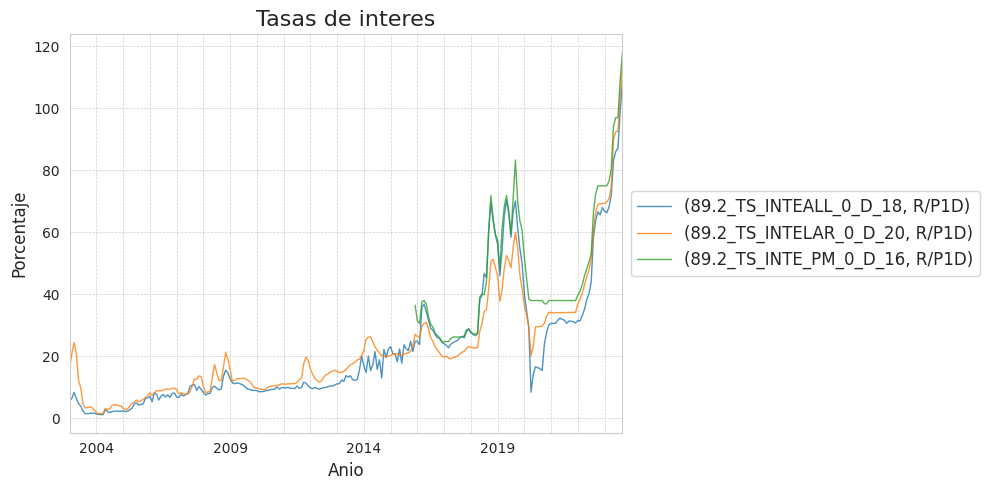

In [ ]:

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Step 3: Plot the data
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the data
# filtered_data.plot()
tasas_interes.dropna(how = 'all').plot(ax=ax, linewidth=1, alpha = .8)

# Adding grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set the minimum y-axis limit to 0
# ax.set_ylim(bottom=0)

# Add titles and labels
ax.set_title('Tasas de interes', fontsize=16)
ax.set_xlabel('Anio', fontsize=12)
ax.set_ylabel('Porcentaje', fontsize=12)

# Move the legend out of the plot
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
## Comparar con ritmos de aumento, o con aumento interanual.

<Axes: xlabel='indice_tiempo'>

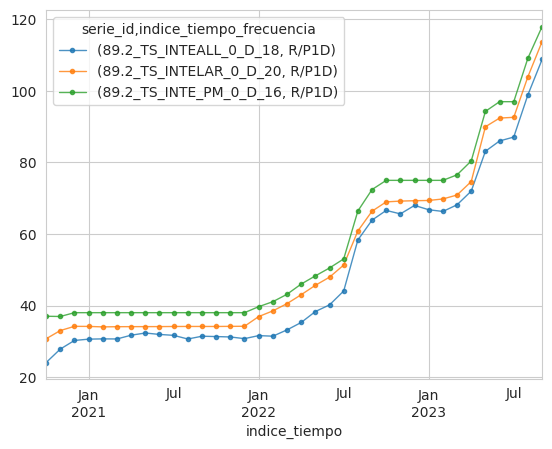

In [ ]:

# Plot the data
# filtered_data.plot()
tasas_interes.dropna(how = 'all').tail(36).plot(linewidth=1, alpha = .8, marker = '.')


In [ ]:
data_2021 = data.loc['2019': '2023']


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Assuming data_2021 is loaded and contains the data for the year 2021

# Initialize dictionaries to store fit parameters and exponential detection results
fit_parameters = {}
exponential_detection = {}

# Step 3: Iterate over each series (column)
for col in data_2021.columns:

    
    # Resample to monthly frequency and compute the mean for each month
    y = data_2021[col].resample('M').mean()
    
    # Drop NaN values for linear regression
    y = y.dropna()
    
    # Skip series with all NaN values or less than 2 data points
    if len(y) < 2:
        continue
    
    # Convert time to timestamp for linear regression
    X = y.index.astype('int64').values.reshape(-1, 1) // 10**9
    
    # Take the natural logarithm of the data
    y_log = np.log(y)
    
    # Drop NaN or inf values after log transformation
    mask = ~np.isnan(y_log) & ~np.isinf(y_log)
    X = X[mask]
    y_log = y_log[mask]
    
    # Skip series if too few data points remain
    if len(y_log) < 2:
        print(f'Skipping {col} because too few data points remain after cleaning')
        continue
    
    # Fit a linear regression model
    model = LinearRegression().fit(X, y_log)
    
    # Calculate the slope, intercept
    slope = model.coef_[0]
    intercept = model.intercept_
    
    # Calculate R^2 value
    r_squared = model.score(X, y_log)
    
    # Calculate the absolute squared error
    y_pred = np.exp(model.predict(X))
    abs_sq_err = np.sum((y[mask] - y_pred)**2)
    
    # Store the fit parameters
    fit_parameters[col] = {'slope': slope, 'intercept': intercept, 'r_squared': r_squared, 'abs_sq_err': abs_sq_err}
    
    # Determine whether the series exhibits an exponential trend
    exponential_detection[col] = r_squared > 0.965 and slope > 0


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/e

Skipping ('131.1_OIRJT_0_0_34', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('142.1_FACIL_2001_A_16', 'R/P1Y') because too few data points remain after cleaning
Skipping ('142.1_GANAN_2001_A_24', 'R/P1Y') because too few data points remain after cleaning
Skipping ('142.1_INTERESES_DOS_0_A_17', 'R/P1Y') because too few data points remain after cleaning
Skipping ('142.1_SISTE_2001_A_22', 'R/P1Y') because too few data points remain after cleaning
Skipping ('142.2_FACIL_2001_T_16', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('142.2_GANAN_2001_T_24', 'R/P3M') because too few data points remain after cleaning
Skipping ('142.2_INTERESES_DOS_0_T_17_11', 'R/P3M') because too few data points remain after cleaning
Skipping ('142.2_SISTE_2001_T_22', 'R/P3M') because too few data points remain after cleaning
Skipping ('142.3_FACIL_2001_M_16', 'R/P1M') because too few data points remain after cleaning
Skipping ('142.3_GANAN_0_M_17', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3

Skipping ('142.3_GANAN_2001_M_24', 'R/P1M') because too few data points remain after cleaning
Skipping ('142.3_SISTE_2001_M_22', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/e

Skipping ('144.3_AVOSOILES_0_A_18', 'R/P1Y') because too few data points remain after cleaning
Skipping ('144.3_GERNOGUAL_0_A_22', 'R/P1Y') because too few data points remain after cleaning
Skipping ('144.3_PVOSINLES_0_A_40', 'R/P1Y') because too few data points remain after cleaning
Skipping ('144.3_SEDADESTOS_0_A_31', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('144.4_GERNOGRAL_0_T_22', 'R/P3M') because too few data points remain after cleaning
Skipping ('144.4_PVOSINLES_0_T_40', 'R/P3M') because too few data points remain after cleaning
Skipping ('144.4_SEDADESTOS_0_T_31', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('160.1_AVOS_RERVA_0_A_15', 'R/P1Y') because too few data points remain after cleaning
Skipping ('160.1_CCTE_INCTA_0_A_51', 'R/P1Y') because too few data points remain after cleaning
Skipping ('160.1_CFIN_PINTAL_0_A_57', 'R/P1Y') because too few data points remain after cleaning
Skipping ('160.1_CTA_CORDOS_0_A_49', 'R/P1Y') because too few data points remain after cleaning
Skipping ('160.1_CTA_CORION_0_A_57', 'R/P1Y') because too few data points remain after cleaning
Skipping ('160.1_CTA_CORION_0_A_58', 'R/P1Y') because too few data points remain after cleaning
Skipping ('160.1_CTA_CORIOS_0_A_41', 'R/P1Y') because too few data points remain after cleaning
Skipping ('160.1_CTA_CORIOS_0_A_49', 'R/P1Y') because too few data points remain after cleaning
Skipping ('160.1_CTA_FINAUDA_0_A_59', 'R/P1Y') because too few data points remain after cleaning
Skipping ('160.1_CTA_FINCTA_0_A_41', 'R/P1Y') because too few data points remain after cleaning
Skipping ('160.1_CTA_FINUDA_0_A_59', '

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('160.2_CTA_CORDOS_0_T_49', 'R/P3M') because too few data points remain after cleaning
Skipping ('160.2_CTA_CORION_0_T_57', 'R/P3M') because too few data points remain after cleaning
Skipping ('160.2_CTA_CORION_0_T_58', 'R/P3M') because too few data points remain after cleaning
Skipping ('160.2_CTA_CORIOS_0_T_41', 'R/P3M') because too few data points remain after cleaning
Skipping ('160.2_CTA_CORIOS_0_T_49', 'R/P3M') because too few data points remain after cleaning
Skipping ('160.2_CTA_FINUDA_0_T_59', 'R/P3M') because too few data points remain after cleaning
Skipping ('160.2_IESOS_PERA_0_T_53', 'R/P3M') because too few data points remain after cleaning
Skipping ('161.1_DA_BANCLES_0_0_50', 'R/P3M') because too few data points remain after cleaning
Skipping ('161.1_DA_BANCTOS_0_0_36', 'R/P3M') because too few data points remain after cleaning
Skipping ('161.1_DA_BANCUDA_0_0_33', 'R/P3M') because too few data points remain after cleaning
Skipping ('161.1_DA_BANCUDA_0_0_39', 'R/

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('161.1_DA_GOBIUDA_0_0_42', 'R/P3M') because too few data points remain after cleaning
Skipping ('161.1_DA_OTRATOS_0_0_51', 'R/P3M') because too few data points remain after cleaning
Skipping ('161.1_DA_SOCITOS_0_0_48', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('162.1_XDAEDA_0_0_6', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('162.2_XDAEDA_0_0_6', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('162.3_XDAEDA_0_0_6', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda

Skipping ('164.1_SABON_AVAR_0_0_57', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SACAO_PNES_0_0_22', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SALZADOTES_0_0_45', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SAL_AZUTOS_0_0_50', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SANUFACERO_0_0_38', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SANUFACMUN_0_0_36', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SANUFACNTO_0_0_40', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SANUFACRIA_0_0_35', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SANUFACRIA_0_0_59', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SANUFACSAS_0_0_24', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SAPEL_CTON_0_0_56', 'R/

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('164.1_SERRAMIRIA_0_0_44', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SIBRAS_UAS_0_0_46', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SIDRIO_RAS_0_0_22', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SILAMENLES_0_0_37', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SINC_MARAS_0_0_20', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SINERALZAS_0_0_41', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SIQUEL_RAS_0_0_22', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SLANTASURA_0_0_39', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SLASTICRAS_0_0_24', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SLFOMBRTIL_0_0_54', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SLUMAS_LES_0_0_47', 'R/

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('164.1_SOMBUSTION_0_0_60', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SORCHO_RAS_0_0_22', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SPARATOTES_0_0_28', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SRENDASNTO_0_0_47', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SRENDASNTO_0_0_55', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SREPARASAS_0_0_38', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SRMAS_MIOS_0_0_37', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SRODUCTCAS_0_0_57', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SRODUCTCOS_0_0_22', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SRODUCTCOS_0_0_26', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SRODUCTCOS_0_0_31', 'R/

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('164.2_SABON_AVAR_0_0_57', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SACAO_PNES_0_0_22', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SALZADOTES_0_0_45', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SANUFACERO_0_0_38', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SANUFACMUN_0_0_36', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SANUFACNTO_0_0_40', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SANUFACRIA_0_0_35', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SANUFACRIA_0_0_59', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SANUFACSAS_0_0_24', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SAPEL_CTON_0_0_56', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SAQUINATES_0_0_46', 'R/

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('164.2_SBONOSNOS_0_0_9', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SEACTORNAS_0_0_40', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SEDAEDA_0_0_7', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SEHICULTES_0_0_56', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SEJIDOSLES_0_0_42', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SEJIDO_NTO_0_0_15', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SELAS_IDAS_0_0_43', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SEMAS_ADOS_0_0_42', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SEMAS_FPEL_0_0_48', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SEMAS_MRAS_0_0_37', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SERRAMIRIA_0_0_44', 'R/P3M') 

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('164.2_SILAMENLES_0_0_37', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SINC_MARAS_0_0_20', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SIQUEL_RAS_0_0_22', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SLASTICRAS_0_0_24', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SLFOMBRTIL_0_0_54', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SLUMAS_LES_0_0_47', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SNSTRUMIAS_0_0_58', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SNSTRUMIOS_0_0_43', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SOBRE_MBRE_0_0_27', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SOLVORAROS_0_0_52', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SOMAS_RLES_0_0_48', 'R/

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('164.2_SREPARASAS_0_0_38', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SRODUCTCAS_0_0_57', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SRODUCTCOS_0_0_22', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SRODUCTCOS_0_0_26', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SRODUCTCOS_0_0_31', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SRODUCTCOS_0_0_42', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SSTANO_RAS_0_0_22', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SUATA_FLES_0_0_51', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SUEBLESAMA_0_0_53', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SUGUETETES_0_0_50', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SUNDICIERO_0_0_25', 'R/

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('164.3_SAPEL_CTON_0_0_56', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SAQUINATES_0_0_46', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SARAGUANES_0_0_51', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SAUCHO_RAS_0_0_22', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SBONOSNOS_0_0_9', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SEACTORNAS_0_0_40', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('164.3_SEDAEDA_0_0_7', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SEHICULTES_0_0_56', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SEJIDOSLES_0_0_42', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SEJIDO_NTO_0_0_15', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SELAS_IDAS_0_0_43', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SEMAS_ADOS_0_0_42', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SEMAS_FPEL_0_0_48', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SEMAS_MRAS_0_0_37', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SERRAMIRIA_0_0_44', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SIBRAS_UAS_0_0_46', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SIDRIO_RAS_0_0_22', 'R/P1M'

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('164.3_SILAMENLES_0_0_37', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SINC_MARAS_0_0_20', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SIQUEL_RAS_0_0_22', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SLASTICRAS_0_0_24', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SLFOMBRTIL_0_0_54', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SLUMAS_LES_0_0_47', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SNSTRUMIAS_0_0_58', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SNSTRUMIOS_0_0_43', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SOBRE_MBRE_0_0_27', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SOLVORAROS_0_0_52', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SOMAS_RLES_0_0_48', 'R/

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('164.3_SRENDASNTO_0_0_47', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SRENDASNTO_0_0_55', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SRODUCTCAS_0_0_57', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SRODUCTCOS_0_0_22', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SRODUCTCOS_0_0_26', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SRODUCTCOS_0_0_31', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SRODUCTCOS_0_0_42', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SSTANO_RAS_0_0_22', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SUATA_FLES_0_0_51', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SUEBLESAMA_0_0_53', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SUGUETETES_0_0_50', 'R/

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('166.1_OBJETOS_VASOS_A_0_0_16_13', 'R/P1Y') because too few data points remain after cleaning
Skipping ('166.1_OS_RENTTAS_0_0_12', 'R/P1Y') because too few data points remain after cleaning
Skipping ('166.1_RAS_NETEXT_0_0_25', 'R/P1Y') because too few data points remain after cleaning
Skipping ('166.2_AI_MENODOS_0_0_48', 'R/P3M') because too few data points remain after cleaning
Skipping ('166.2_OBJETOS_VASOS_T_0_0_16_70', 'R/P3M') because too few data points remain after cleaning
Skipping ('166.2_OS_RENTTAS_0_0_12', 'R/P3M') because too few data points remain after cleaning
Skipping ('166.2_RAS_NETEXT_0_0_25', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/e

Skipping ('167.1_SO_EXT_IOS_2004_0_18', 'R/P1Y') because too few data points remain after cleaning
Skipping ('167.1_TSF_CAPNET_2004_0_14', 'R/P1Y') because too few data points remain after cleaning
Skipping ('167.1_TSF_COREXT_2004_0_21', 'R/P1Y') because too few data points remain after cleaning
Skipping ('167.2_SO_EXT_IOS_2004_0_18', 'R/P3M') because too few data points remain after cleaning
Skipping ('167.2_TSF_CAPNET_2004_0_14', 'R/P3M') because too few data points remain after cleaning
Skipping ('167.2_TSF_COREXT_2004_0_21', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3

Skipping ('174.1_T_INTERO_II_0_0_57', 'R/P1M') because too few data points remain after cleaning
Skipping ('174.1_T_INTERS_0_0_56', 'R/P1M') because too few data points remain after cleaning
Skipping ('174.1_T_INTERUS_0_0_58', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda

Skipping ('179.1_AF19_YIELDELD_0_0_10_69', 'R/P1D') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda

Skipping ('182.1_CUENTA_CORIOS_0_M_42', 'R/P1M') because too few data points remain after cleaning
Skipping ('182.1_CUENTA_CORRIO_0_M_49', 'R/P1M') because too few data points remain after cleaning
Skipping ('182.1_CUENTA_CORSES_0_M_59', 'R/P1M') because too few data points remain after cleaning
Skipping ('182.1_C_CORR_INGTAS_0_M_57', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/e

Skipping ('185.1_TOTAL_SERVIOS_0_M_15', 'R/P1M') because too few data points remain after cleaning
Skipping ('186.1_PLAN_FAMILIAL_0_0_30', 'R/P1Y') because too few data points remain after cleaning
Skipping ('186.1_PROGRAMA_JDOS_0_0_38', 'R/P1Y') because too few data points remain after cleaning
Skipping ('186.1_PROGRAMA_RINA_0_0_39', 'R/P1Y') because too few data points remain after cleaning
Skipping ('186.1_SEGURO_DESTRE_0_0_24', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda

Skipping ('186.2_PLAN_FAMILIAL_0_0_30', 'R/P3M') because too few data points remain after cleaning
Skipping ('186.2_PROGRAMA_JDOS_0_0_38', 'R/P3M') because too few data points remain after cleaning
Skipping ('186.2_PROGRAMA_RINA_0_0_39', 'R/P3M') because too few data points remain after cleaning
Skipping ('186.2_SEGURO_DESTRE_0_0_24', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('300.1_AP_PAS_ASIDEG_0_M_54', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('300.1_AP_PAS_OBLVAS_0_M_49', 'R/P1M') because too few data points remain after cleaning
Skipping ('300.1_LEBAQ_NOBABAC_0_M_11_69', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('300.2_AP_ACT_TITCTS_0_A_59', 'R/P1Y') because too few data points remain after cleaning
Skipping ('300.2_AP_ACT_TITERO_0_A_44', 'R/P1Y') because too few data points remain after cleaning
Skipping ('300.2_AP_PAS_ASIDEG_0_A_54', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('300.2_AP_PAS_OBLVAS_0_A_49', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('322.1_SALDOLDO__5', 'R/P1Y') because too few data points remain after cleaning
Skipping ('322.2_SALDOLDO__5', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('323.1_C_EXPLOTACDAD__50', 'R/P3M') because too few data points remain after cleaning
Skipping ('323.1_E_ELECTRICDAD__45', 'R/P3M') because too few data points remain after cleaning
Skipping ('323.1_I_TRANSPORDAD__64', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('323.1_L_ADM_PUBLDAD__66', 'R/P3M') because too few data points remain after cleaning
Skipping ('323.1_L_ADM_PUBLUTO__60', 'R/P3M') because too few data points remain after cleaning
Skipping ('323.1_L_ADM_PUBLXTO__64', 'R/P3M') because too few data points remain after cleaning
Skipping ('323.1_M_ENSENIANDAD__34', 'R/P3M') because too few data points remain after cleaning
Skipping ('323.1_O_OTRAS_ACDAD__56', 'R/P3M') because too few data points remain after cleaning
Skipping ('323.1_P_HOGARES_ACT__46', 'R/P3M') because too few data points remain after cleaning
Skipping ('323.1_P_HOGARES_UTO__58', 'R/P3M') because too few data points remain after cleaning
Skipping ('323.1_P_HOGARES_XTO__61', 'R/P3M') because too few data points remain after cleaning
Skipping ('323.1_SIN_DISTRIADO__46', 'R/P3M') because too few data points remain after cleaning
Skipping ('323.1_SIN_DISTRIDAD__36', 'R/P3M') because too few data points remain after cleaning
Skipping ('323.1_SIN_DISTRIXTO__34', 'R/

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('323.1_TOTAL_SECTDAD__42', 'R/P3M') because too few data points remain after cleaning
Skipping ('323.1_TOTAL_SECTUTO__48', 'R/P3M') because too few data points remain after cleaning
Skipping ('323.1_TOTAL_SECTXTO__40', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda

Skipping ('330.1_EXPORTACIOA_B__25', 'R/P1Y') because too few data points remain after cleaning
Skipping ('330.1_EXPORTACIOSTO__19', 'R/P1Y') because too few data points remain after cleaning
Skipping ('330.1_PRODUCCIONA_B__22', 'R/P1Y') because too few data points remain after cleaning
Skipping ('330.1_PRODUCCIONSTO__16', 'R/P1Y') because too few data points remain after cleaning
Skipping ('330.1_VENTAS_MERA_B_II__55', 'R/P1Y') because too few data points remain after cleaning
Skipping ('330.1_VENTAS_MERA_B__34', 'R/P1Y') because too few data points remain after cleaning
Skipping ('330.1_VENTAS_MERA_B__55', 'R/P1Y') because too few data points remain after cleaning
Skipping ('330.1_VENTAS_MERIOS_V__55', 'R/P1Y') because too few data points remain after cleaning
Skipping ('330.1_VENTAS_MERIOS__55', 'R/P1Y') because too few data points remain after cleaning
Skipping ('330.1_VENTAS_MERLES_II__55', 'R/P1Y') because too few data points remain after cleaning
Skipping ('330.1_VENTAS_MERLES__

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/e

Skipping ('331.1_PASES_REDETOS__51', 'R/P1M') because too few data points remain after cleaning
Skipping ('331.1_RESCATE_CUDAS__5', 'R/P1M') because too few data points remain after cleaning
Skipping ('331.1_TITULOS_DECRA__20', 'R/P1M') because too few data points remain after cleaning
Skipping ('331.2_PASES_REDETOS__51', 'R/P1D') because too few data points remain after cleaning
Skipping ('331.2_RESCATE_CUDAS__5', 'R/P1D') because too few data points remain after cleaning
Skipping ('331.2_TITULOS_DECRA__20', 'R/P1D') because too few data points remain after cleaning
Skipping ('332.1_BANCOS_PRIADO__33', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('332.1_BANCOS_PRIRIV__44', 'R/P1Y') because too few data points remain after cleaning
Skipping ('332.1_BANCOS_PRIRIV__45', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('332.1_ENTIDADES_UAL__45', 'R/P1Y') because too few data points remain after cleaning
Skipping ('332.1_ENTIDADES_UAL__52', 'R/P1Y') because too few data points remain after cleaning
Skipping ('332.2_BANCOS_PRIADO__33', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('333.1_BANCOS_EXTDAD_A_42', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_EXTIAS_A_35', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_EXTICO_A_59', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_EXTION_A_38', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_EXTROS_A_37', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_EXTSES_A_52', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_EXTVAS_A_35', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_PRIDAD_A_37', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_PRIDAD__37', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_PRIIAS_A_30', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_PRIIAS_

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/e

Skipping ('333.1_BANCOS_PRINCS__35', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_PRINCS__39', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_PRIORI_A_19', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_PRIROS__20', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_PRIROS__24', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_PRISES_A_47', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_PRISES_A_51', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_PRIVAS__57', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_PRIVAS__61', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_PUBDAD__32', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_PUBIAS_A_29',

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/

Skipping ('333.1_BANCOS_PUBSES__40', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_PUBVAS__56', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_ENTI_FINANADO_A_44', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_ENTI_FINANADO_A_53', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_ENTI_FINANDAD_A_44', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_ENTI_FINANIAS__34', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_ENTI_FINANICO__39', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_ENTI_FINANION__37', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_ENTI_FINANNCS__42', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_ENTI_FINANORI_A_22', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_ENTI_FINANROS__27',

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('333.1_SIST_FINANROS__20', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_SIST_FINANSES__41', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_SIST_FINANVAS__57', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.2_BANCOS_EXTDAD_M_42', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_BANCOS_EXTICO_M_59', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_BANCOS_EXTION_M_38', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_BANCOS_EXTROS_M_37', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_BANCOS_EXTSES_M_52', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_BANCOS_EXTVAS_M_35', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('333.2_BANCOS_PRIDAD_M_41', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_BANCOS_PRIDAD__37', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_BANCOS_PRIICO__57', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_BANCOS_PRIICO__61', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_BANCOS_PRIION__33', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_BANCOS_PRIION__37', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_BANCOS_PRIRIO_M_35', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_BANCOS_PRIRIO__31', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_BANCOS_PRIROS__32', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_BANCOS_PRIROS__36', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_BANCOS_PRISES_M_51', 

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/e

Skipping ('333.2_BANCOS_PUBDAD__36', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_BANCOS_PUBICO_M_56', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_BANCOS_PUBION__32', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_BANCOS_PUBROS__31', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_BANCOS_PUBSES_M_46', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_BANCOS_PUBVAS__29', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_ENTI_FINANDAD__44', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_ENTI_FINANION_M_40', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_ENTI_FINANPUB_M_57', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_ENTI_FINANRIO__38', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_ENTI_FINANROS__39',

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('333.2_ENTI_FINANVAS__37', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_SIST_FINANDAD_M_37', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_SIST_FINANICO__57', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_SIST_FINANION__33', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_SIST_FINANROS_M_32', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_SIST_FINANSES_M_47', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_SIST_FINANVAS_M_30', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('334.1_BCOS_PRIV_BIR18__56', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_BCOS_PRIV_BIR__55', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_BCOS_PRIV_BIR__59', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_BCOS_PRIV_COT16__60', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_BCOS_PRIV_COT__56', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_BCOS_PRIV_COT__60', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_BCOS_PRIV_DRO_1V__59', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_BCOS_PRIV_DRO__55', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_BCOS_PRIV_DRO__59', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('334.1_BCOS_PRIV_IOR23__44', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_BCOS_PRIV_IOR__40', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_BCOS_PRIV_IOR__44', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_BCOS_PRIV_IVO7__51', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_BCOS_PRIV_IVO__44', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_BCOS_PRIV_IVO__48', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_BCOS_PRIV_MOS14__46', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_BCOS_PRIV_MOS__42', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_BCOS_PRIV_MOS__46', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_BCOS_PRIV_OS16__58', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_BCOS_PRIV_OS__54'

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda

Skipping ('334.1_BCOS_PUB_ABIR__54', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_BCOS_PUB_ACOT__55', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_BCOS_PUB_AIVO__47', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_BCOS_PUB_AMOS__41', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_BCOS_PUB_A_OS__53', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_BCOS_PUB_PDAS__41', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_BCOS_PUB_PDRO__54', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('334.1_EFNB_ACTIVBIR__50', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_EFNB_ACTIVCOT__51', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_EFNB_ACTIVICO__44', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_EFNB_ACTIVIOR__35', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_EFNB_ACTIVIVO__43', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_EFNB_ACTIVMOS__37', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_EFNB_ACTIV_OS__49', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_EFNB_PASIVCRA__49', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_EFNB_PASIVCTE__47', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_EFNB_PASIVDRO__50', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_EFNB_PASIVICO__44', 'R/

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda

Skipping ('334.1_SIST_FINANBIR__57', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_SIST_FINANCOT__58', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_SIST_FINANDRO__57', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_SIST_FINANIVO__50', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_SIST_FINANMOS__44', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_SIST_FINAN_OS__56', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('334.2_BCOS_PRIV_BIR18__56', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_BCOS_PRIV_BIR__55', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_BCOS_PRIV_BIR__59', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_BCOS_PRIV_COT16__60', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_BCOS_PRIV_COT__56', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_BCOS_PRIV_COT__60', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_BCOS_PRIV_DRO_1V__59', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_BCOS_PRIV_DRO__55', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_BCOS_PRIV_DRO__59', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda

Skipping ('334.2_BCOS_PRIV_IOR23__44', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_BCOS_PRIV_IOR__40', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_BCOS_PRIV_IOR__44', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_BCOS_PRIV_IVO7__51', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_BCOS_PRIV_IVO__44', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_BCOS_PRIV_IVO__48', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_BCOS_PRIV_MOS14__46', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_BCOS_PRIV_MOS__42', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_BCOS_PRIV_MOS__46', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_BCOS_PRIV_OS16__58', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_BCOS_PRIV_OS__54'

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3

Skipping ('334.2_BCOS_PUB_ABIR__54', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_BCOS_PUB_ACOT__55', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_BCOS_PUB_AIVO__46', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_BCOS_PUB_AMOS__41', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_BCOS_PUB_A_OS__53', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_BCOS_PUB_PDRO__54', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('334.2_EFNB_ACTIVBIR__50', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_EFNB_ACTIVCOT__51', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_EFNB_ACTIVICO__44', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_EFNB_ACTIVIOR__35', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_EFNB_ACTIVMOS__37', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_EFNB_ACTIV_OS__49', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_EFNB_PASIVCRA__49', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_EFNB_PASIVCTE__47', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_EFNB_PASIVDRO__50', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_EFNB_PASIVICO__44', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda

Skipping ('334.2_SIST_FINANBIR__57', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_SIST_FINANCOT__58', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_SIST_FINANDRO__57', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_SIST_FINANIVO__49', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_SIST_FINANMOS__44', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_SIST_FINAN_OS__56', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('337.1_ANGOLAOLA__6', 'R/P1Y') because too few data points remain after cleaning
Skipping ('337.1_BOLIVIAVIA__7', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('337.1_IRAKRAK__4', 'R/P1Y') because too few data points remain after cleaning
Skipping ('337.1_KATARTAR__5', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('337.1_PAISES_BAJJOS__12', 'R/P1Y') because too few data points remain after cleaning
Skipping ('337.1_POLINESIA_CES__17', 'R/P1Y') because too few data points remain after cleaning
Skipping ('337.1_SUIZAIZA__5', 'R/P1Y') because too few data points remain after cleaning
Skipping ('337.1_TIMOR_ORIETAL__14', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('337.1_VENEZUELAELA__9', 'R/P1Y') because too few data points remain after cleaning
Skipping ('338.1_ANGOLAOLA__6', 'R/P1Y') because too few data points remain after cleaning
Skipping ('338.1_BOLIVIAVIA__7', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('338.1_KATARTAR__5', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('338.1_PAISES_BAJJOS__12', 'R/P1Y') because too few data points remain after cleaning
Skipping ('338.1_POLINESIA_CES__17', 'R/P1Y') because too few data points remain after cleaning
Skipping ('338.1_SUIZAIZA__5', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('338.1_TIMOR_ORIETAL__14', 'R/P1Y') because too few data points remain after cleaning
Skipping ('338.1_VENEZUELAELA__9', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_AFGANISTANTAN__10', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_ALBANIANIA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_ANGUILAILA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_ANTIGUA_BAUDA__15', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_ARGELIALIA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_ARMENIANIA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_BAHAMASMAS__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_BANGLADESHESH__10', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_BARBADOSDOS__8', 'R/P1Y') because too few dat

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('339.1_BENINNIN__5', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_BHUTANTAN__6', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_BOLIVIAVIA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_BOSNIA_HERINA__18', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_BOTSWANAANA__8', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_BRASILSIL__6', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_BULGARIARIA__8', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_BURUNDINDI__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_CABO_VERDERDE__10', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_CAMBOYAOYA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_CAMERUNRUN__7', 'R/P1Y') because too few data points rema

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('339.1_ESTADOS_UNDOS__14', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_ESTADO_DE_INA__19', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_ESTONIANIA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_ETIOPIAPIA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_FILIPINASNAS__9', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_FIYIIYI__4', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_GABONBON__5', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_GAMBIABIA__6', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_GEORGIAGIA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_GHANAANA__5', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_GRANADAADA__7', 'R/P1Y') because too few data points remain a

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('339.1_LAOLAO__3', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_LESOTOOTO__6', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_LETONIANIA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_LIBANOANO__6', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_LIBIABIA__5', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_MADAGASCARCAR__10', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_MALAWIAWI__6', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_MALDIVASVAS__8', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_MALIALI__4', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_MARRUECOSCOS__9', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_MAURICIOCIO__8', 'R/P1Y') because too few data points remain after c

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('339.1_REPUBLICA_OVA__20', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_REP_DEM_DENGO__17', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_RUANDANDA__6', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_RUMANIANIA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_SANTA_LUCICIA__11', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_SANTO_TOMEIPE__19', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_SAN_CRISTOVES__20', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_SAN_VICENTNAS__26', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_SENEGALGAL__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_SERBIABIA__6', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_SEYCHELLESLES__10', 'R/P1Y') because too 

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('340.1_AFGANISTANTAN__10', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_ALBANIANIA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_ANGUILAILA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_ANTIGUA_BAUDA__15', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_ARGELIALIA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_ARMENIANIA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_BAHAMASMAS__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_BANGLADESHESH__10', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_BARBADOSDOS__8', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_BELICEICE__6', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_BENINNIN__5', 'R/P1Y') because too few data points 

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('340.1_CHIPREPRE__6', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_COLOMBIABIA__8', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_COMORASRAS__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_COSTA_RICAICA__10', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_CURAZAOZAO__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_DOMINICAICA__8', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_EGIPTOPTO__6', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_EL_SALVADODOR__11', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_ESLOVAQUIAUIA__10', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_ESTADOS_UNDOS__14', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_ESTADO_DE_INA__19', 'R/P1Y') because too few da

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('340.1_HONDURASRAS__8', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_HUNGRIARIA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_INDIADIA__5', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_ISLAS_SALOMON__13', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_JAMAICAICA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_JORDANDAN__6', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_KAZAKHSTANTAN__10', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_KENIANIA__5', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_KIRGUISTANTAN__10', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_LAOLAO__3', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_LESOTOOTO__6', 'R/P1Y') because too few data points remain 

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('340.1_MONGOLIALIA__8', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_MONTENEGROGRO__10', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_MOZAMBIQUEQUE__10', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_MYANMARMAR__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_NAMIBIABIA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_NEPALPAL__5', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_NIGERGER__5', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_NIGERIARIA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_NUEVA_ZELANDA__13', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_OMANMAN__4', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_PAKISTANTAN__8', 'R/P1Y') because too few data points rem

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('340.1_SUDAN_DEL_SUR__13', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_TFYR_DE_MANIA__17', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_TONGANGA__5', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_TUNEZNEZ__5', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_TURQUIAUIA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_UGANDANDA__6', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_URUGUAYUAY__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_UZBEKISTANTAN__10', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda

Skipping ('350.1_CATAMARCA_CYE__13', 'R/P1Y') because too few data points remain after cleaning
Skipping ('350.1_CHACO_CYECYE__9', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('350.1_JUJUY_CYECYE__9', 'R/P1Y') because too few data points remain after cleaning
Skipping ('350.1_LA_PAMPA_CCYE__12', 'R/P1Y') because too few data points remain after cleaning
Skipping ('350.1_LA_RIOJA_CCYE__12', 'R/P1Y') because too few data points remain after cleaning
Skipping ('350.1_MISIONES_CCYE__12', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('350.1_SANTIAGO_DCYE__23', 'R/P1Y') because too few data points remain after cleaning
Skipping ('350.1_SAN_JUAN_CCYE__12', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('357.1_INDETERMINLIA__21', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('357.1_SAN_JUAN_ZUAY__44', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('363.1_PRODUCCIONRON__37', 'R/P1Y') because too few data points remain after cleaning
Skipping ('363.1_VENTAS_DE_RON__33', 'R/P1Y') because too few data points remain after cleaning
Skipping ('363.2_PRODUCCIONRON__37', 'R/P3M') because too few data points remain after cleaning
Skipping ('363.2_VENTAS_DE_RON__33', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('363.3_PRODUCCIONRON__37', 'R/P1M') because too few data points remain after cleaning
Skipping ('363.3_VENTAS_DE_RON__33', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('365.2_PRODUCCION_SA__38', 'R/P3M') because too few data points remain after cleaning
Skipping ('365.2_PRODUCCION_SA__51', 'R/P3M') because too few data points remain after cleaning
Skipping ('365.2_VENTAS_DE_OIL_I__20', 'R/P3M') because too few data points remain after cleaning
Skipping ('365.2_VENTAS_DE_OIL__20', 'R/P3M') because too few data points remain after cleaning
Skipping ('365.3_PRODUCCION_SA__38', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('365.3_PRODUCCION_SA__51', 'R/P1M') because too few data points remain after cleaning
Skipping ('365.3_VENTAS_DE_OIL_I__20', 'R/P1M') because too few data points remain after cleaning
Skipping ('365.3_VENTAS_DE_OIL__20', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('372.3_GTOS_CORR_017_0_A_44_41', 'R/P1Y') because too few data points remain after cleaning
Skipping ('372.3_GTOS_CORR_017__23_100', 'R/P1Y') because too few data points remain after cleaning
Skipping ('372.3_GTOS_CORR_017__42_66', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('372.3_RESULTADO_017__18_43', 'R/P1Y') because too few data points remain after cleaning
Skipping ('372.3_RESULTADO_017__36_80', 'R/P1Y') because too few data points remain after cleaning
Skipping ('372.3_RESULTADO_017__41_86', 'R/P1Y') because too few data points remain after cleaning
Skipping ('372.3_SUPERAVIT_017__23_94', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('372.6_GTOS_CORR_017_0_T_44_16', 'R/P3M') because too few data points remain after cleaning
Skipping ('372.6_GTOS_CORR_017__42_100', 'R/P3M') because too few data points remain after cleaning
Skipping ('372.6_RESULTADO_017__18_59', 'R/P3M') because too few data points remain after cleaning
Skipping ('372.6_RESULTADO_017__36_47', 'R/P3M') because too few data points remain after cleaning
Skipping ('372.6_SUPERAVIT_017__23_67', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/e

Skipping ('372.9_GTOS_CAP_I017__37_10', 'R/P1M') because too few data points remain after cleaning
Skipping ('372.9_GTOS_CORR_017__45_32', 'R/P1M') because too few data points remain after cleaning
Skipping ('372.9_ING_CORR_I017__27_83', 'R/P1M') because too few data points remain after cleaning
Skipping ('372.9_ING_CORR_O017__21_81', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda

Skipping ('373.3_GTOS_CORR_017_0_A_44_17', 'R/P1Y') because too few data points remain after cleaning
Skipping ('373.3_GTOS_CORR_017__23_77', 'R/P1Y') because too few data points remain after cleaning
Skipping ('373.3_GTOS_CORR_017__42_0', 'R/P1Y') because too few data points remain after cleaning
Skipping ('373.3_RESULTADO_017__18_38', 'R/P1Y') because too few data points remain after cleaning
Skipping ('373.3_SUPERAVIT_017__23_70', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('373.6_CONTRIB_FI017__39_7', 'R/P3M') because too few data points remain after cleaning
Skipping ('373.6_GTOS_CORR_017_0_T_44_69', 'R/P3M') because too few data points remain after cleaning
Skipping ('373.6_GTOS_CORR_017__35_73', 'R/P3M') because too few data points remain after cleaning
Skipping ('373.6_GTOS_CORR_017__42_6', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3

Skipping ('373.6_RESULTADO_017__18_44', 'R/P3M') because too few data points remain after cleaning
Skipping ('373.6_SUPERAVIT_017__23_65', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('373.9_CONTRIB_FI017_0_M_39_10', 'R/P1M') because too few data points remain after cleaning
Skipping ('373.9_CONTRIB_FI017__33_28', 'R/P1M') because too few data points remain after cleaning
Skipping ('373.9_CONTRIB_FI017__36_80', 'R/P1M') because too few data points remain after cleaning
Skipping ('373.9_CONTRIB_FI017__39_27', 'R/P1M') because too few data points remain after cleaning
Skipping ('373.9_FTES_FIN_I017__22_37', 'R/P1M') because too few data points remain after cleaning
Skipping ('373.9_GTOS_CORR_017_0_M_45_47', 'R/P1M') because too few data points remain after cleaning
Skipping ('373.9_GTOS_CORR_017__35_4', 'R/P1M') because too few data points remain after cleaning
Skipping ('373.9_GTOS_CORR_017__37_62', 'R/P1M') because too few data points remain after cleaning
Skipping ('373.9_GTOS_CORR_017__43_76', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda

Skipping ('373.9_ING_CORR_A017__37_73', 'R/P1M') because too few data points remain after cleaning
Skipping ('373.9_RESULTADO_017__18_45', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('374.3_AP_FIN_AMO017_0_A_50_30', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('374.3_RESULTADO_017__18_11', 'R/P1Y') because too few data points remain after cleaning
Skipping ('374.3_SUPERAVIT_017__23_32', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('374.6_AP_FIN_AMO017_0_T_50_32', 'R/P3M') because too few data points remain after cleaning
Skipping ('374.6_GTOS_TRANS017__53_50', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/e

Skipping ('374.9_AP_FIN_AMO017_0_M_50_29', 'R/P1M') because too few data points remain after cleaning
Skipping ('374.9_AP_FIN_AMO017__50_84', 'R/P1M') because too few data points remain after cleaning
Skipping ('374.9_AP_FIN_AMO017__52_46', 'R/P1M') because too few data points remain after cleaning
Skipping ('374.9_CONTRIB_FI017__36_24', 'R/P1M') because too few data points remain after cleaning
Skipping ('374.9_FTES_FIN_E017_0_M_49_14', 'R/P1M') because too few data points remain after cleaning
Skipping ('374.9_FTES_FIN_E017__47_92', 'R/P1M') because too few data points remain after cleaning
Skipping ('374.9_GTOS_CORR_017_0_M_45_5', 'R/P1M') because too few data points remain after cleaning
Skipping ('374.9_GTOS_CORR_017__23_66', 'R/P1M') because too few data points remain after cleaning
Skipping ('374.9_GTOS_CORR_017__40_19', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('374.9_GTOS_CORR_017__53_7', 'R/P1M') because too few data points remain after cleaning
Skipping ('374.9_ING_CORR_I017__27_93', 'R/P1M') because too few data points remain after cleaning
Skipping ('374.9_ING_CORR_O017__21_9', 'R/P1M') because too few data points remain after cleaning
Skipping ('374.9_ING_CORR_R017__40_44', 'R/P1M') because too few data points remain after cleaning
Skipping ('374.9_ING_CORR_R017__48_17', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('375.3_GTOS_CORR_017_0_A_44_56', 'R/P1Y') because too few data points remain after cleaning
Skipping ('375.3_GTOS_CORR_017__42_30', 'R/P1Y') because too few data points remain after cleaning
Skipping ('375.3_RESULTADO_017__36_36', 'R/P1Y') because too few data points remain after cleaning
Skipping ('375.3_RESULTADO_017__38_60', 'R/P1Y') because too few data points remain after cleaning
Skipping ('375.3_RESULTADO_017__41_28', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('375.3_SUPERAVIT_017__43_18', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('375.6_GTOS_CORR_017_0_T_44_30', 'R/P3M') because too few data points remain after cleaning
Skipping ('375.6_GTOS_CORR_017__42_95', 'R/P3M') because too few data points remain after cleaning
Skipping ('375.6_RESULTADO_017__36_25', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('375.6_RESULTADO_017__41_19', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('375.9_FTES_FIN_E017_0_M_49_17', 'R/P1M') because too few data points remain after cleaning
Skipping ('375.9_FTES_FIN_E017__47_12', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('375.9_RESULTADO_017__36_18', 'R/P1M') because too few data points remain after cleaning
Skipping ('375.9_RESULTADO_017__41_83', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3

Skipping ('376.3_RECURSOS_C017__33_53', 'R/P1Y') because too few data points remain after cleaning
Skipping ('376.3_RESULTADO_017__31_38', 'R/P1Y') because too few data points remain after cleaning
Skipping ('376.3_RESULTADO_017__36_67', 'R/P1Y') because too few data points remain after cleaning
Skipping ('376.3_RESULTADO_017__38_19', 'R/P1Y') because too few data points remain after cleaning
Skipping ('376.3_RESULTADO_017__41_16', 'R/P1Y') because too few data points remain after cleaning
Skipping ('376.3_SUPERAVIT_017__43_33', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('376.6_RESULTADO_017__31_48', 'R/P3M') because too few data points remain after cleaning
Skipping ('376.6_RESULTADO_017__36_80', 'R/P3M') because too few data points remain after cleaning
Skipping ('376.6_RESULTADO_017__38_44', 'R/P3M') because too few data points remain after cleaning
Skipping ('376.6_RESULTADO_017__41_59', 'R/P3M') because too few data points remain after cleaning
Skipping ('376.6_SUPERAVIT_017__43_100', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda

Skipping ('376.9_AP_FIN_AMO017__52_58', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('377.3_GTOS_CORR_017_0_A_50_48', 'R/P1Y') because too few data points remain after cleaning
Skipping ('377.3_RESULTADO_017__18_63', 'R/P1Y') because too few data points remain after cleaning
Skipping ('377.3_RESULTADO_017__31_62', 'R/P1Y') because too few data points remain after cleaning
Skipping ('377.3_RESULTADO_017__36_5', 'R/P1Y') because too few data points remain after cleaning
Skipping ('377.3_RESULTADO_017__38_29', 'R/P1Y') because too few data points remain after cleaning
Skipping ('377.3_RESULTADO_017__41_76', 'R/P1Y') because too few data points remain after cleaning
Skipping ('377.3_SUPERAVIT_017__23_41', 'R/P1Y') because too few data points remain after cleaning
Skipping ('377.3_SUPERAVIT_017__43_31', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/

Skipping ('377.6_AP_FIN_CIN017__20_18', 'R/P3M') because too few data points remain after cleaning
Skipping ('377.6_FTES_FIN_E017_0_T_49_7', 'R/P3M') because too few data points remain after cleaning
Skipping ('377.6_GTOS_CORR_017_0_T_50_56', 'R/P3M') because too few data points remain after cleaning
Skipping ('377.6_RESULTADO_017__18_98', 'R/P3M') because too few data points remain after cleaning
Skipping ('377.6_RESULTADO_017__31_92', 'R/P3M') because too few data points remain after cleaning
Skipping ('377.6_RESULTADO_017__36_18', 'R/P3M') because too few data points remain after cleaning
Skipping ('377.6_RESULTADO_017__38_76', 'R/P3M') because too few data points remain after cleaning
Skipping ('377.6_RESULTADO_017__41_45', 'R/P3M') because too few data points remain after cleaning
Skipping ('377.6_SUPERAVIT_017__23_74', 'R/P3M') because too few data points remain after cleaning
Skipping ('377.6_SUPERAVIT_017__43_65', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/

Skipping ('377.9_AP_FIN_CIN017__20_95', 'R/P1M') because too few data points remain after cleaning
Skipping ('377.9_FTES_FIN_E017_0_M_49_78', 'R/P1M') because too few data points remain after cleaning
Skipping ('377.9_GTOS_CORR_017_0_M_50_66', 'R/P1M') because too few data points remain after cleaning
Skipping ('377.9_GTOS_CORR_017__28_34', 'R/P1M') because too few data points remain after cleaning
Skipping ('377.9_RESULTADO_017__18_84', 'R/P1M') because too few data points remain after cleaning
Skipping ('377.9_RESULTADO_017__36_70', 'R/P1M') because too few data points remain after cleaning
Skipping ('377.9_RESULTADO_017__41_19', 'R/P1M') because too few data points remain after cleaning
Skipping ('377.9_SUPERAVIT_017__23_55', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3

Skipping ('378.3_GTOS_CORR_017_0_A_38_83', 'R/P1Y') because too few data points remain after cleaning
Skipping ('378.3_GTOS_CORR_017_0_A_44_64', 'R/P1Y') because too few data points remain after cleaning
Skipping ('378.3_GTOS_CORR_017__42_90', 'R/P1Y') because too few data points remain after cleaning
Skipping ('378.3_ING_CORR_V017__35_7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('378.3_RESULTADO_017__36_59', 'R/P1Y') because too few data points remain after cleaning
Skipping ('378.3_RESULTADO_017__41_83', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3

Skipping ('378.6_GTOS_CORR_017_0_T_38_82', 'R/P3M') because too few data points remain after cleaning
Skipping ('378.6_GTOS_CORR_017_0_T_44_22', 'R/P3M') because too few data points remain after cleaning
Skipping ('378.6_GTOS_CORR_017__42_92', 'R/P3M') because too few data points remain after cleaning
Skipping ('378.6_RESULTADO_017__36_38', 'R/P3M') because too few data points remain after cleaning
Skipping ('378.6_RESULTADO_017__41_25', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/

Skipping ('378.9_GTOS_CORR_017_0_M_23_12', 'R/P1M') because too few data points remain after cleaning
Skipping ('378.9_GTOS_CORR_017_II_0_M_38_68', 'R/P1M') because too few data points remain after cleaning
Skipping ('378.9_RESULTADO_017__36_61', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda

Skipping ('379.3_FTES_FIN_E017__43_79', 'R/P1Y') because too few data points remain after cleaning
Skipping ('379.3_GTOS_CORR_017_I_0_A_44_38', 'R/P1Y') because too few data points remain after cleaning
Skipping ('379.3_GTOS_CORR_017__23_6', 'R/P1Y') because too few data points remain after cleaning
Skipping ('379.3_GTOS_CORR_017__42_4', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/e

Skipping ('379.3_RESULTADO_017__18_83', 'R/P1Y') because too few data points remain after cleaning
Skipping ('379.3_RESULTADO_017__31_14', 'R/P1Y') because too few data points remain after cleaning
Skipping ('379.3_RESULTADO_017__36_42', 'R/P1Y') because too few data points remain after cleaning
Skipping ('379.3_RESULTADO_017__41_58', 'R/P1Y') because too few data points remain after cleaning
Skipping ('379.3_SUPERAVIT_017__23_25', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('379.6_GTOS_CORR_017_I_0_T_44_24', 'R/P3M') because too few data points remain after cleaning
Skipping ('379.6_GTOS_CORR_017__42_72', 'R/P3M') because too few data points remain after cleaning
Skipping ('379.6_RESULTADO_017__18_10', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/e

Skipping ('379.6_RESULTADO_017__31_80', 'R/P3M') because too few data points remain after cleaning
Skipping ('379.6_RESULTADO_017__36_15', 'R/P3M') because too few data points remain after cleaning
Skipping ('379.6_RESULTADO_017__41_16', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('379.9_ING_CORR_I017__27_19', 'R/P1M') because too few data points remain after cleaning
Skipping ('379.9_RESULTADO_017__18_38', 'R/P1M') because too few data points remain after cleaning
Skipping ('379.9_RESULTADO_017__36_89', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda

Skipping ('38.2_R_1994_T_8', 'R/P3M') because too few data points remain after cleaning
Skipping ('38.3_NC_1994_M_11', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/

Skipping ('4.1_DE_2004_A_24', 'R/P1Y') because too few data points remain after cleaning
Skipping ('4.1_OBJETOS_VASOS_2004_A_16_58', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/

Skipping ('4.2_OBJETOS_VASOS_2004_T_16_84', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('41.1_FO_0_M_8', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('41.2_FO_0_T_8', 'R/P3M') because too few data points remain after cleaning
Skipping ('41.2_NNTP_0_T_28', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('41.3_FO_0_A_8', 'R/P1M') because too few data points remain after cleaning
Skipping ('41.3_NNTP_0_A_28', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('452.2_COMBUSTIBLLES_0_T_12_44', 'R/P1Y') because too few data points remain after cleaning
Skipping ('452.2_FONDO_FEDERIO_0_T_23_0', 'R/P1Y') because too few data points remain after cleaning
Skipping ('452.2_FONDO_FEDERIO_0_T_23_1', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3

Skipping ('452.2_OTROS_CORRCAS_0_T_52_50', 'R/P1Y') because too few data points remain after cleaning
Skipping ('452.2_OTROS_CORRCAS_0_T_52_50', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/

Skipping ('452.2_PROGRAMA_IIAS_0_T_33_1', 'R/P1Y') because too few data points remain after cleaning
Skipping ('452.2_PROGRAMA_IIAS_0_T_33_81', 'R/P3M') because too few data points remain after cleaning
Skipping ('452.2_RESULTADO_ERO_0_T_20_31', 'R/P1Y') because too few data points remain after cleaning
Skipping ('452.2_RESULTADO_ERO_0_T_20_32', 'R/P3M') because too few data points remain after cleaning
Skipping ('452.2_RESULTADO_RIO_0_T_18_1', 'R/P1Y') because too few data points remain after cleaning
Skipping ('452.2_TRANSFERENIAL_0_T_54_54', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('452.3_FONDO_FEDERIO_0_M_23_90', 'R/P1M') because too few data points remain after cleaning
Skipping ('452.3_PROGRAMA_IIAS_0_M_33_38', 'R/P1M') because too few data points remain after cleaning
Skipping ('452.3_RESULTADO_ERO_0_M_20_25', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('53.1_TINSA_0_0_41', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3

Skipping ('79.1_ISCAP_0_A_33', 'R/P1Y') because too few data points remain after cleaning
Skipping ('79.1_ISCAUS_0_A_27_49', 'R/P1Y') because too few data points remain after cleaning
Skipping ('79.1_ISCA_0_A_28', 'R/P1Y') because too few data points remain after cleaning
Skipping ('79.1_ISCBEL_0_A_27_38', 'R/P1Y') because too few data points remain after cleaning
Skipping ('79.1_ISCB_0_A_26', 'R/P1Y') because too few data points remain after cleaning
Skipping ('79.1_ISCB_0_A_27', 'R/P1Y') because too few data points remain after cleaning
Skipping ('79.1_ISCC_0_A_25', 'R/P1Y') because too few data points remain after cleaning
Skipping ('79.1_ISCEU_0_A_34', 'R/P1Y') because too few data points remain after cleaning
Skipping ('79.1_ISCF_0_A_27', 'R/P1Y') because too few data points remain after cleaning
Skipping ('79.1_ISCI_0_A_26', 'R/P1Y') because too few data points remain after cleaning
Skipping ('79.1_ISCJ_0_A_25', 'R/P1Y') because too few data points remain after cleaning
Skipping 

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('79.1_ISCP_0_A_28', 'R/P1Y') because too few data points remain after cleaning
Skipping ('79.1_ISCRU_0_A_31', 'R/P1Y') because too few data points remain after cleaning
Skipping ('79.1_ISCTAI_0_A_29_5', 'R/P1Y') because too few data points remain after cleaning
Skipping ('79.1_ISCTM_0_A_34', 'R/P1Y') because too few data points remain after cleaning
Skipping ('79.1_ISCTN_0_A_31', 'R/P1Y') because too few data points remain after cleaning
Skipping ('79.1_ISCTW_0_A_26_86', 'R/P1Y') because too few data points remain after cleaning
Skipping ('79.2_ISCAUS_0_A_27_34', 'R/P3M') because too few data points remain after cleaning
Skipping ('79.2_ISCA_0_A_28', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('79.2_ISCB_0_A_27', 'R/P3M') because too few data points remain after cleaning
Skipping ('79.2_ISCEU_0_A_34', 'R/P3M') because too few data points remain after cleaning
Skipping ('79.2_ISCF_0_A_27', 'R/P3M') because too few data points remain after cleaning
Skipping ('79.2_ISCM_0_A_26', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('79.2_ISCTAI_0_A_29_82', 'R/P3M') because too few data points remain after cleaning
Skipping ('79.2_ISCTN_0_A_31', 'R/P3M') because too few data points remain after cleaning
Skipping ('79.3_ISCAUS_0_A_27_1', 'R/P1M') because too few data points remain after cleaning
Skipping ('79.3_ISCA_0_A_28', 'R/P1M') because too few data points remain after cleaning
Skipping ('79.3_ISCB_0_A_27', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('82.1_VMP_2004_A_22', 'R/P1Y') because too few data points remain after cleaning
Skipping ('82.1_VPP1_2004_A_23', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('90.1_DCCPRI_0_0_28', 'R/P1M') because too few data points remain after cleaning
Skipping ('90.1_DCCT_0_0_26', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('93.1_P91DCIV_0_0_24', 'R/P1M') because too few data points remain after cleaning
Skipping ('93.1_P91DCI_0_0_20', 'R/P1M') because too few data points remain after cleaning
Skipping ('93.1_PM1DCIV_0_0_25', 'R/P1M') because too few data points remain after cleaning
Skipping ('93.1_PM1DCI_0_0_21', 'R/P1M') because too few data points remain after cleaning
Skipping ('93.1_UUM9DCIV_0_0_30', 'R/P1M') because too few data points remain after cleaning
Skipping ('93.1_UUM9DCI_0_0_26', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
fit_parameters

{('101.1_I2ABA_2016_M_28', 'R/P1M'): {'slope': 1.4873283447733307e-08,
  'intercept': -18.07048043521477,
  'r_squared': 0.9681716337649519,
  'abs_sq_err': 657053.0488821857},
 ('101.1_I2AB_2016_M_26', 'R/P1M'): {'slope': 1.5769201646585133e-08,
  'intercept': -19.291705253168963,
  'r_squared': 0.9668213953162548,
  'abs_sq_err': 1572918.6704787924},
 ('101.1_I2AMS_2016_M_30', 'R/P1M'): {'slope': 1.5053096307246762e-08,
  'intercept': -18.139588613092403,
  'r_squared': 0.967947756649524,
  'abs_sq_err': 1182426.576949693},
 ('101.1_I2BSV_2016_M_15', 'R/P1M'): {'slope': 1.4191041972146038e-08,
  'intercept': -16.864051837683547,
  'r_squared': 0.9552205881288875,
  'abs_sq_err': 1010364.9698187711},
 ('101.1_I2EDH_2016_M_31', 'R/P1M'): {'slope': 1.5622545201259794e-08,
  'intercept': -19.09344990835013,
  'r_squared': 0.9719354156652062,
  'abs_sq_err': 1223331.6185972672},
 ('101.1_I2ED_2016_M_13', 'R/P1M'): {'slope': 1.4504899295335753e-08,
  'intercept': -17.360090997806637,
  'r_

<Axes: xlabel='indice_tiempo'>

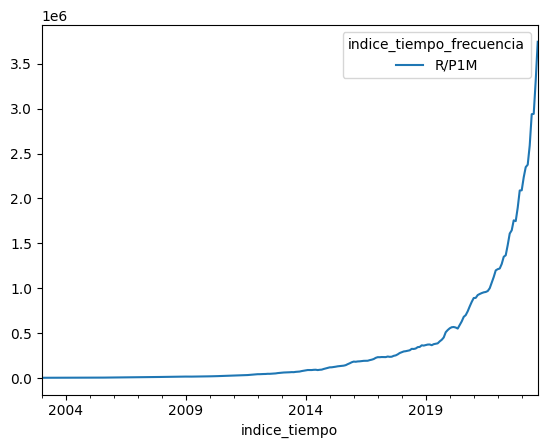

In [ ]:
data['91.1_DETALLE_PRTAS_0_0_60'].dropna().plot()

In [ ]:
import pandas as pd

# Convert the exponential_detection dictionary to a DataFrame
exponential_detection_df = pd.DataFrame.from_dict(exponential_detection, orient='index', columns=['is_exponential'])
exponential_detection_df.index = pd.MultiIndex.from_tuples(exponential_detection_df.index, names=['serie_id', 'indice_tiempo_frecuencia'])

# Convert the fit_parameters dictionary to a DataFrame
fit_parameters_df = pd.DataFrame.from_dict(fit_parameters, orient='index')
fit_parameters_df.index.names = exponential_detection_df.index.names

# Merge the two DataFrames based on their index
result_df = pd.merge(exponential_detection_df, fit_parameters_df, left_index=True, right_index=True).reset_index()

result_df


serie_id indice_tiempo_frecuencia  is_exponential  \
0     101.1_I2ABA_2016_M_28                    R/P1M            True   
1      101.1_I2AB_2016_M_26                    R/P1M            True   
2     101.1_I2AMS_2016_M_30                    R/P1M            True   
3     101.1_I2BSV_2016_M_15                    R/P1M           False   
4     101.1_I2EDH_2016_M_31                    R/P1M            True   
...                     ...                      ...             ...   
9661    93.1_UU68DCI_0_0_25                    R/P1M           False   
9662       94.2_CD_D_0_0_10                    R/P1D            True   
9663     94.2_UVAD_D_0_0_10                    R/P1D            True   
9664     94.2_UVID_D_0_0_10                    R/P1D            True   
9665      _ISCCAN_0_0_23_80                    R/P1M           False   

             slope  intercept  r_squared    abs_sq_err  
0     1.487328e-08 -18.070480   0.968172  6.570530e+05  
1     1.576920e-08 -19.291705   0.966821  1.572919e+06  
2     1.505310e-08 -18.139589   0.967948  1.182427e+06  
3     1.419104e-08 -16.864052   0.955221  1.010365e+06  
4     1.562255e-08 -19.093450   0.971935  1.223332e+06  
...            ...        ...        ...           ...  
9661  0.000000e+00   1.098612   1.000000  1.124127e-29  
9662  1.467620e-08 -20.309284   0.974244  3.111595e+03  
9663  1.466151e-08 -19.361228   0.974356  1.962196e+04  
9664  1.463789e-08 -19.380482   0.984320  8.412581e+03  
9665  7.062264e-09   7.194496   0.132052  3.329634e+17  

[9666 rows x 7 columns]

In [ ]:
exp_indicator = result_df[['serie_id', 'is_exponential']].drop_duplicates()

In [ ]:
csv_filename1 = './datos/series-tiempo.csv'
# serie = 
series_info = pd.read_csv(csv_filename1)

In [ ]:
serie_exp = series_info.merge(exp_indicator, how = 'left')

In [ ]:
serie_exp.head()

catalogo_id  dataset_id  distribucion_id             serie_id indice_tiempo  \
0        sspm           1              1.1  1.1_OGP_D_1993_A_17    1993-01-01   
1        sspm           1              1.1  1.1_OGP_D_1993_A_17    1994-01-01   
2        sspm           1              1.1  1.1_OGP_D_1993_A_17    1995-01-01   
3        sspm           1              1.1  1.1_OGP_D_1993_A_17    1996-01-01   
4        sspm           1              1.1  1.1_OGP_D_1993_A_17    1997-01-01   

  indice_tiempo_frecuencia          valor       serie_titulo  \
0                    R/P1Y  236520.033577  oferta_global_pib   
1                    R/P1Y  250307.886000  oferta_global_pib   
2                    R/P1Y  243186.101750  oferta_global_pib   
3                    R/P1Y  256626.244000  oferta_global_pib   
4                    R/P1Y  277441.317250  oferta_global_pib   

                        serie_unidades  \
0  Millones de pesos a precios de 1993   
1  Millones de pesos a precios de 1993   
2  Millones de pesos a precios de 1993   
3  Millones de pesos a precios de 1993   
4  Millones de pesos a precios de 1993   

                                                   serie_descripcion  \
0  PIB desestacionalizado, en millones de pesos de 1993 y Trimestral   
1  PIB desestacionalizado, en millones de pesos de 1993 y Trimestral   
2  PIB desestacionalizado, en millones de pesos de 1993 y Trimestral   
3  PIB desestacionalizado, en millones de pesos de 1993 y Trimestral   
4  PIB desestacionalizado, en millones de pesos de 1993 y Trimestral   

                                                                                                                distribucion_descripcion  \
0  Oferta y Demanda Globales por componente, a precios de comprador, en millones de pesos de 1993 y valores anuales desestacionalizados.   
1  Oferta y Demanda Globales por componente, a precios de comprador, en millones de pesos de 1993 y valores anuales desestacionalizados.   
2  Oferta y Demanda Globales por componente, a precios de comprador, en millones de pesos de 1993 y valores anuales desestacionalizados.   
3  Oferta y Demanda Globales por componente, a precios de comprador, en millones de pesos de 1993 y valores anuales desestacionalizados.   
4  Oferta y Demanda Globales por componente, a precios de comprador, en millones de pesos de 1993 y valores anuales desestacionalizados.   

  dataset_tema                           dataset_responsable  \
0    Actividad  Subsecretaría de Programación Macroeconómica   
1    Actividad  Subsecretaría de Programación Macroeconómica   
2    Actividad  Subsecretaría de Programación Macroeconómica   
3    Actividad  Subsecretaría de Programación Macroeconómica   
4    Actividad  Subsecretaría de Programación Macroeconómica   

                                       dataset_fuente  \
0  Instituto Nacional de Estadística y Censos (INDEC)   
1  Instituto Nacional de Estadística y Censos (INDEC)   
2  Instituto Nacional de Estadística y Censos (INDEC)   
3  Instituto Nacional de Estadística y Censos (INDEC)   
4  Instituto Nacional de Estadística y Censos (INDEC)   

                                                    dataset_titulo  \
0  Oferta y Demanda Globales. Datos desestacionalizados. Base 1993   
1  Oferta y Demanda Globales. Datos desestacionalizados. Base 1993   
2  Oferta y Demanda Globales. Datos desestacionalizados. Base 1993   
3  Oferta y Demanda Globales. Datos desestacionalizados. Base 1993   
4  Oferta y Demanda Globales. Datos desestacionalizados. Base 1993   

  is_exponential  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN

In [ ]:
is_exponential = serie_exp.groupby(['dataset_id', 'serie_unidades', 'indice_tiempo_frecuencia', 'is_exponential']).size().unstack()
dataset_titulo = pd.DataFrame(serie_exp.groupby(['dataset_id', 'serie_unidades', 'indice_tiempo_frecuencia'])['dataset_titulo'].first())


out = pd.concat([dataset_titulo, is_exponential], axis = 1)

In [ ]:
out.loc[out[True] > out[False]]

dataset_titulo  \
dataset_id serie_unidades               indice_tiempo_frecuencia                                                                                                        
4          Millones de pesos            R/P1Y                                                                                    Oferta y Demanda Globales. Base 2004   
8          Millones de pesos            R/P1Y                                              Producto Interno Bruto a Precios de Mercado. Precios corrientes. Base 2004   
23         Índice 2004=100              R/P1Y                                                        Índice de precios implícitos del Valor Agregado Bruto. Base 2004   
25         Índice 2004=100              R/P3M                                                 Índice de precios implícitos de la Oferta y Demanda Globales. Base 2004   
37         Miles de pesos               R/P3M                                                                            Ventas en centros de compras (DISCONTINUADO)   
90         Millones de pesos            R/P1M                                                                                                    Agregados monetarios   
101        Índice Dic-2016=100          R/P1M                                                     Índice de Precios al Consumidor GBA (IPC-GBA). Base diciembre 2016.   
112        Índice 2004=100              R/P1Y                                          Índice de Precios Implícitos del Producto Interno Bruto (IPI - PIB). Base 2004   
                                        R/P3M                                          Índice de Precios Implícitos del Producto Interno Bruto (IPI - PIB). Base 2004   
145        Índice                       R/P3M                                                    Índice de Precios al Consumidor Nacional (IPC). Base diciembre 2016.   
166        Millones de Pesos            R/P1Y                                                                       Ingreso nacional, Ahorro nacional y Préstamo neto   
171        Millones de pesos            R/P1Y                                                                                             Fondos Comunes de Inversión   
186        Millones de pesos            R/P1Y                                                             Gasto Público del Gobierno Nacional en Política de Ingresos   
193        Índice base 100              R/P1M                     Índice de Precios al Consumidor de la Ciudad de Buenos Aires. Nivel general y principales aperturas   
194        Índice base 100              R/P1M                                             Índice de Precios al Consumidor de la Provincia de Córdoba. Base 2014 = 100   
195        Índice base 100              R/P1M                                                             Índice de Precios al Consumidor de la Provincia de Mendoza.   
197        Índice base 100              R/P1M                                        Índice de Precios al Consumidor de la Provincia de San Luis. Base oct 2005 = 100   
198        Índice base 100              R/P1M                                                            Índice de Precios al Consumidor de Santa Fe. Base 2014 = 100   
305        2004=100                     R/P1Y                                                  Valor Agregado Bruto a precios básicos por rama de actividad económica   
           Millones de pesos corrientes R/P1Y                                                  Valor Agregado Bruto a precios básicos por rama de actividad económica   
334        Millones de pesos corrientes R/P1Y                                                                            Situación patrimonial del sistema financiero   
377        Millones de pesos            R/P1Y                                          Esquema Ahorro - Inversión - Financimmiento. Ex Cajas Provinciales. Base Caja.   

                                                                   False  \
dataset_id serie_u

In [ ]:
serie.loc[serie.serie_id.str[:3] == '334'][['serie_id', 'serie_titulo', 'serie_unidades', 'serie_descripcion']]

serie_id  \
8133  334.2_BCOS_PRIV_BAC__53   
8325  334.2_SIST_FINANBAC__55   
8327  334.2_SIST_FINANCOS__35   
8332  334.2_SIST_FINANDES__35   
8334  334.2_SIST_FINANDOS__35   
8344  334.2_SIST_FINANICO__51   
8349  334.2_SIST_FINANIVO__24   
8350  334.2_SIST_FINANIVO__49   
8353  334.2_SIST_FINANPIA__58   
8357  334.2_SIST_FINANUBL__58   

                                                    serie_titulo  \
8133       bcos_priv_activo_detalle_titulos_publicos_lebac_nobac   
8325     sist_financ_activo_detalle_titulos_publicos_lebac_nobac   
8327                         sist_financ_activo_titulos_publicos   
8332                         sist_financ_activo_disponibilidades   
8334                         sist_financ_activo_titulos_privados   
8344         sist_financ_activo_detalle_prestamos_sector_publico   
8349                                    sist_financ_total_activo   
8350           sist_financ_activo_por_operaciones_de_pase_activo   
8353  sist_financ_activo_lebac_nobac_tenencia_por_cartera_propia   
8357  sist_financ_activo_detalle_titulos_publ_otros_titulos_publ   

                    serie_unidades  \
8133  Millones de pesos corrientes   
8325  Millones de pesos corrientes   
8327  Millones de pesos corrientes   
8332  Millones de pesos corrientes   
8334  Millones de pesos corrientes   
8344  Millones de pesos corrientes   
8349  Millones de pesos corrientes   
8350  Millones de pesos corrientes   
8353  Millones de pesos corrientes   
8357  Millones de pesos corrientes   

                                                                                         serie_descripcion  
8133                                              Bancos Privados. Activo. Títulos Públicos. Lebac y Nobac  
8325                                           Sistema Financiero. Activo. Títulos Públicos. Lebac y Nobac  
8327                                                          Sistema Financiero. Activo. Títulos Públicos  
8332                                                          Sistema Financiero. Activo. Disponibilidades  
8334                                                          Sistema Financiero. Activo. Títulos privados  
8344                                                 Sistema Financiero. Activo. Préstamos. Sector Público  
8349                                                                      Sistema Financiero. Total Activo  
8350  Sistema Financiero. Activo. Títulos Públicos. Lebac y Nobac. Tenencia por operaciones de pase activo  
8353              Sistema Financiero. Activo. Títulos Públicos. Lebac y Nobac. Tenencia por cartera propia  
8357                                  Sistema Financiero. Activo. Títulos Públicos. Otros Títulos públicos

## Situación patrimonial del sistema financiero	

In [ ]:
data_ = data.loc['2019':'2024']

subset = '334'
dataset = data_[[col for col in data_.columns if subset == col[0][:len(subset)]]].dropna(how = 'all')
# dataset.plot()

top_consultas = consultas.loc[consultas.serie_id.str.startswith(subset)].sort_values(by = 'consultas_180_dias', ascending = False)
display(top_consultas.head(10))

serie_id  consultas_total  consultas_30_dias  \
8349  334.2_SIST_FINANIVO__24              145                 20   
8334  334.2_SIST_FINANDOS__35              136                 20   
8325  334.2_SIST_FINANBAC__55              143                 13   
8332  334.2_SIST_FINANDES__35              133                 18   
8350  334.2_SIST_FINANIVO__49              138                 21   
8353  334.2_SIST_FINANPIA__58              132                 18   
8357  334.2_SIST_FINANUBL__58              119                 17   
8133  334.2_BCOS_PRIV_BAC__53              110                 26   
8327  334.2_SIST_FINANCOS__35              129                 17   
8344  334.2_SIST_FINANICO__51              125                 19   

      consultas_90_dias  consultas_180_dias  
8349                 20                  57  
8334                 17                  55  
8325                 17                  54  
8332                 19                  51  
8350                 16                  51  
8353                 17                  49  
8357                 15                  49  
8133                 35                  48  
8327                 17                  47  
8344                 13                  47

In [ ]:
series_subset = serie.loc[serie.serie_id.isin(top_consultas.head(10).serie_id)][['serie_id', 'serie_titulo', 'serie_unidades', 'serie_descripcion']]
data_subset = data[series_subset.serie_id.values]

aligned_data = align_time_series(data_subset, anchor_col=series_subset.serie_id.values[0])
aligned_data = aligned_data.dropna(how = 'all')

plot_data = np.log10(aligned_data).dropna(how = 'all')



/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


In [ ]:
pd.options.display.precision = 4

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import datetime

def analyze_time_series(data, time_period='M'):
    """
    Analyzes time series data by calculating average percent change and slope of log-transformed data.
    
    :param data: DataFrame containing time series data
    :param time_period: String representing the time period for resampling ('D' for daily, 'M' for monthly, etc.)
    :return: DataFrame with average percent change and slope for each series
    """
    # Resample the data according to the specified time period
    resampled_data = data.resample(time_period).mean()
    
    # Calculate percent change
    pct_change = resampled_data.pct_change().mean()
    
    # Apply log transformation
    log_data = np.log(resampled_data + 1)  # Adding 1 to avoid log(0)
    
    # Prepare results DataFrame
    results = pd.DataFrame(index=data.columns, columns=['Average Percent Change', 'Slope'])
    results['Average Percent Change'] = pct_change
    
    # Calculate slope of log-transformed data
    for col in log_data.columns:
        y = log_data[col].dropna().values.reshape(-1, 1)
        x = np.arange(len(y)).reshape(-1, 1)
        model = LinearRegression().fit(x, y)
        slope = model.coef_[0][0]
        results.loc[col, 'Slope'] = slope
    
    return results


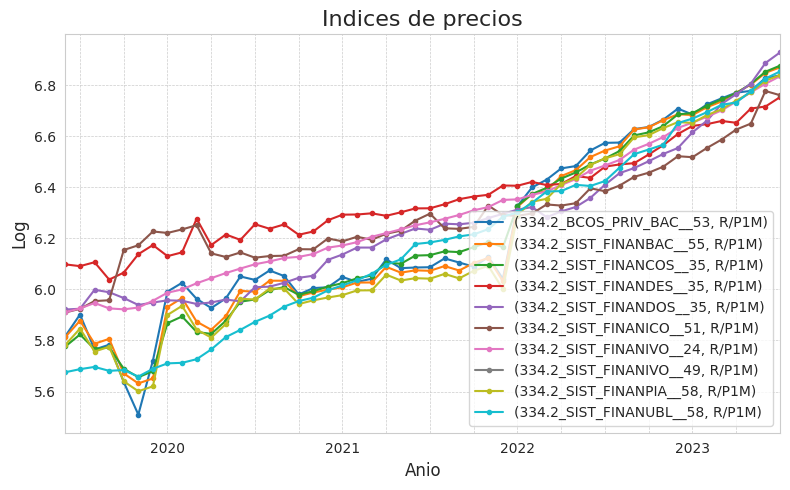

In [ ]:

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Step 3: Plot the data
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the data
# filtered_data.plot()
# tasas_interes.dropna(how = 'all').plot(ax=ax, linewidth=1, alpha = .8)
plot_data.tail(50).plot(ax = ax, marker = '.')

# Adding grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set the minimum y-axis limit to 0
# ax.set_ylim(bottom=0)

# Add titles and labels
ax.set_title('Indices de precios', fontsize=16)
ax.set_xlabel('Anio', fontsize=12)
ax.set_ylabel('Log', fontsize=12)

# Move the legend out of the plot
# ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)
# ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)

# No legend
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:

# Example usage:
# Assume 'aligned_data' is the DataFrame containing your time series data
analyze_time_series(data_subset.loc['2022-03':].dropna(how = 'all'), time_period='M')


Average Percent Change  \
serie_id                indice_tiempo_frecuencia                           
334.2_BCOS_PRIV_BAC__53 R/P1M                                     0.0618   
334.2_SIST_FINANBAC__55 R/P1M                                     0.0730   
334.2_SIST_FINANCOS__35 R/P1M                                     0.0718   
334.2_SIST_FINANDES__35 R/P1M                                     0.0518   
334.2_SIST_FINANDOS__35 R/P1M                                     0.0981   
334.2_SIST_FINANICO__51 R/P1M                                     0.0667   
334.2_SIST_FINANIVO__24 R/P1M                                     0.0672   
334.2_SIST_FINANIVO__49 R/P1M                                        NaN   
334.2_SIST_FINANPIA__58 R/P1M                                     0.0730   
334.2_SIST_FINANUBL__58 R/P1M                                     0.0714   

                                                   Slope  
serie_id                indice_tiempo_frecuencia          
334.2_BCOS_PRIV_BAC__53 R/P1M                     0.0563  
334.2_SIST_FINANBAC__55 R/P1M                     0.0641  
334.2_SIST_FINANCOS__35 R/P1M                     0.0673  
334.2_SIST_FINANDES__35 R/P1M                     0.0514  
334.2_SIST_FINANDOS__35 R/P1M                     0.0924  
334.2_SIST_FINANICO__51 R/P1M                     0.0624  
334.2_SIST_FINANIVO__24 R/P1M                     0.0644  
334.2_SIST_FINANIVO__49 R/P1M                        0.0  
334.2_SIST_FINANPIA__58 R/P1M                     0.0641  
334.2_SIST_FINANUBL__58 R/P1M                     0.0728

## Valor Agregado Bruto a precios básicos por rama de actividad económica	

In [ ]:
data_ = data.loc['2019':'2024']

subset = '305.2'
dataset = data_[[col for col in data_.columns if subset == col[0][:len(subset)]]].dropna(how = 'all')
# dataset.plot()

top_consultas = consultas.loc[consultas.serie_id.str.startswith(subset)].sort_values(by = 'consultas_180_dias', ascending = False)
display(top_consultas.head(10))

serie_id  consultas_total  consultas_30_dias  \
5983       305.2_VALOR_AGRECOS_0_36              150                 23   
5920       305.2_AGRI_GANADTAL_0_27              128                 14   
5923   305.2_CAZA_REPOBNEX_0_T_46_2              107                 14   
5937       305.2_EXPL_MIN_COSP_0_59              114                 17   
5927  305.2_CRIA_ANIMALES_0_T_13_85              106                 16   
5942       305.2_IND_MANUFAACO_0_35              112                 17   
5936       305.2_EXPLO_MINATAL_0_22              103                 15   
5922       305.2_AGRI_GANADXOS_0_53              101                 17   
5921       305.2_AGRI_GANADXOS_0_50              111                 15   
5976  305.2_SERVICIOS_IOS_0_T_48_66               99                 16   

      consultas_90_dias  consultas_180_dias  
5983                  4                  42  
5920                  6                  38  
5923                  7                  36  
5937                  6                  35  
5927                  8                  35  
5942                  7                  34  
5936                  3                  34  
5922                  7                  33  
5921                  5                  33  
5976                  6                  33

In [ ]:
series_subset = serie.loc[serie.serie_id.isin(top_consultas.serie_id)][['serie_id', 'serie_titulo', 'serie_unidades', 'serie_descripcion']]
# # series_subset = series_subset.loc[series_subset.serie_unidades == 'Índice']
# series_subset

In [ ]:
data_subset = data[series_subset.serie_id.values]

x = data_subset.dropna(how = 'all').loc['2022'].mean()
x = x.sort_values(ascending = False)

main = (x/x.sum()).cumsum().head(10)


In [ ]:
data_subset = data[main.index.get_level_values('serie_id')]

aligned_data = align_time_series(data_subset, anchor_col=series_subset.serie_id.values[0])
aligned_data = aligned_data.dropna(how = 'all')

plot_data = np.log10(aligned_data).dropna(how = 'all')



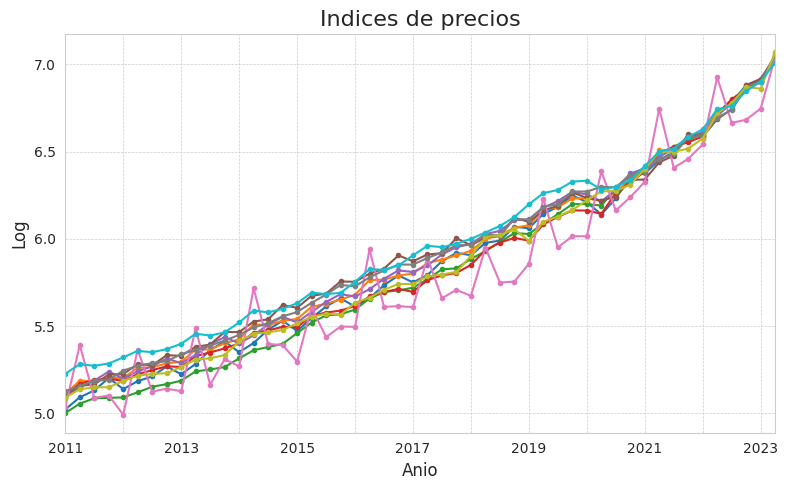

In [ ]:

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Step 3: Plot the data
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the data
# filtered_data.plot()
# tasas_interes.dropna(how = 'all').plot(ax=ax, linewidth=1, alpha = .8)
plot_data.tail(50).plot(ax = ax, marker = '.')

# Adding grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set the minimum y-axis limit to 0
# ax.set_ylim(bottom=0)

# Add titles and labels
ax.set_title('Indices de precios', fontsize=16)
ax.set_xlabel('Anio', fontsize=12)
ax.set_ylabel('Log', fontsize=12)

# Move the legend out of the plot
# ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)
# ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)

# No legend
ax.legend().set_visible(False)

plt.tight_layout()
plt.show()


In [ ]:
analyze_time_series(data_subset.loc['2020-06':].dropna(how = 'all'), time_period='M')


Average Percent Change  \
serie_id                 indice_tiempo_frecuencia                           
305.2_VALOR_AGRECOS_0_36 R/P3M                                     0.0602   
305.2_COMERCIO_MNES_0_41 R/P3M                                     0.0580   
305.2_IND_MANUFATAL_0_17 R/P3M                                     0.0618   
305.2_ACT_INMOBITAL_0_36 R/P3M                                     0.0571   
305.2_ACT_INMOBISTO_0_36 R/P3M                                     0.0632   
305.2_ADM_PUB_DERIA_0_59 R/P3M                                     0.0633   
305.2_AGRI_GANADTAL_0_27 R/P3M                                     0.1206   
305.2_ENSENIANZATAL_0_16 R/P3M                                     0.0590   
305.2_IND_MANUFADAS_0_49 R/P3M                                     0.0644   
305.2_TRANSP_COMTAL_0_17 R/P3M                                     0.0546   

                                                    Slope  
serie_id                 indice_tiempo_frecuencia          
305.2_VALOR_AGRECOS_0_36 R/P3M                     0.1518  
305.2_COMERCIO_MNES_0_41 R/P3M                     0.1489  
305.2_IND_MANUFATAL_0_17 R/P3M                     0.1558  
305.2_ACT_INMOBITAL_0_36 R/P3M                     0.1482  
305.2_ACT_INMOBISTO_0_36 R/P3M                     0.1586  
305.2_ADM_PUB_DERIA_0_59 R/P3M                     0.1605  
305.2_AGRI_GANADTAL_0_27 R/P3M                     0.1445  
305.2_ENSENIANZATAL_0_16 R/P3M                     0.1488  
305.2_IND_MANUFADAS_0_49 R/P3M                     0.1536  
305.2_TRANSP_COMTAL_0_17 R/P3M                     0.1445

## Índice de Precios al Consumidor de la Provincia de San Luis. Base oct 2005 = 100		

In [ ]:
data_ = data.loc['2019':'2024']

subset = '197'
dataset = data_[[col for col in data_.columns if subset == col[0][:len(subset)]]].dropna(how = 'all')
# dataset.plot()

top_consultas = consultas.loc[consultas.serie_id.str.startswith(subset)].sort_values(by = 'consultas_180_dias', ascending = False)
display(top_consultas.head(10))

serie_id  consultas_total  consultas_30_dias  \
4894  197.1_NIVEL_GENERAL_2014_0_13            14125               1400   
4892  197.1_ESPARCIMIENTO_2014_0_13              792                 81   
4890    197.1_EDUCACIONION_2014_0_9              480                 74   
4891  197.1_EQUIPAMIENGAR_2014_0_32              407                 64   
4888  197.1_ALIMENTOS_DAS_2014_0_17              403                 71   
4893  197.1_INDUMENTARRIA_2014_0_12              382                 68   
4897  197.1_VIVIENDA_SCOS_2014_0_26              352                 64   
4889  197.1_ATENCION_MLUD_2014_0_28              353                 65   
4896  197.1_TRANSPORTENES_2014_0_25              344                 58   
4895  197.1_OTROS_BIENIOS_2014_0_29              329                 58   

      consultas_90_dias  consultas_180_dias  
4894               1684                4792  
4892                 91                 213  
4890                 85                 187  
4891                 83                 185  
4888                 84                 182  
4893                 81                 176  
4897                 81                 174  
4889                 85                 173  
4896                 77                 166  
4895                 71                 161

In [ ]:
# aligned_data.loc['2021':].min(1)

In [ ]:
data_subset = data[top_consultas.head(10).serie_id.values]

aligned_data = align_time_series(data_subset, anchor_col=top_consultas.serie_id.values[0])
aligned_data = aligned_data.dropna(how = 'all')

plot_data = np.log10(aligned_data).dropna(how = 'all')



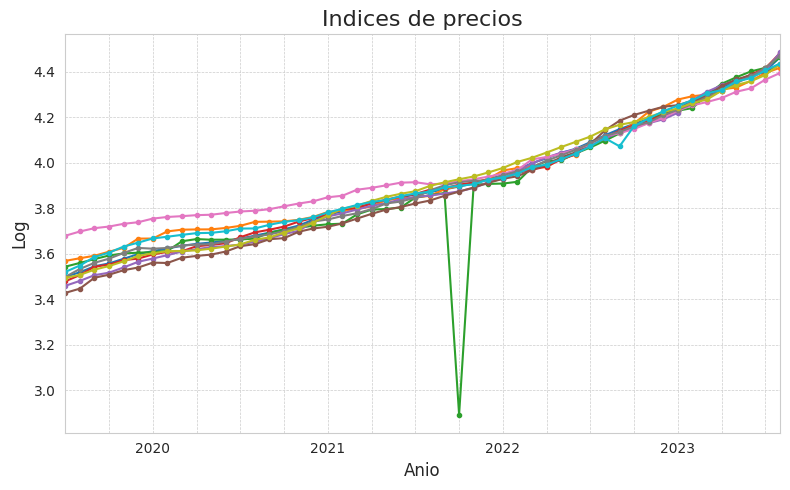

In [ ]:

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Step 3: Plot the data
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the data
# filtered_data.plot()
# tasas_interes.dropna(how = 'all').plot(ax=ax, linewidth=1, alpha = .8)
plot_data.tail(50).plot(ax = ax, marker = '.')

# Adding grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set the minimum y-axis limit to 0
# ax.set_ylim(bottom=0)

# Add titles and labels
ax.set_title('Indices de precios', fontsize=16)
ax.set_xlabel('Anio', fontsize=12)
ax.set_ylabel('Log', fontsize=12)

# Move the legend out of the plot
# ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)
# ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)

# No legend
ax.legend().set_visible(False)

plt.tight_layout()
plt.show()


In [ ]:
analyze_time_series(data_subset.loc['2022-03':].dropna(how = 'all'), time_period='M')


Average Percent Change  \
serie_id                      indice_tiempo_frecuencia                           
197.1_NIVEL_GENERAL_2014_0_13 R/P1M                                     0.0653   
197.1_ESPARCIMIENTO_2014_0_13 R/P1M                                     0.0611   
197.1_EDUCACIONION_2014_0_9   R/P1M                                     0.0681   
197.1_EQUIPAMIENGAR_2014_0_32 R/P1M                                     0.0723   
197.1_ALIMENTOS_DAS_2014_0_17 R/P1M                                     0.0691   
197.1_INDUMENTARRIA_2014_0_12 R/P1M                                     0.0660   
197.1_VIVIENDA_SCOS_2014_0_26 R/P1M                                     0.0530   
197.1_ATENCION_MLUD_2014_0_28 R/P1M                                     0.0688   
197.1_TRANSPORTENES_2014_0_25 R/P1M                                     0.0575   
197.1_OTROS_BIENIOS_2014_0_29 R/P1M                                     0.0651   

                                                         Slope  
serie_id                      indice_tiempo_frecuencia          
197.1_NIVEL_GENERAL_2014_0_13 R/P1M                     0.0607  
197.1_ESPARCIMIENTO_2014_0_13 R/P1M                     0.0615  
197.1_EDUCACIONION_2014_0_9   R/P1M                     0.0662  
197.1_EQUIPAMIENGAR_2014_0_32 R/P1M                     0.0661  
197.1_ALIMENTOS_DAS_2014_0_17 R/P1M                     0.0628  
197.1_INDUMENTARRIA_2014_0_12 R/P1M                     0.0623  
197.1_VIVIENDA_SCOS_2014_0_26 R/P1M                     0.0519  
197.1_ATENCION_MLUD_2014_0_28 R/P1M                     0.0626  
197.1_TRANSPORTENES_2014_0_25 R/P1M                     0.0524  
197.1_OTROS_BIENIOS_2014_0_29 R/P1M                     0.0641

In [ ]:
analyze_time_series(data_subset.loc['2023-03':].dropna(how = 'all'), time_period='M')


Average Percent Change  \
serie_id                   indice_tiempo_frecuencia                           
195.1_ALIMENTOS_DAS_0_0_17 R/P1M                                     0.0790   
195.1_ATENCION_MLUD_0_0_28 R/P1M                                     0.1101   
195.1_EDUCACIONION_0_0_9   R/P1M                                     0.1196   
195.1_EQUIPAMIENGAR_0_0_32 R/P1M                                     0.0899   
195.1_ESPARCIMIENTO_0_0_13 R/P1M                                     0.0792   
195.1_INDUMENTARRIA_0_0_12 R/P1M                                     0.0661   
195.1_NIVEL_GENERAL_0_0_13 R/P1M                                     0.0781   
195.1_OTROS_BIENIOS_0_0_29 R/P1M                                     0.0710   
195.1_TRANSPORTENES_0_0_25 R/P1M                                     0.0640   
195.1_VIVIENDA_SCOS_0_0_26 R/P1M                                     0.0627   

                                                      Slope  
serie_id                   indice_tiempo_frecuencia          
195.1_ALIMENTOS_DAS_0_0_17 R/P1M                     0.0684  
195.1_ATENCION_MLUD_0_0_28 R/P1M                     0.0997  
195.1_EDUCACIONION_0_0_9   R/P1M                     0.1015  
195.1_EQUIPAMIENGAR_0_0_32 R/P1M                     0.0797  
195.1_ESPARCIMIENTO_0_0_13 R/P1M                     0.0776  
195.1_INDUMENTARRIA_0_0_12 R/P1M                     0.0583  
195.1_NIVEL_GENERAL_0_0_13 R/P1M                     0.0704  
195.1_OTROS_BIENIOS_0_0_29 R/P1M                     0.0651  
195.1_TRANSPORTENES_0_0_25 R/P1M                     0.0614  
195.1_VIVIENDA_SCOS_0_0_26 R/P1M                      0.058

## Índice de Precios al Consumidor de la Provincia de Mendoza.		

In [ ]:
data_ = data.loc['2019':'2024']

subset = '195'
dataset = data_[[col for col in data_.columns if subset == col[0][:len(subset)]]].dropna(how = 'all')
# dataset.plot()

top_consultas = consultas.loc[consultas.serie_id.str.startswith(subset)].sort_values(by = 'consultas_180_dias', ascending = False)
display(top_consultas.head(10))

serie_id  consultas_total  consultas_30_dias  \
4883  195.1_NIVEL_GENERAL_0_0_13             2875                335   
4879    195.1_EDUCACIONION_0_0_9              748                 37   
4881  195.1_ESPARCIMIENTO_0_0_13              356                 27   
4882  195.1_INDUMENTARRIA_0_0_12              406                 39   
4880  195.1_EQUIPAMIENGAR_0_0_32              204                 19   
4877  195.1_ALIMENTOS_DAS_0_0_17              241                 21   
4885  195.1_TRANSPORTENES_0_0_25              229                 17   
4886  195.1_VIVIENDA_SCOS_0_0_26              200                 20   
4878  195.1_ATENCION_MLUD_0_0_28              196                 21   
4884  195.1_OTROS_BIENIOS_0_0_29              184                 21   

      consultas_90_dias  consultas_180_dias  
4883                370                1668  
4879                 31                 112  
4881                 28                 112  
4882                 33                 111  
4880                 25                  75  
4877                 18                  74  
4885                 17                  72  
4886                 20                  72  
4878                 20                  70  
4884                 20                  70

In [ ]:
subset = '195'
series_subset = serie.loc[serie.serie_id.str.startswith(subset)][['serie_id', 'serie_titulo', 'serie_unidades', 'serie_descripcion']]
# series_subset = series_subset.loc[series_subset.serie_unidades == 'Índice']
series_subset

serie_id                      serie_titulo  \
4877  195.1_ALIMENTOS_DAS_0_0_17                 alimentos_bebidas   
4878  195.1_ATENCION_MLUD_0_0_28      atencion_medica_gastos_salud   
4879    195.1_EDUCACIONION_0_0_9                         educacion   
4880  195.1_EQUIPAMIENGAR_0_0_32  equipamiento_mantenimiento_hogar   
4881  195.1_ESPARCIMIENTO_0_0_13                     esparcimiento   
4882  195.1_INDUMENTARRIA_0_0_12                      indumentaria   
4883  195.1_NIVEL_GENERAL_0_0_13                     nivel_general   
4884  195.1_OTROS_BIENIOS_0_0_29     otros_bienes_servicios_varios   
4885  195.1_TRANSPORTENES_0_0_25         transporte_comunicaciones   
4886  195.1_VIVIENDA_SCOS_0_0_26        vivienda_servicios_basicos   

       serie_unidades                                     serie_descripcion  
4877  Índice base 100                 Nivel de precios de alimentos bebidas  
4878  Índice base 100      Nivel de precios de atención medica gastos salud  
4879  Índice base 100                         Nivel de precios de educacion  
4880  Índice base 100  Nivel de precios de equipamiento mantenimiento hogar  
4881  Índice base 100                     Nivel de precios de esparcimiento  
4882  Índice base 100                      Nivel de precios de indumentaria  
4883  Índice base 100                    Nivel de precios del nivel general  
4884  Índice base 100     Nivel de precios de otros bienes servicios varios  
4885  Índice base 100         Nivel de precios de transporte comunicaciones  
4886  Índice base 100        Nivel de precios de vivienda servicios basicos

In [ ]:
data_subset = data[series_subset.serie_id.values]

aligned_data = align_time_series(data_subset, anchor_col=series_subset.serie_id.values[0])
aligned_data = aligned_data.dropna(how = 'all')

plot_data = np.log10(aligned_data).dropna(how = 'all')



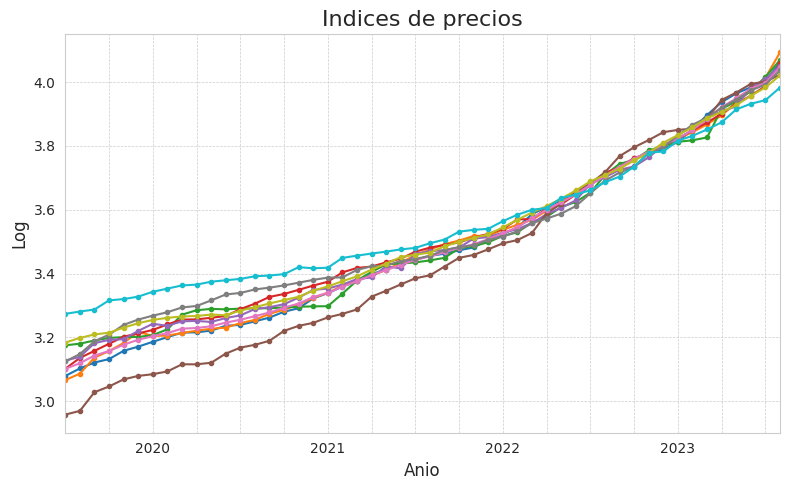

In [ ]:

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Step 3: Plot the data
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the data
# filtered_data.plot()
# tasas_interes.dropna(how = 'all').plot(ax=ax, linewidth=1, alpha = .8)
plot_data.tail(50).plot(ax = ax, marker = '.')

# Adding grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set the minimum y-axis limit to 0
# ax.set_ylim(bottom=0)

# Add titles and labels
ax.set_title('Indices de precios', fontsize=16)
ax.set_xlabel('Anio', fontsize=12)
ax.set_ylabel('Log', fontsize=12)

# Move the legend out of the plot
# ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)
# ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)

# No legend
ax.legend().set_visible(False)

plt.tight_layout()
plt.show()


In [ ]:
analyze_time_series(data_subset.loc['2022-03':].dropna(how = 'all'), time_period='M')


Average Percent Change  \
serie_id                   indice_tiempo_frecuencia                           
195.1_ALIMENTOS_DAS_0_0_17 R/P1M                                     0.0667   
195.1_ATENCION_MLUD_0_0_28 R/P1M                                     0.0741   
195.1_EDUCACIONION_0_0_9   R/P1M                                     0.0724   
195.1_EQUIPAMIENGAR_0_0_32 R/P1M                                     0.0688   
195.1_ESPARCIMIENTO_0_0_13 R/P1M                                     0.0696   
195.1_INDUMENTARRIA_0_0_12 R/P1M                                     0.0702   
195.1_NIVEL_GENERAL_0_0_13 R/P1M                                     0.0665   
195.1_OTROS_BIENIOS_0_0_29 R/P1M                                     0.0673   
195.1_TRANSPORTENES_0_0_25 R/P1M                                     0.0600   
195.1_VIVIENDA_SCOS_0_0_26 R/P1M                                     0.0536   

                                                      Slope  
serie_id                   indice_tiempo_frecuencia          
195.1_ALIMENTOS_DAS_0_0_17 R/P1M                     0.0629  
195.1_ATENCION_MLUD_0_0_28 R/P1M                     0.0631  
195.1_EDUCACIONION_0_0_9   R/P1M                     0.0645  
195.1_EQUIPAMIENGAR_0_0_32 R/P1M                     0.0606  
195.1_ESPARCIMIENTO_0_0_13 R/P1M                     0.0644  
195.1_INDUMENTARRIA_0_0_12 R/P1M                     0.0642  
195.1_NIVEL_GENERAL_0_0_13 R/P1M                     0.0622  
195.1_OTROS_BIENIOS_0_0_29 R/P1M                     0.0665  
195.1_TRANSPORTENES_0_0_25 R/P1M                     0.0573  
195.1_VIVIENDA_SCOS_0_0_26 R/P1M                      0.053

In [ ]:
analyze_time_series(data_subset.loc['2023-03':].dropna(how = 'all'), time_period='M')


Average Percent Change  \
serie_id                   indice_tiempo_frecuencia                           
195.1_ALIMENTOS_DAS_0_0_17 R/P1M                                     0.0790   
195.1_ATENCION_MLUD_0_0_28 R/P1M                                     0.1101   
195.1_EDUCACIONION_0_0_9   R/P1M                                     0.1196   
195.1_EQUIPAMIENGAR_0_0_32 R/P1M                                     0.0899   
195.1_ESPARCIMIENTO_0_0_13 R/P1M                                     0.0792   
195.1_INDUMENTARRIA_0_0_12 R/P1M                                     0.0661   
195.1_NIVEL_GENERAL_0_0_13 R/P1M                                     0.0781   
195.1_OTROS_BIENIOS_0_0_29 R/P1M                                     0.0710   
195.1_TRANSPORTENES_0_0_25 R/P1M                                     0.0640   
195.1_VIVIENDA_SCOS_0_0_26 R/P1M                                     0.0627   

                                                      Slope  
serie_id                   indice_tiempo_frecuencia          
195.1_ALIMENTOS_DAS_0_0_17 R/P1M                     0.0684  
195.1_ATENCION_MLUD_0_0_28 R/P1M                     0.0997  
195.1_EDUCACIONION_0_0_9   R/P1M                     0.1015  
195.1_EQUIPAMIENGAR_0_0_32 R/P1M                     0.0797  
195.1_ESPARCIMIENTO_0_0_13 R/P1M                     0.0776  
195.1_INDUMENTARRIA_0_0_12 R/P1M                     0.0583  
195.1_NIVEL_GENERAL_0_0_13 R/P1M                     0.0704  
195.1_OTROS_BIENIOS_0_0_29 R/P1M                     0.0651  
195.1_TRANSPORTENES_0_0_25 R/P1M                     0.0614  
195.1_VIVIENDA_SCOS_0_0_26 R/P1M                      0.058

## IPC. Nivel General. Base dic 2016. Mensual.

In [ ]:
subset = '145.3'
series_subset = serie.loc[serie.serie_id.str.startswith(subset)][['serie_id', 'serie_titulo', 'serie_unidades', 'serie_descripcion']]
series_subset = series_subset.loc[series_subset.serie_unidades == 'Índice']
series_subset

serie_id      serie_titulo serie_unidades  \
2081  145.3_INGCUYUYO_DICI_M_11       ipc_ng_cuyo         Índice   
2082  145.3_INGGBAGBA_DICI_M_10        ipc_ng_gba         Índice   
2086  145.3_INGNACNAL_DICI_M_15   ipc_ng_nacional         Índice   
2089  145.3_INGNEANEA_DICI_M_10        ipc_ng_nea         Índice   
2092  145.3_INGNOANOA_DICI_M_10        ipc_ng_noa         Índice   
2094  145.3_INGPAMANA_DICI_M_15   ipc_ng_pampeana         Índice   
2098  145.3_INGPATNIA_DICI_M_16  ipc_ng_patagonia         Índice   

                                                  serie_descripcion  
2081               IPC. Nivel General Cuyo. Base dic 2016. Mensual.  
2082  IPC. Nivel General Gran Buenos Aires. Base dic 2016. Mensual.  
2086           IPC. Nivel General Nacional. Base dic 2016. Mensual.  
2089     IPC. Nivel General Región Noreste. Base dic 2016. Mensual.  
2092    IPC. Nivel General región Noroeste. Base dic 2016. Mensual.  
2094    IPC. Nivel General Región Pampeana. Base dic 2016. Mensual.  
2098  IPC. Nivel General Región Patagónica. Base dic 2016. Mensual.

In [ ]:
data_subset = data[series_subset.serie_id.values]

aligned_data = align_time_series(data_subset, anchor_col=series_subset.serie_id.values[0])
aligned_data = aligned_data.dropna(how = 'all')

plot_data = np.log10(aligned_data).dropna(how = 'all')



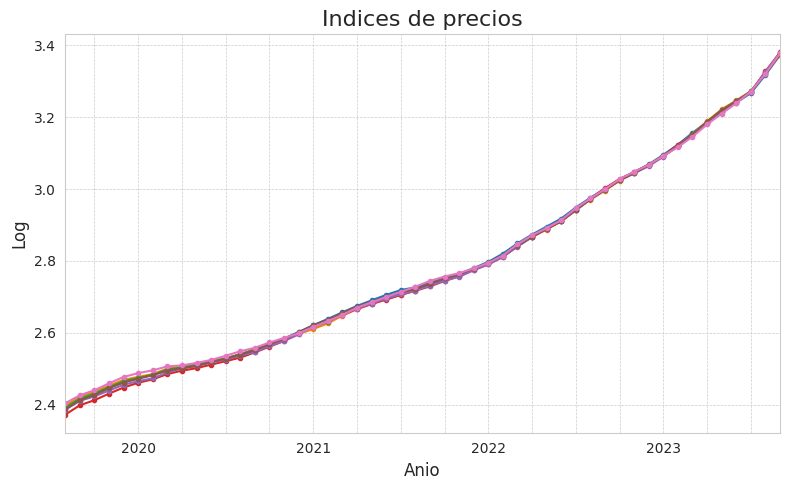

In [ ]:

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Step 3: Plot the data
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the data
# filtered_data.plot()
# tasas_interes.dropna(how = 'all').plot(ax=ax, linewidth=1, alpha = .8)
plot_data.tail(50).plot(ax = ax, marker = '.')

# Adding grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set the minimum y-axis limit to 0
# ax.set_ylim(bottom=0)

# Add titles and labels
ax.set_title('Indices de precios', fontsize=16)
ax.set_xlabel('Anio', fontsize=12)
ax.set_ylabel('Log', fontsize=12)

# Move the legend out of the plot
# ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)
# ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)

# No legend
ax.legend().set_visible(False)

plt.tight_layout()
plt.show()


In [ ]:
analyze_time_series(data_subset.loc['2022'].dropna(how = 'all'), time_period='M')


Average Percent Change  \
serie_id                  indice_tiempo_frecuencia                           
145.3_INGCUYUYO_DICI_M_11 R/P1M                                     0.0585   
145.3_INGGBAGBA_DICI_M_10 R/P1M                                     0.0590   
145.3_INGNACNAL_DICI_M_15 R/P1M                                     0.0589   
145.3_INGNEANEA_DICI_M_10 R/P1M                                     0.0599   
145.3_INGNOANOA_DICI_M_10 R/P1M                                     0.0589   
145.3_INGPAMANA_DICI_M_15 R/P1M                                     0.0586   
145.3_INGPATNIA_DICI_M_16 R/P1M                                     0.0589   

                                                     Slope  
serie_id                  indice_tiempo_frecuencia          
145.3_INGCUYUYO_DICI_M_11 R/P1M                     0.0578  
145.3_INGGBAGBA_DICI_M_10 R/P1M                     0.0587  
145.3_INGNACNAL_DICI_M_15 R/P1M                     0.0586  
145.3_INGNEANEA_DICI_M_10 R/P1M                     0.0599  
145.3_INGNOANOA_DICI_M_10 R/P1M                     0.0589  
145.3_INGPAMANA_DICI_M_15 R/P1M                     0.0585  
145.3_INGPATNIA_DICI_M_16 R/P1M                     0.0587

In [ ]:
analyze_time_series(data_subset.loc['2023'].dropna(how = 'all'), time_period='M')


Average Percent Change  \
serie_id                  indice_tiempo_frecuencia                           
145.3_INGCUYUYO_DICI_M_11 R/P1M                                     0.0836   
145.3_INGGBAGBA_DICI_M_10 R/P1M                                     0.0844   
145.3_INGNACNAL_DICI_M_15 R/P1M                                     0.0850   
145.3_INGNEANEA_DICI_M_10 R/P1M                                     0.0870   
145.3_INGNOANOA_DICI_M_10 R/P1M                                     0.0873   
145.3_INGPAMANA_DICI_M_15 R/P1M                                     0.0850   
145.3_INGPATNIA_DICI_M_16 R/P1M                                     0.0860   

                                                     Slope  
serie_id                  indice_tiempo_frecuencia          
145.3_INGCUYUYO_DICI_M_11 R/P1M                     0.0755  
145.3_INGGBAGBA_DICI_M_10 R/P1M                     0.0778  
145.3_INGNACNAL_DICI_M_15 R/P1M                      0.078  
145.3_INGNEANEA_DICI_M_10 R/P1M                     0.0791  
145.3_INGNOANOA_DICI_M_10 R/P1M                     0.0795  
145.3_INGPAMANA_DICI_M_15 R/P1M                      0.078  
145.3_INGPATNIA_DICI_M_16 R/P1M                     0.0792

In [ ]:
analyze_time_series(data_subset.loc['2023-06':].dropna(how = 'all'), time_period='M')


Average Percent Change  \
serie_id                  indice_tiempo_frecuencia                           
145.3_INGCUYUYO_DICI_M_11 R/P1M                                     0.1076   
145.3_INGGBAGBA_DICI_M_10 R/P1M                                     0.1021   
145.3_INGNACNAL_DICI_M_15 R/P1M                                     0.1051   
145.3_INGNEANEA_DICI_M_10 R/P1M                                     0.1113   
145.3_INGNOANOA_DICI_M_10 R/P1M                                     0.1098   
145.3_INGPAMANA_DICI_M_15 R/P1M                                     0.1058   
145.3_INGPATNIA_DICI_M_16 R/P1M                                     0.1131   

                                                     Slope  
serie_id                  indice_tiempo_frecuencia          
145.3_INGCUYUYO_DICI_M_11 R/P1M                     0.1032  
145.3_INGGBAGBA_DICI_M_10 R/P1M                     0.0987  
145.3_INGNACNAL_DICI_M_15 R/P1M                     0.1013  
145.3_INGNEANEA_DICI_M_10 R/P1M                     0.1077  
145.3_INGNOANOA_DICI_M_10 R/P1M                     0.1061  
145.3_INGPAMANA_DICI_M_15 R/P1M                     0.1017  
145.3_INGPATNIA_DICI_M_16 R/P1M                     0.1076

## Índice de Precios al Consumidor Nacional (IPC). Base diciembre 2016.	

In [ ]:
data_ = data.loc['2019':'2024']

subset = '145.1'
dataset = data_[[col for col in data_.columns if subset == col[0][:len(subset)]]].dropna(how = 'all')
# dataset.plot()

top_consultas = consultas.loc[consultas.serie_id.str.startswith(subset)].sort_values(by = 'consultas_180_dias', ascending = False)
display(top_consultas.head(10))

serie_id  consultas_total  consultas_30_dias  \
1784  145.1_IPC_NG_NACNAL_DICI_T_15              515                 87   
1788     145.1_PVOSOTIONC_DICI_T_16              433                 78   
1783  145.1_IPC_NG_GBAGBA_DICI_T_10              374                 67   
1782  145.1_IPC_NG_CUYUYO_DICI_T_11              365                 71   
1787  145.1_IPC_NG_PAMANA_DICI_T_15              365                 71   
1786  145.1_IPC_NG_NOANOA_DICI_T_10              359                 71   
1785  145.1_IPC_NG_NEANEA_DICI_T_10              412                 68   

      consultas_90_dias  consultas_180_dias  
1784                 17                 157  
1788                 19                 148  
1783                 11                 140  
1782                 16                 139  
1787                 12                 139  
1786                 11                 138  
1785                 13                 137

In [ ]:
data_subset = data[[col for col in data.columns if subset == col[0][:len(subset)]]]
aligned_data = align_time_series(data_subset, anchor_col=top_consultas.serie_id.values[0])

# plot_data = np.log10(aligned_data).dropna(how = 'all')
# plot_data = np.log10(data_subset).dropna(how = 'all')
plot_data = data_subset.dropna(how = 'all')

In [ ]:
data_subset.dropna()

serie_id                 145.1_IPC_NG_CUYUYO_DICI_T_11  \
indice_tiempo_frecuencia                         R/P3M   
indice_tiempo                                            
2017-01-01                                  103.632133   
2017-04-01                                  111.063167   
2017-07-01                                  115.721167   
2017-10-01                                  122.197667   
2018-01-01                                  130.577567   
2018-04-01                                  141.397700   
2018-07-01                                  157.929567   
2018-10-01                                  182.506400   
2019-01-01                                  201.044500   
2019-04-01                                  222.531100   
2019-07-01                                  246.520300   
2019-10-01                                  280.290433   
2020-01-01                                  305.498233   
2020-04-01                                  323.545833   
2020-07-01                                  347.629667   
2020-10-01                                  385.318267   
2021-01-01                                  435.683000   
2021-04-01                                  490.138600   
2021-07-01                                  534.839067   
2021-10-01                                  582.709167   
2022-01-01                                  664.817767   
2022-04-01                                  787.215433   
2022-07-01                                  946.058933   
2022-10-01                                 1117.034300   
2023-01-01                                 1336.828433   

serie_id                 145.1_IPC_NG_GBAGBA_DICI_T_10  \
indice_tiempo_frecuencia                         R/P3M   
indice_tiempo                                            
2017-01-01                                  103.794733   
2017-04-01                                  110.505433   
2017-07-01                                  115.829533   
2017-10-01                                  121.810600   
2018-01-01                                  130.269600   
2018-04-01                                  140.525400   
2018-07-01                                  156.594267   
2018-10-01                                  178.890000   
2019-01-01                                  197.083733   
2019-04-01                                  218.645567   
2019-07-01                                  239.961233   
2019-10-01                                  270.729833   
2020-01-01                                  293.485233   
2020-04-01                                  311.668867   
2020-07-01                                  331.758933   
2020-10-01                                  364.544400   
2021-01-01                                  405.794900   
2021-04-01                                  456.488367   
2021-07-01                                  500.094400   
2021-10-01                                  552.082567   
2022-01-01                                  625.263800   
2022-04-01                                  738.611267   
2022-07-01                                  890.474667   
2022-10-01                                 1060.055333   
2023-01-01                                 1266.487233   

serie_id                 145.1_IPC_NG_NACNAL_DICI_T_15  \
indice_tiempo_frecuencia                         R/P3M   
indice_tiempo                                            
2017-01-01                                  103.806467   
2017-04-01                                  110.448167   
2017-07-01                                  115.579667   
2017-10-01                                  121.714133   
2018-01-01                                  130.051567   
2018-04-01                                  140.381933   
2018-07-01                                  156.546100   
2018-10-01                                  179.347100   
2019-01-01                                  197.439100   
2019-04-01                                  219.385933

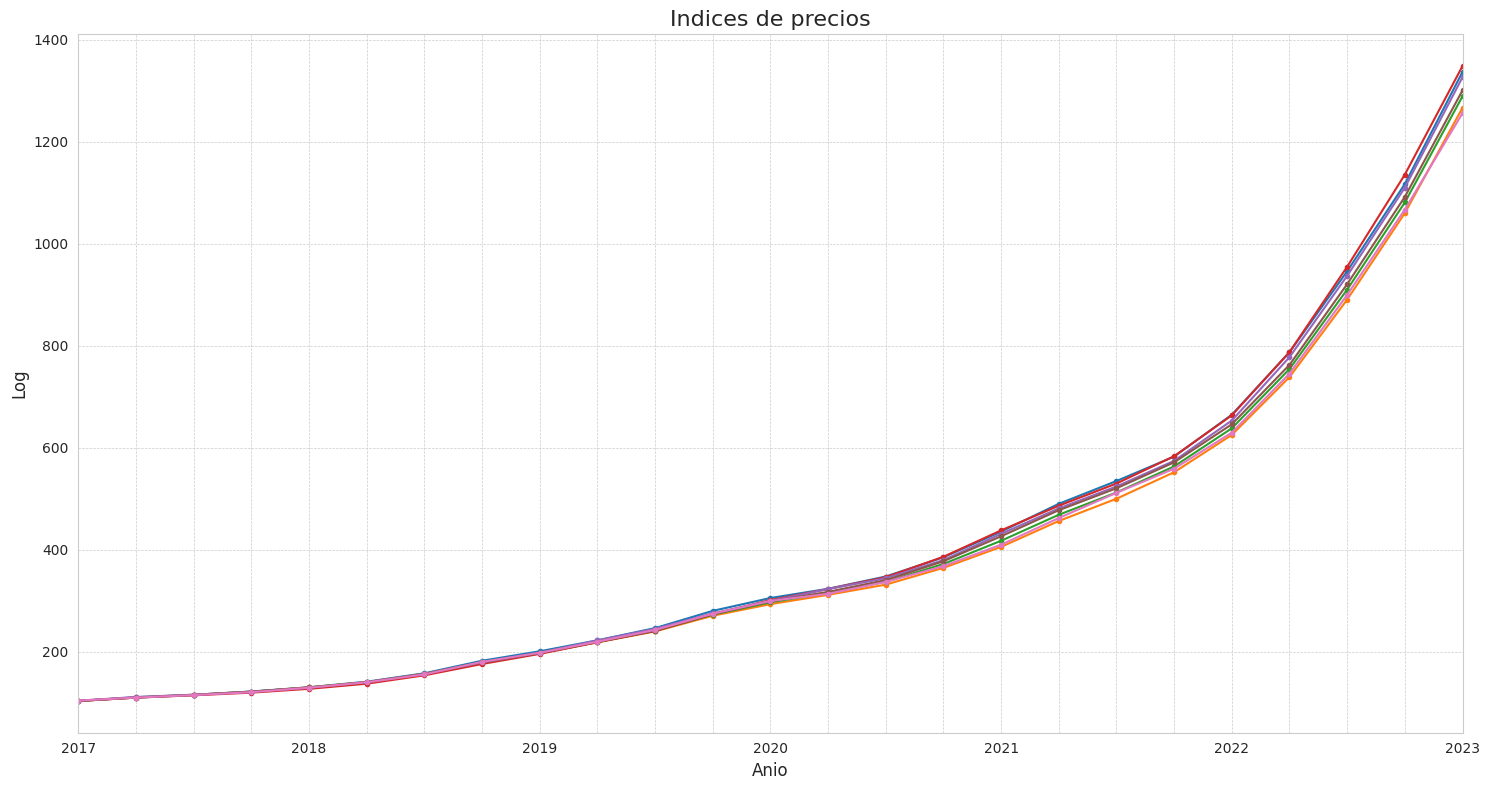

In [ ]:

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Step 3: Plot the data
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the data
# filtered_data.plot()
# tasas_interes.dropna(how = 'all').plot(ax=ax, linewidth=1, alpha = .8)
plot_data.tail(50).plot(ax = ax, marker = '.')

# Adding grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set the minimum y-axis limit to 0
# ax.set_ylim(bottom=0)

# Add titles and labels
ax.set_title('Indices de precios', fontsize=16)
ax.set_xlabel('Anio', fontsize=12)
ax.set_ylabel('Log', fontsize=12)

# Move the legend out of the plot
# ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)
# ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)

# No legend
ax.legend().set_visible(False)

plt.tight_layout()
plt.show()


In [ ]:
data_ = data.loc['2019':'2024']

subset = '145.1'
dataset = data_[[col for col in data_.columns if subset == col[0][:len(subset)]]].dropna(how = 'all')
# dataset.plot()

top_consultas = consultas.loc[consultas.serie_id.str.startswith(subset)].sort_values(by = 'consultas_180_dias', ascending = False)
display(top_consultas.head(10))

serie_id  consultas_total  consultas_30_dias  \
1784  145.1_IPC_NG_NACNAL_DICI_T_15              515                 87   
1788     145.1_PVOSOTIONC_DICI_T_16              433                 78   
1783  145.1_IPC_NG_GBAGBA_DICI_T_10              374                 67   
1782  145.1_IPC_NG_CUYUYO_DICI_T_11              365                 71   
1787  145.1_IPC_NG_PAMANA_DICI_T_15              365                 71   
1786  145.1_IPC_NG_NOANOA_DICI_T_10              359                 71   
1785  145.1_IPC_NG_NEANEA_DICI_T_10              412                 68   

      consultas_90_dias  consultas_180_dias  
1784                 17                 157  
1788                 19                 148  
1783                 11                 140  
1782                 16                 139  
1787                 12                 139  
1786                 11                 138  
1785                 13                 137

In [ ]:
data_subset = data[[col for col in data.columns if subset == col[0][:len(subset)]]]
aligned_data = align_time_series(data_subset, anchor_col=top_consultas.serie_id.values[0])

# plot_data = np.log10(aligned_data).dropna(how = 'all')
# plot_data = np.log10(data_subset).dropna(how = 'all')
plot_data = data_subset.dropna(how = 'all')

In [ ]:
# data_subset.dropna()

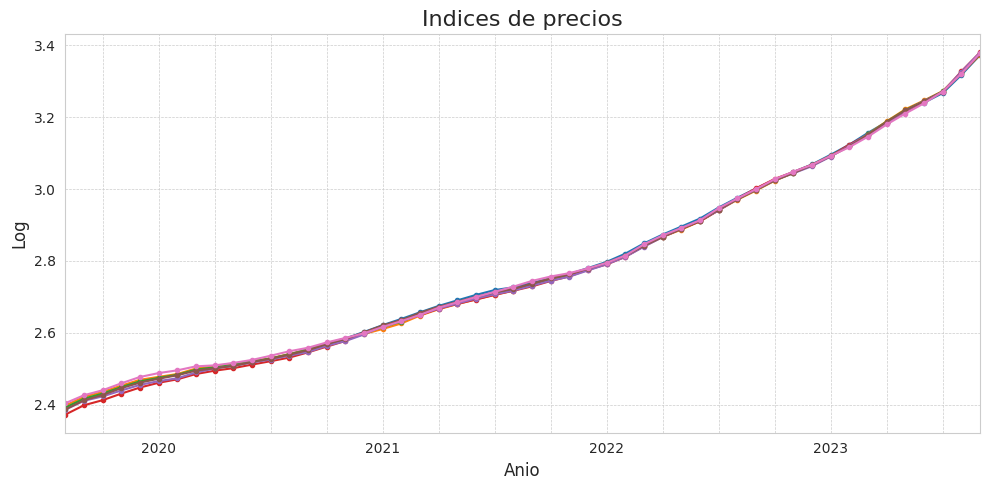

In [ ]:

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Step 3: Plot the data
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the data
# filtered_data.plot()
# tasas_interes.dropna(how = 'all').plot(ax=ax, linewidth=1, alpha = .8)
plot_data.tail(50).plot(ax = ax, marker = '.')

# Adding grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set the minimum y-axis limit to 0
# ax.set_ylim(bottom=0)

# Add titles and labels
ax.set_title('Indices de precios', fontsize=16)
ax.set_xlabel('Anio', fontsize=12)
ax.set_ylabel('Log', fontsize=12)

# Move the legend out of the plot
# ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)
# ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)

# No legend
ax.legend().set_visible(False)

plt.tight_layout()
plt.show()


## Índice de Precios Implícitos del Producto Interno Bruto (IPI - PIB). Base 2004	

In [ ]:
data_ = data.loc['2015':'2024']

subset = '112'
dataset = data_[[col for col in data_.columns if subset == col[0][:len(subset)]]].dropna(how = 'all')
# dataset.plot()

top_consultas = consultas.loc[consultas.serie_id.str.startswith(subset)].sort_values(by = 'consultas_180_dias', ascending = False)
display(top_consultas.head(10))

serie_id  consultas_total  consultas_30_dias  \
928  112.1_IAGCS_2004_A_43              184                 24   
932     112.1_IC_2004_A_16              205                 27   
944      112.1_IP_2004_A_9              195                 32   
934   112.1_IEMC_2004_A_30              162                 28   
945  112.1_ISEGA_2004_A_36              180                 30   
937    112.1_IHR_2004_A_24              183                 27   
939    112.1_IIM_2004_A_27              197                 25   
946   112.1_ISPB_2004_A_31              169                 25   
938    112.1_IIF_2004_A_29              156                 25   
931  112.1_ICMMR_2004_A_45              175                 25   

     consultas_90_dias  consultas_180_dias  
928                 26                  61  
932                 23                  61  
944                 26                  60  
934                 23                  56  
945                 22                  56  
937                 24                  56  
939                 21                  55  
946                 23                  55  
938                 23                  53  
931                 23                  53

In [ ]:
data_subset = data[[col for col in data.columns if subset == col[0][:len(subset)]]]
aligned_data = align_time_series(data_subset, anchor_col=top_consultas.serie_id.values[0])

plot_data = np.log10(aligned_data).dropna(how = 'all')

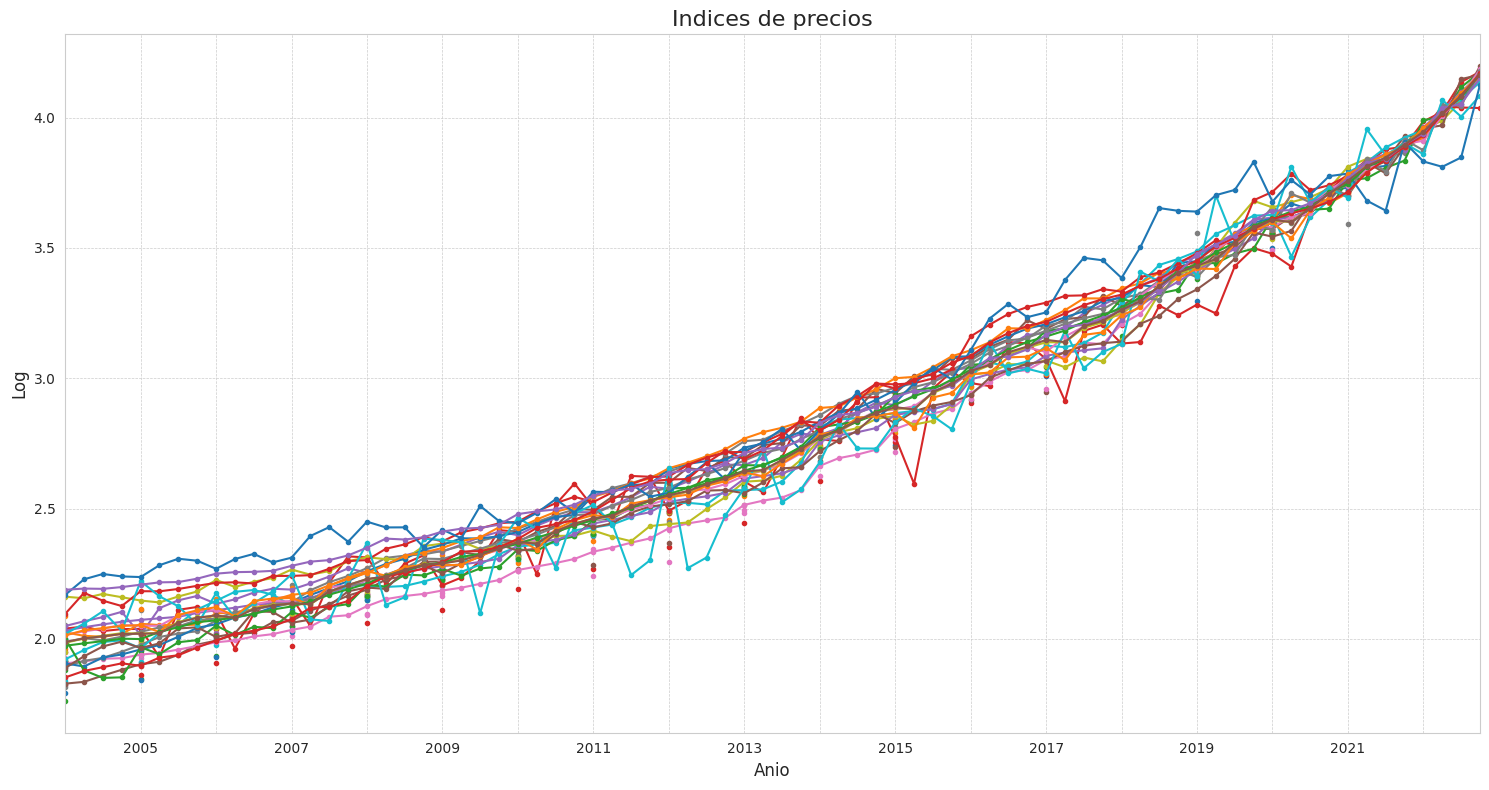

In [ ]:

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Step 3: Plot the data
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the data
# filtered_data.plot()
# tasas_interes.dropna(how = 'all').plot(ax=ax, linewidth=1, alpha = .8)
plot_data.plot(ax = ax, marker = '.')

# Adding grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set the minimum y-axis limit to 0
# ax.set_ylim(bottom=0)

# Add titles and labels
ax.set_title('Indices de precios', fontsize=16)
ax.set_xlabel('Anio', fontsize=12)
ax.set_ylabel('Log', fontsize=12)

# Move the legend out of the plot
# ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)
# ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)

# No legend
ax.legend().set_visible(False)

plt.tight_layout()
plt.show()


In [ ]:
analyze_time_series(data_subset.loc['2022'].dropna(how = 'all', axis = 1).dropna(how = 'all', axis = 0), time_period='M')


Average Percent Change  \
serie_id                indice_tiempo_frecuencia                           
112.2_IAGCS_2004_T_43   R/P3M                                     0.0539   
112.2_IAIEA_2004_T_52   R/P3M                                     0.0667   
112.2_IAPDSS_2004_T_51  R/P3M                                     0.0793   
112.2_ICMMR_2004_T_45   R/P3M                                     0.0629   
112.2_IC_2004_T_16      R/P3M                                     0.0615   
112.2_IDI_2004_T_24     R/P3M                                     0.0542   
112.2_IEMC_2004_T_30    R/P3M                                     0.0504   
112.2_IE_2004_T_14      R/P3M                                     0.0677   
112.2_IHPSD_2004_T_39   R/P3M                                     0.0679   
112.2_IHR_2004_T_24     R/P3M                                     0.0525   
112.2_IIF_2004_T_29     R/P3M                                     0.0250   
112.2_IIM_2004_T_27     R/P3M                                     0.0523   
112.2_IIPNS_2004_T_39   R/P3M                                     0.0634   
112.2_IIVA_2004_T_27    R/P3M                                     0.0782   
112.2_IOASCSP_2004_T_45 R/P3M                                     0.0944   
112.2_IPIBPM_2004_T_42  R/P3M                                     0.0619   
112.2_IP_2004_T_9       R/P3M                                     0.0759   
112.2_ISEGA_2004_T_36   R/P3M                                     0.1045   
112.2_ISPB_2004_T_31    R/P3M                                     0.0540   
112.2_ISPS_2004_T_34    R/P3M                                     0.0650   
112.2_ISSS_2004_T_28    R/P3M                                     0.0666   
112.2_ITAC_2004_T_44    R/P3M                                     0.0605   
112.2_IVABPB_2004_T_40  R/P3M                                     0.0610   

                                                   Slope  
serie_id                indice_tiempo_frecuencia          
112.2_IAGCS_2004_T_43   R/P3M                      0.158  
112.2_IAIEA_2004_T_52   R/P3M                     0.1782  
112.2_IAPDSS_2004_T_51  R/P3M                     0.1991  
112.2_ICMMR_2004_T_45   R/P3M                     0.1765  
112.2_IC_2004_T_16      R/P3M                     0.1735  
112.2_IDI_2004_T_24     R/P3M                     0.1517  
112.2_IEMC_2004_T_30    R/P3M                      0.139  
112.2_IE_2004_T_14      R/P3M                     0.1664  
112.2_IHPSD_2004_T_39   R/P3M                      0.182  
112.2_IHR_2004_T_24     R/P3M                     0.1537  
112.2_IIF_2004_T_29     R/P3M                     0.0588  
112.2_IIM_2004_T_27     R/P3M                      0.147  
112.2_IIPNS_2004_T_39   R/P3M                     0.1827  
112.2_IIVA_2004_T_27    R/P3M                     0.2064  
112.2_IOASCSP_2004_T_45 R/P3M                     0.2103  
112.2_IPIBPM_2004_T_42  R/P3M                     0.1714  
112.2_IP_2004_T_9       R/P3M                     0.1407  
112.2_ISEGA_2004_T_36   R/P3M                     0.2114  
112.2_ISPB_2004_T_31    R/P3M                     0.1527  
112.2_ISPS_2004_T_34    R/P3M                     0.1739  
112.2_ISSS_2004_T_28    R/P3M                     0.1805  
112.2_ITAC_2004_T_44    R/P3M                     0.1507  
112.2_IVABPB_2004_T_40  R/P3M                      0.167

## Indice de Precios al Consumidor

In [ ]:
data_ = data.loc['2019':'2024']

subset = '101'
dataset = data_[[col for col in data_.columns if subset == col[0][:len(subset)]]].dropna(how = 'all')
# dataset.plot()

display(consultas.loc[consultas.serie_id.str.startswith(subset)].sort_values(by = 'consultas_180_dias', ascending = False).head(10))

serie_id  consultas_total  consultas_30_dias  \
51         101.1_I2NG_2016_M_22           141191               1721   
54         101.1_I2TC_2016_M_19            22348                 69   
127  101.2_I2016_TRTE_2016_T_19             2235                 40   
50          101.1_I2I_2016_M_21             4511                 44   
46        101.1_I2BSV_2016_M_15              273                 42   
124  101.2_I2016_NRAL_2016_T_22            18071                 23   
128  101.2_I2016_VNDA_2016_T_17            17524                 19   
47        101.1_I2EDH_2016_M_31            21320                 34   
44         101.1_I2AB_2016_M_26              412                 30   
55          101.1_I2V_2016_M_17              425                 33   

     consultas_90_dias  consultas_180_dias  
51                 451                4681  
54                  18                2074  
127                 27                2058  
50                  15                  84  
46                   6                  62  
124                 30                  62  
128                 18                  57  
47                  12                  55  
44                  10                  53  
55                  13                  53

In [ ]:
subset = '101'
data_subset = data[[col for col in data.columns if subset == col[0][:len(subset)]]]
aligned_data = align_time_series(data_subset, anchor_col='101.1_I2NG_2016_M_22')

plot_data = np.log10(aligned_data).dropna(how = 'all')

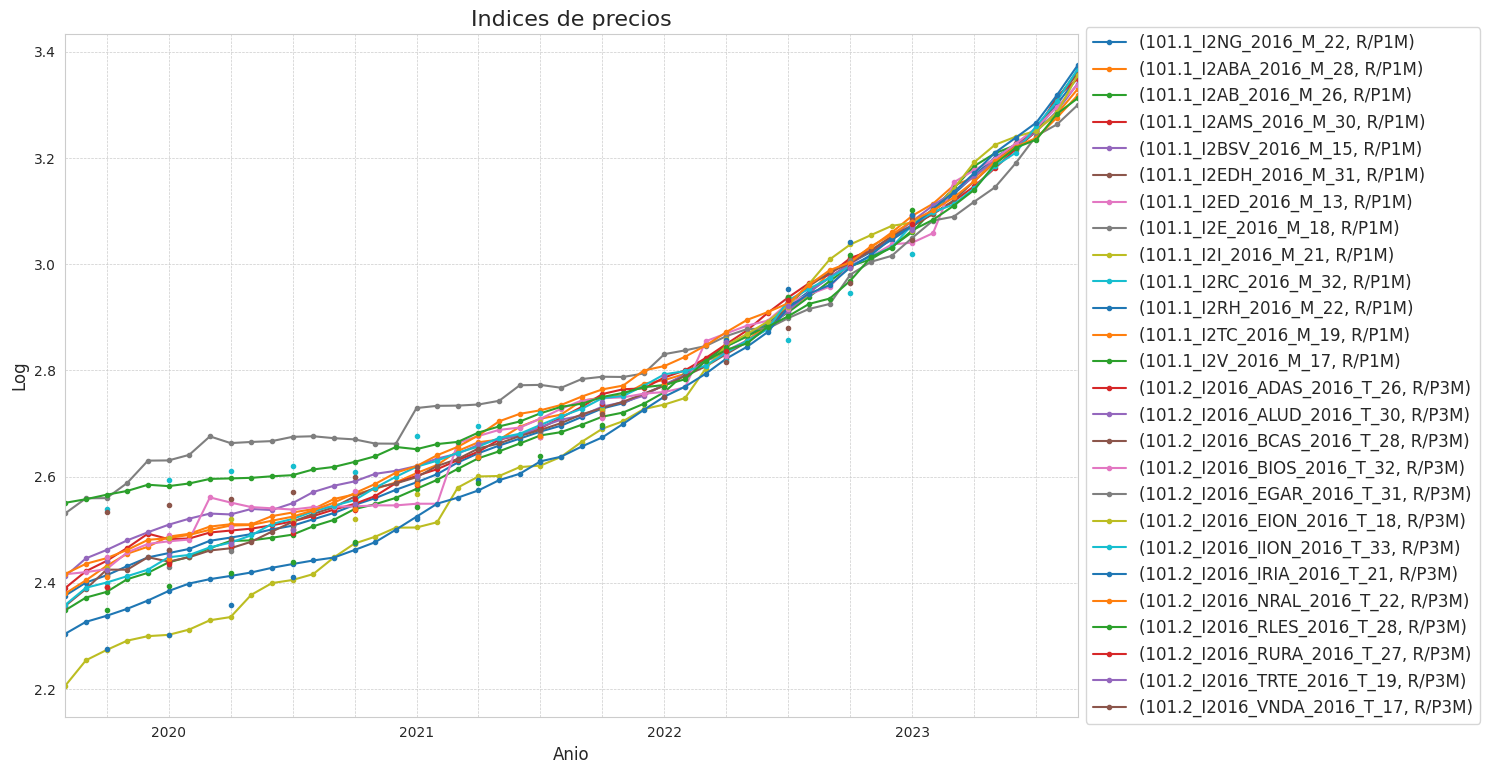

In [ ]:

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Step 3: Plot the data
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the data
# filtered_data.plot()
# tasas_interes.dropna(how = 'all').plot(ax=ax, linewidth=1, alpha = .8)
plot_data.tail(50).plot(ax = ax, marker = '.')

# Adding grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set the minimum y-axis limit to 0
# ax.set_ylim(bottom=0)

# Add titles and labels
ax.set_title('Indices de precios', fontsize=16)
ax.set_xlabel('Anio', fontsize=12)
ax.set_ylabel('Log', fontsize=12)

# Move the legend out of the plot
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
subset = '90.1_BM'
np.log10(data[[col for col in data.columns if subset == col[0][:len(subset)]]]).dropna(how = 'all').iloc[:, 2:].tail(50).plot(marker = '.')

(39, 7)

In [ ]:
analyze_time_series(data_subset.loc['2023'].dropna(how = 'all', axis = 1).dropna(how = 'all', axis = 0), time_period='M')


Average Percent Change  \
serie_id                   indice_tiempo_frecuencia                           
101.1_I2ABA_2016_M_28      R/P1M                                     0.0713   
101.1_I2AB_2016_M_26       R/P1M                                     0.0920   
101.1_I2AMS_2016_M_30      R/P1M                                     0.0835   
101.1_I2BSV_2016_M_15      R/P1M                                     0.0776   
101.1_I2EDH_2016_M_31      R/P1M                                     0.0862   
101.1_I2ED_2016_M_13       R/P1M                                     0.0911   
101.1_I2E_2016_M_18        R/P1M                                     0.0751   
101.1_I2I_2016_M_21        R/P1M                                     0.0842   
101.1_I2NG_2016_M_22       R/P1M                                     0.0844   
101.1_I2RC_2016_M_32       R/P1M                                     0.0884   
101.1_I2RH_2016_M_22       R/P1M                                     0.0914   
101.1_I2TC_2016_M_19       R/P1M                                     0.0705   
101.1_I2V_2016_M_17        R/P1M                                     0.0745   
101.2_I2016_ADAS_2016_T_26 R/P3M                                     0.0000   
101.2_I2016_ALUD_2016_T_30 R/P3M                                     0.0000   
101.2_I2016_BCAS_2016_T_28 R/P3M                                     0.0000   
101.2_I2016_BIOS_2016_T_32 R/P3M                                     0.0000   
101.2_I2016_EGAR_2016_T_31 R/P3M                                     0.0000   
101.2_I2016_EION_2016_T_18 R/P3M                                     0.0000   
101.2_I2016_IION_2016_T_33 R/P3M                                     0.0000   
101.2_I2016_IRIA_2016_T_21 R/P3M                                     0.0000   
101.2_I2016_NRAL_2016_T_22 R/P3M                                     0.0000   
101.2_I2016_RLES_2016_T_28 R/P3M                                     0.0000   
101.2_I2016_RURA_2016_T_27 R/P3M                                     0.0000   
101.2_I2016_TRTE_2016_T_19 R/P3M                                     0.0000   
101.2_I2016_VNDA_2016_T_17 R/P3M                                     0.0000   

                                                      Slope  
serie_id                   indice_tiempo_frecuencia          
101.1_I2ABA_2016_M_28      R/P1M                      0.066  
101.1_I2AB_2016_M_26       R/P1M                     0.0802  
101.1_I2AMS_2016_M_30      R/P1M                     0.0808  
101.1_I2BSV_2016_M_15      R/P1M                      0.071  
101.1_I2EDH_2016_M_31      R/P1M                     0.0816  
101.1_I2ED_2016_M_13       R/P1M                     0.0829  
101.1_I2E_2016_M_18        R/P1M                     0.0736  
101.1_I2I_2016_M_21        R/P1M                     0.0744  
101.1_I2NG_2016_M_22       R/P1M                     0.0778  
101.1_I2RC_2016_M_32       R/P1M                     0.0829  
101.1_I2RH_2016_M_22       R/P1M                     0.0837  
101.1_I2TC_2016_M_19       R/P1M                     0.0674  
101.1_I2V_2016_M_17        R/P1M                     0.0737  
101.2_I2016_ADAS_2016_T_26 R/P3M                        0.0  
101.2_I2016_ALUD_2016_T_30 R/P3M                        0.0  
101.2_I2016_BCAS_2016_T_28 R/P3M                        0.0  
101.2_I2016_BIOS_2016_T_32 R/P3M                        0.0  
101.2_I2016_EGAR_2016_T_31 R/P3M                        0.0  
101.2_I2016_EION_2016_T_18 R/P3M                        0.0  
101.2_I2016_IION_2016_T_33 R/P3M                        0.0  
101.2_I2016_IRIA_2016_T_21 R/P3M                        0.0  
101.2_I2016_NRAL_2016_T_22 R/P3M                        0.0  
101.2_I2016_RLES_2016_T_28 R/P3M                        0.0  
101.2_I2016_RURA_2016_T_27 R/P3M                        0.0  
101.2_I2016_TRTE_2016_T_19 R/P3M                        0.0  
101.2_I2016_VNDA_2016_T_17 R/P3M                        0.0

In [ ]:
analyze_time_series(data_subset.loc['2023-06':].dropna(how = 'all', axis = 1).dropna(how = 'all', axis = 0), time_period='M')


Average Percent Change   Slope
serie_id              indice_tiempo_frecuencia                                
101.1_I2ABA_2016_M_28 R/P1M                                     0.0914  0.0857
101.1_I2AB_2016_M_26  R/P1M                                     0.1143  0.1109
101.1_I2AMS_2016_M_30 R/P1M                                     0.1078  0.1065
101.1_I2BSV_2016_M_15 R/P1M                                     0.0945  0.0898
101.1_I2EDH_2016_M_31 R/P1M                                     0.1072  0.1045
101.1_I2ED_2016_M_13  R/P1M                                     0.0894   0.086
101.1_I2E_2016_M_18   R/P1M                                     0.0882  0.0805
101.1_I2I_2016_M_21   R/P1M                                     0.0948   0.088
101.1_I2NG_2016_M_22  R/P1M                                     0.1021  0.0987
101.1_I2RC_2016_M_32  R/P1M                                     0.1285  0.1196
101.1_I2RH_2016_M_22  R/P1M                                     0.1108  0.1061
101.1_I2TC_2016_M_19  R/P1M                                     0.0775  0.0757
101.1_I2V_2016_M_17   R/P1M                                     0.0747  0.0755

## Agregados Monetarios


Estas series son fundamentales para entender la liquidez en el sistema financiero, la política monetaria del banco central y la salud económica en general.

### Agregados Monetarios
1. **M3* (90.1_AMTMA_0_0_43)**: Es una medida amplia de la oferta monetaria, incluyendo M3 más otros elementos.
2. **M3 (90.1_AMTM3_0_0_31)**: Incluye M2 más depósitos a plazo y otros depósitos a largo plazo.
3. **M2 (90.1_AMTM2_0_0_31)**: Incluye dinero en circulación, depósitos a la vista y otros depósitos líquidos.
4. **M2 Privado (90.1_AMTMA_0_0_39)**: M2 pero solo contando el sector privado.


<Axes: xlabel='indice_tiempo'>

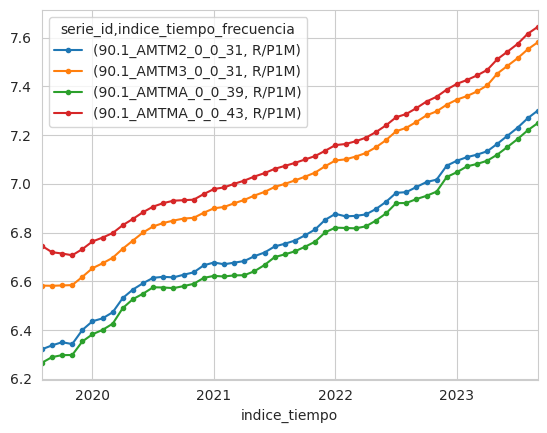

In [ ]:

data_subset = data[[col for col in data.columns if '90.1_AMTM' == col[0][:len('90.1_AMTM')]]]
np.log10(data_subset).dropna(how = 'all').tail(100).plot(marker = '.')

In [ ]:
analyze_time_series(data_subset.loc['2023':].dropna(how = 'all', axis = 1).dropna(how = 'all', axis = 0), time_period='M')


Average Percent Change   Slope
serie_id          indice_tiempo_frecuencia                                
90.1_AMTM2_0_0_31 R/P1M                                     0.0614  0.0609
90.1_AMTM3_0_0_31 R/P1M                                     0.0704  0.0718
90.1_AMTMA_0_0_39 R/P1M                                     0.0600   0.058
90.1_AMTMA_0_0_43 R/P1M                                     0.0700  0.0706

In [ ]:
analyze_time_series(data_subset.loc['2023-06':].dropna(how = 'all', axis = 1).dropna(how = 'all', axis = 0), time_period='M')


Average Percent Change   Slope
serie_id          indice_tiempo_frecuencia                                
90.1_AMTM2_0_0_31 R/P1M                                     0.0827  0.0805
90.1_AMTM3_0_0_31 R/P1M                                     0.0772  0.0753
90.1_AMTMA_0_0_39 R/P1M                                     0.0782  0.0761
90.1_AMTMA_0_0_43 R/P1M                                     0.0816  0.0801


### Depósitos Totales en Pesos
5. **Sector Público (90.1_DTPPUB_0_0_31)**: Depósitos totales del sector público en pesos.
6. **Sector Privado (90.1_DTPPRI_0_0_31)**: Depósitos totales del sector privado en pesos.
7. **Total (90.1_DTPT_0_0_29)**: Depósitos totales en pesos, incluyendo sector público y privado.


<Axes: xlabel='indice_tiempo'>

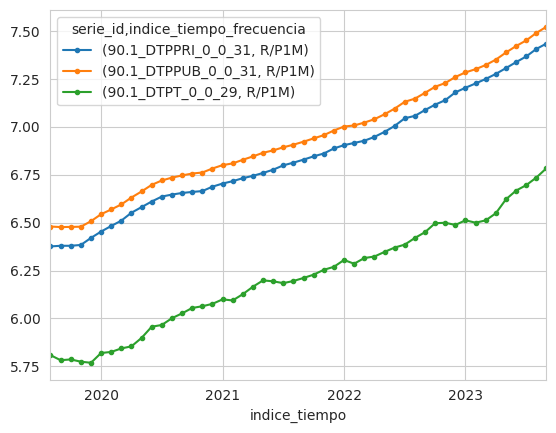

In [ ]:
np.log10(data[[col for col in data.columns if '90.1_DTP' == col[0][:len('90.1_DTP')]]]).dropna(how = 'all').tail(50).plot(marker = '.')

In [ ]:
data_subset = data[[col for col in data.columns if '90.1_DTP' == col[0][:len('90.1_DTP')]]]

display(analyze_time_series(data_subset.loc['2023':].dropna(how = 'all', axis = 1).dropna(how = 'all', axis = 0), time_period='M'))
display(analyze_time_series(data_subset.loc['2023-06':].dropna(how = 'all', axis = 1).dropna(how = 'all', axis = 0), time_period='M'))


Average Percent Change   Slope
serie_id           indice_tiempo_frecuencia                                
90.1_DTPPRI_0_0_31 R/P1M                                     0.0688  0.0676
90.1_DTPPUB_0_0_31 R/P1M                                     0.0711   0.071
90.1_DTPT_0_0_29   R/P1M                                     0.0831  0.0876

Average Percent Change   Slope
serie_id           indice_tiempo_frecuencia                                
90.1_DTPPRI_0_0_31 R/P1M                                     0.0774  0.0761
90.1_DTPPUB_0_0_31 R/P1M                                     0.0804  0.0786
90.1_DTPT_0_0_29   R/P1M                                     0.0942    0.09


### Base Monetaria

### Base Monetaria
8. **Total (90.1_BMT_0_0_20)**: Dinero emitido por el Banco Central, incluyendo efectivo en circulación y reservas.
9. **Circulación Monetaria Total (90.1_BMCMT_0_0_42)**: Dinero en circulación, tanto en poder del público como de entidades financieras.
10. **Circulación Monetaria Público (90.1_BMCMP_0_0_44)**: Dinero en efectivo en manos de las personas y empresas.


<Axes: xlabel='indice_tiempo'>

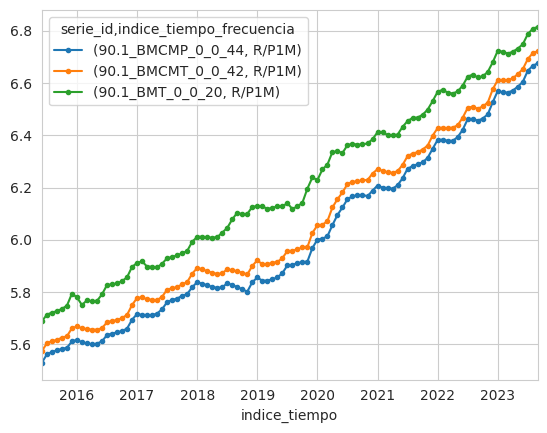

In [ ]:
subset = '90.1_BM'
np.log10(data[[col for col in data.columns if subset == col[0][:len(subset)]]]).dropna(how = 'all').iloc[:, 2:].tail(100).plot(marker = '.')

In [ ]:
data_subset = data[[col for col in data.columns if '90.1_BM' == col[0][:len('90.1_BM')]]]

display(analyze_time_series(data_subset.loc['2020':].dropna(how = 'all', axis = 1).dropna(how = 'all', axis = 0), time_period='M'))


Average Percent Change   Slope
serie_id           indice_tiempo_frecuencia                                
90.1_BMCCB_0_0_36  R/P1M                                     0.0216  0.0157
90.1_BMCMEF_0_0_52 R/P1M                                     0.0346  0.0254
90.1_BMCMP_0_0_44  R/P1M                                     0.0366  0.0331
90.1_BMCMT_0_0_42  R/P1M                                     0.0361  0.0322
90.1_BMT_0_0_20    R/P1M                                     0.0319  0.0277

In [ ]:
am = data[[col for col in data.columns if '90.1_AMTM' == col[0][:len('90.1_AMTM')]]].dropna(how = 'all')
depos = data[[col for col in data.columns if '90.1_DTP' == col[0][:len('90.1_DTP')]]].dropna(how = 'all')

subset = '90.1_BM'
bm = data[[col for col in data.columns if subset == col[0][:len(subset)]]].dropna(how = 'all').iloc[:, 2:]

In [ ]:
am.div(bm['90.1_BMT_0_0_20']).tail()

serie_id                 90.1_AMTM2_0_0_31 90.1_AMTM3_0_0_31  \
indice_tiempo_frecuencia             R/P1M             R/P1M   
indice_tiempo                                                  
2023-05-01                          2.7076            5.2571   
2023-06-01                          2.8104            5.4415   
2023-07-01                          2.7720            5.3462   
2023-08-01                          2.8938            5.5487   
2023-09-01                          3.0592            5.8341   

serie_id                 90.1_AMTMA_0_0_39 90.1_AMTMA_0_0_43  
indice_tiempo_frecuencia             R/P1M             R/P1M  
indice_tiempo                                                 
2023-05-01                          2.4439            6.0219  
2023-06-01                          2.5283            6.2214  
2023-07-01                          2.4900            6.1205  
2023-08-01                          2.5817            6.4277  
2023-09-01                          2.7184            6.7507

In [ ]:
depos.div(bm['90.1_BMT_0_0_20']).tail()

serie_id                 90.1_DTPPRI_0_0_31 90.1_DTPPUB_0_0_31  \
indice_tiempo_frecuencia              R/P1M              R/P1M   
indice_tiempo                                                    
2023-05-01                           3.7654             4.5425   
2023-06-01                           3.8933             4.7237   
2023-07-01                           3.8113             4.6218   
2023-08-01                           3.9797             4.8270   
2023-09-01                           4.1762             5.1088   

serie_id                 90.1_DTPT_0_0_29  
indice_tiempo_frecuencia            R/P1M  
indice_tiempo                              
2023-05-01                         0.7771  
2023-06-01                         0.8304  
2023-07-01                         0.8105  
2023-08-01                         0.8474  
2023-09-01                         0.9325

In [ ]:
depos.div(bm['90.1_BMT_0_0_20'])


### Depósitos Específicos
11-13. **Cuenta Corriente (90.1_DCCPUB_0_0_34, 90.1_DCCPRI_0_0_34)**: Depósitos a la vista en cuentas corrientes, diferenciados por sector público y privado.
14-15. **Caja de Ahorro (90.1_DCAPRI_0_0_29, 90.1_DCAPUB_0_0_29)**: Depósitos en cuentas de ahorro, diferenciados por sector público y privado.
16-18. **Plazos Fijos No Ajustables (90.1_DPNACUPUB_0_0_41, 90.1_DPNACUPRIV_0_0_41)**: Depósitos a plazo fijo que no se ajustan por CER/UVA, diferenciados por sector público y privado.


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


<Axes: xlabel='indice_tiempo'>

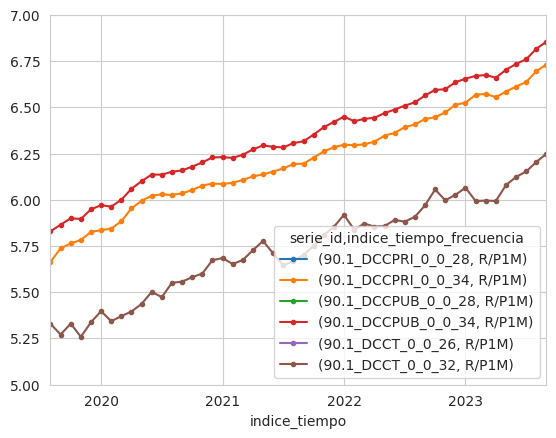

In [ ]:
subset = '90.1_DCC'
np.log10(data[[col for col in data.columns if subset == col[0][:len(subset)]]]).dropna(how = 'all').tail(50).plot(marker = '.', ylim = (5, 7))

In [ ]:
data_subset = data[[col for col in data.columns if '90.1_DCC' == col[0][:len('90.1_DCC')]]]

display(analyze_time_series(data_subset.loc['2023-04':].dropna(how = 'all', axis = 1).dropna(how = 'all', axis = 0), time_period='M'))


Average Percent Change   Slope
serie_id           indice_tiempo_frecuencia                                
90.1_DCCPRI_0_0_28 R/P1M                                        NaN     0.0
90.1_DCCPRI_0_0_34 R/P1M                                     0.0852  0.0815
90.1_DCCPUB_0_0_28 R/P1M                                        inf   0.312
90.1_DCCPUB_0_0_34 R/P1M                                     0.0943  0.0884
90.1_DCCT_0_0_26   R/P1M                                        NaN     0.0
90.1_DCCT_0_0_32   R/P1M                                     0.1261  0.1108

In [ ]:
data_subset = data[[col for col in data.columns if '90.1_DCC' == col[0][:len('90.1_DCC')]]]

display(analyze_time_series(data_subset.loc['2022-08':].dropna(how = 'all', axis = 1).dropna(how = 'all', axis = 0), time_period='M'))


Average Percent Change   Slope
serie_id           indice_tiempo_frecuencia                                
90.1_DCCPRI_0_0_28 R/P1M                                        NaN     0.0
90.1_DCCPRI_0_0_34 R/P1M                                     0.0601  0.0517
90.1_DCCPUB_0_0_28 R/P1M                                        inf  0.0799
90.1_DCCPUB_0_0_34 R/P1M                                     0.0609  0.0499
90.1_DCCT_0_0_26   R/P1M                                        NaN     0.0
90.1_DCCT_0_0_32   R/P1M                                     0.0684  0.0447

### Plazos Fijos Desagregados
19-25. **Detalle Desagregado de Plazo Fijo (90.1_DET_DESAGRTAL_0_0_38, 90.1_DET_DESAGRTAS_0_0_58, 90.1_DET_DESAGRTAS_VI_O_0_0_53, etc.)**: Desglose detallado de los plazos fijos, incluyendo total, mayoristas, minoristas, y diferenciados por duración.


In [ ]:
# subset = '90.1_DET_DESAGRTA'
# np.log10(data[[col for col in data.columns if subset == col[0][:len(subset)]]]).dropna(how = 'all').tail(50).plot(marker = '.')



### Relaciones
- **Base Monetaria** es parte de **M1**, que a su vez es parte de **M2**.
- **M2** incluye **M1** más depósitos a plazo y otros depósitos líquidos.
- **M3** añade a **M2** depósitos a plazo más grandes y otros depósitos a largo plazo.
- **M3*** es una versión aún más amplia de **M3**.
- **Depósitos Totales en Pesos** incluyen todas las formas de depósitos en el sistema financiero.
- **Depósitos Específicos** y **Plazos Fijos Desagregados** proporcionan un desglose más detallado de los tipos de depósitos.



In [ ]:
dataset_no = '90.'

data_ = data.loc['2000':'2024']

dataset = data_[[col for col in data_.columns if dataset_no == col[0][:len(dataset_no)]]].dropna(how = 'all')

In [ ]:
pd.options.display.max_rows = 120

In [ ]:
series_info.loc[series_info.dataset_id == 90][['serie_id', 'serie_descripcion']].drop_duplicates()

serie_id  \
3168898                 90.1_BMT_0_0_20   
3169147               90.1_BMCMT_0_0_42   
3169396               90.1_BMCMP_0_0_44   
3169645              90.1_BMCMEF_0_0_52   
3169894               90.1_BMCCB_0_0_36   
3170143                90.1_DCCT_0_0_32   
3170392              90.1_DCCPRI_0_0_34   
3170641              90.1_DCCPUB_0_0_34   
3170890                90.1_DCAT_0_0_27   
3171139              90.1_DCAPUB_0_0_29   
3171388              90.1_DCAPRI_0_0_29   
3171637             90.1_DPNACUT_0_0_39   
3171886          90.1_DPNACUPRIV_0_0_41   
3172135           90.1_DPNACUPUB_0_0_41   
3172384              90.1_DPACUT_0_0_36   
3172633            90.1_DPACUPUB_0_0_38   
3172882            90.1_DPACUPRI_0_0_38   
3173131                90.1_DODT_0_0_31   
3173380              90.1_DODPRI_0_0_33   
3173629              90.1_DODPUB_0_0_33   
3173878                90.1_DCCT_0_0_26   
3174127              90.1_DCCPRI_0_0_28   
3174376              90.1_DCCPUB_0_0_28   
3174625                90.1_DTPT_0_0_29   
3174874              90.1_DTPPRI_0_0_31   
3175123              90.1_DTPPUB_0_0_31   
3175372                90.1_DTDT_0_0_31   
3175621              90.1_DTDPRI_0_0_33   
3175870              90.1_DTDPUB_0_0_33   
3176119               90.1_AMTM2_0_0_31   
3176368               90.1_AMTM3_0_0_31   
3176617               90.1_AMTMA_0_0_43   
3176866               90.1_AMTMA_0_0_39   
3177115       90.1_DET_DESAGRICO_0_0_37   
3177364        90.1_DET_DESAGRIV_0_0_35   
3177613       90.1_DET_DESAGRTAL_0_0_31   
3177862       90.1_DET_DESAGRICO_0_0_40   
3178111        90.1_DET_DESAGRIV_0_0_38   
3178360       90.1_DET_DESAGRTAL_0_0_34   
3178609    90.1_DET_DESAGRICO_II_0_0_39   
3178858        90.1_DET_DESAGRIV_0_0_37   
3179107       90.1_DET_DESAGRTAL_0_0_33   
3179356       90.1_DET_DESAGRICO_0_0_39   
3179605      90.1_DET_DESAGRIV_V_0_0_37   
3179854     90.1_DET_DESAGRTAL_V_0_0_33   
3180103       90.1_DET_DESAGRTAL_0_0_44   
3180352       90.1_DET_DESAGRTAS_0_0_49   
3180601    90.1_DET_DESAGRTAS_II_0_0_49   
3180850       90.1_DET_DESAGRIAS_0_0_52   
3181099       90.1_DET_DESAGRIAS_0_0_49   
3181348       90.1_DET_DESAGRIAS_0_0_50   
3181597       90.1_DET_DESAGRIAS_0_0_51   
3181846       90.1_DET_DESAGRMAS_0_0_46   
3182095       90.1_DET_DESAGRTAL_0_0_42   
3182344       90.1_DET_DESAGRTAS_0_0_52   
3182593   90.1_DET_DESAGRTAS_III_0_0_47   
3182842     90.1_DET_DESAGRIAS_X_0_0_50   
3183091   90.1_DET_DESAGRIAS_III_0_0_47   
3183340       90.1_DET_DESAGRIAS_0_0_53   
3183589       90.1_DET_DESAGRIAS_0_0_54   
3183838       90.1_DET_DESAGRMAS_0_0_49   
3184087       90.1_DET_DESAGRTAL_0_0_38   
3184336       90.1_DET_DESAGRTAS_0_0_58   
3184585  90.1_DET_DESAGRTAS_VI_O_0_0_53   
3184834       90.1_DET_DESAGRIAS_0_0_61   
3185083       90.1_DET_DESAGRIAS_0_0_58   
3185332       90.1_DET_DESAGRIAS_0_0_59   
3185581       90.1_DET_DESAGRIAS_0_0_60   
3185830       90.1_DET_DESAGRMAS_0_0_55   

                                                                                                                                        serie_descripcion  
3168898                                                                                    Base monetaria total. Promedios mensuales en millones de pesos  
3169147                                                             Base monetaria. Circulación monetaria total. Promedios mensuales en millones de pesos  
3169396                                              Base monetaria. Circulación monetaria en poder del público. Promedios mensuales en millones de pesos  
3169645                                 Base monetaria. Circulación monetaria en poder de entidades financieras. Promedios mensuales en millones de pesos  
3169894                                                               Base monetaria. Cuenta corriente del BCRA. Promedios mensuales en millones de pesos  
3170143                                                                         Depó

In [ ]:
data.head().columns.get_level_values('indice_tiempo_frecuencia').value_counts()

indice_tiempo_frecuencia
R/P1Y    6576
R/P1M    5325
R/P3M    5030
R/P1D     423
R/P6M     392
Name: count, dtype: int64

In [ ]:
totales_bm = dataset.resample('Y').mean().sum().reset_index().rename(columns = {0: 'Total'})
totales_bm

serie_id indice_tiempo_frecuencia         Total
0                90.1_AMTM2_0_0_31                    R/P1M  4.329225e+07
1                90.1_AMTM3_0_0_31                    R/P1M  7.688594e+07
2                90.1_AMTMA_0_0_39                    R/P1M  3.849510e+07
3                90.1_AMTMA_0_0_43                    R/P1M  9.045481e+07
4                90.1_BMCCB_0_0_36                    R/P1M  5.402042e+06
5               90.1_BMCMEF_0_0_52                    R/P1M  1.694790e+06
6                90.1_BMCMP_0_0_44                    R/P1M  1.385691e+07
7                90.1_BMCMT_0_0_42                    R/P1M  1.555170e+07
8                  90.1_BMT_0_0_20                    R/P1M  2.095884e+07
9               90.1_DCAPRI_0_0_29                    R/P1M  1.416128e+07
10              90.1_DCAPUB_0_0_29                    R/P1M  1.349729e+07
11                90.1_DCAT_0_0_27                    R/P1M  6.639954e+05
12              90.1_DCCPRI_0_0_28                    R/P1M  1.403432e+04
13              90.1_DCCPRI_0_0_34                    R/P1M  1.114107e+07
14              90.1_DCCPUB_0_0_28                    R/P1M  1.410545e+04
15              90.1_DCCPUB_0_0_34                    R/P1M  1.526906e+07
16                90.1_DCCT_0_0_26                    R/P1M  7.046553e+01
17                90.1_DCCT_0_0_32                    R/P1M  4.127990e+06
18       90.1_DET_DESAGRIAS_0_0_49                    R/P1M  1.694787e+06
19       90.1_DET_DESAGRIAS_0_0_50                    R/P1M  1.737918e+06
20       90.1_DET_DESAGRIAS_0_0_51                    R/P1M  6.100393e+05
21       90.1_DET_DESAGRIAS_0_0_52                    R/P1M  1.965080e+07
22       90.1_DET_DESAGRIAS_0_0_53                    R/P1M  1.713970e+04
23       90.1_DET_DESAGRIAS_0_0_54                    R/P1M  1.179663e+04
24       90.1_DET_DESAGRIAS_0_0_58                    R/P1M  1.984525e+06
25       90.1_DET_DESAGRIAS_0_0_59                    R/P1M  2.193693e+06
26       90.1_DET_DESAGRIAS_0_0_60                    R/P1M  9.620677e+05
27       90.1_DET_DESAGRIAS_0_0_61                    R/P1M  2.127393e+07
28   90.1_DET_DESAGRIAS_III_0_0_47                    R/P1M  1.199695e+04
29     90.1_DET_DESAGRIAS_X_0_0_50                    R/P1M  4.417542e+04
30       90.1_DET_DESAGRICO_0_0_37                    R/P1M  3.947733e+01
31       90.1_DET_DESAGRICO_0_0_39                    R/P1M  8.457953e+03
32       90.1_DET_DESAGRICO_0_0_40                    R/P1M  2.699103e+04
33    90.1_DET_DESAGRICO_II_0_0_39                    R/P1M  1.007778e+04
34        90.1_DET_DESAGRIV_0_0_35                    R/P1M  1.152903e+02
35        90.1_DET_DESAGRIV_0_0_37                    R/P1M  8.638112e+04
36        90.1_DET_DESAGRIV_0_0_38                    R/P1M  1.482136e+05
37      90.1_DET_DESAGRIV_V_0_0_37                    R/P1M  1.129889e+04
38       90.1_DET_DESAGRMAS_0_0_46                    R/P1M  7.575330e+04
39       90.1_DET_DESAGRMAS_0_0_49                    R/P1M  1.741929e+03
40       90.1_DET_DESAGRMAS_0_0_55                    R/P1M  1.200932e+05
41       90.1_DET_DESAGRTAL_0_0_31                    R/P1M  1.566862e+02
42       90.1_DET_DESAGRTAL_0_0_33                    R/P1M  9.745551e+04
43       90.1_DET_DESAGRTAL_0_0_34                    R/P1M  1.758669e+05
44       90.1_DET_DESAGRTAL_0_0_38                    R/P1M  2.652334e+07
45       90.1_DET_DESAGRTAL_0_0_42                    R/P1M  8.684363e+04
46       90.1_DET_DESAGRTAL_0_0_44                    R/P1M  2.375844e+07
47     90.1_DET_DESAGRTAL_V_0_0_33                    R/P1M  2.006366e+04
48       90.1_DET_DESAGRTAS_0_0_49                    R/P1M  1.758879e+07
49       90.1_DET_DESAGRTAS_0_0_52                    R/P1M  1.876788e+04
50       90.1_DET_DESAGRTAS_0_0_58                    R/P1M  1.830451e+07
51   90.1_DET_DESAGRTAS_III_0_0_47                    R/P1M  6.807576e+04
52    90.1_DET_DESAGRTAS_II_0_0_49                    R/P1M  6.169651e+06
53  90.1_DET_DESAGRTAS_VI_O_0_

In [ ]:
# x = totales_bm['Total'].sort_values(ascending = False).reset_index(drop = True)
# (x/x.sum()).cumsum()
# Con los 20 primeros esta el 90% de la BM

In [ ]:
serie.loc[serie.serie_unidades == 'Millones de pesos'].merge(totales_bm).dropna(subset = ['Total']).sort_values('Total', ascending = False).head(20)

serie_id                      serie_id.1  \
3                90.1_AMTMA_0_0_43               90.1_AMTMA_0_0_43   
1                90.1_AMTM3_0_0_31               90.1_AMTM3_0_0_31   
36              90.1_DTPPUB_0_0_31              90.1_DTPPUB_0_0_31   
35              90.1_DTPPRI_0_0_31              90.1_DTPPRI_0_0_31   
0                90.1_AMTM2_0_0_31               90.1_AMTM2_0_0_31   
2                90.1_AMTMA_0_0_39               90.1_AMTMA_0_0_39   
33           90.1_DPNACUPUB_0_0_41           90.1_DPNACUPUB_0_0_41   
23       90.1_DET_DESAGRTAL_0_0_38       90.1_DET_DESAGRTAL_0_0_38   
32          90.1_DPNACUPRIV_0_0_41          90.1_DPNACUPRIV_0_0_41   
21       90.1_DET_DESAGRIAS_0_0_61       90.1_DET_DESAGRIAS_0_0_61   
8                  90.1_BMT_0_0_20                 90.1_BMT_0_0_20   
24       90.1_DET_DESAGRTAS_0_0_58       90.1_DET_DESAGRTAS_0_0_58   
7                90.1_BMCMT_0_0_42               90.1_BMCMT_0_0_42   
15              90.1_DCCPUB_0_0_34              90.1_DCCPUB_0_0_34   
9               90.1_DCAPRI_0_0_29              90.1_DCAPRI_0_0_29   
6                90.1_BMCMP_0_0_44               90.1_BMCMP_0_0_44   
10              90.1_DCAPUB_0_0_29              90.1_DCAPUB_0_0_29   
37                90.1_DTPT_0_0_29                90.1_DTPT_0_0_29   
13              90.1_DCCPRI_0_0_34              90.1_DCCPRI_0_0_34   
25  90.1_DET_DESAGRTAS_VI_O_0_0_53  90.1_DET_DESAGRTAS_VI_O_0_0_53   

                                                serie_titulo  \
3                agregados_monetarios_totales_m3_alternativa   
1                            agregados_monetarios_totales_m3   
36                           depositos_totales_pesos_publico   
35                           depositos_totales_pesos_privado   
0                            agregados_monetarios_totales_m2   
2                    agregados_monetarios_totales_m2_privado   
33                 depositos_pf_no_ajustable_cer_uva_publico   
23                    det_desagreg_plazo_fijo_sec_priv_total   
32                 depositos_pf_no_ajustable_cer_uva_privado   
21  det_desagreg_plazo_fijo_sec_priv_pesos_usd_hasta_59_dias   
8                                       base_monetaria_total   
24     det_desagreg_plazo_fijo_sec_priv_pesos_usd_mayoristas   
7                 base_monetaria_circulacion_monetaria_total   
15                        depositos_cuenta_corriente_publico   
9                              depositos_caja_ahorro_publico   
6               base_monetaria_circulacion_monetaria_publico   
10                             depositos_caja_ahorro_privado   
37                             depositos_totales_pesos_total   
13                        depositos_cuenta_corriente_privado   
25     det_desagreg_plazo_fijo_sec_priv_pesos_usd_minoristas   

       serie_unidades  \
3   Millones de pesos   
1   Millones de pesos   
36  Millones de pesos   
35  Millones de pesos   
0   Millones de pesos   
2   Millones de pesos   
33  Millones de pesos   
23  Millones de pesos   
32  Millones de pesos   
21  Millones de pesos   
8   Millones de pesos   
24  Millones de pesos   
7   Millones de pesos   
15  Millones de pesos   
9   Millones de pesos   
6   Millones de pesos   
10  Millones de pesos   
37  Millones de pesos   
13  Millones de pesos   
25  Millones de pesos   

                                                                                           serie_descripcion  \
3                                                    Agregados monetarios totales. M3*. En millones de pesos   
1                                                     Agregados monetarios totales. M3. En millones de pesos   
36                                         Depósitos del sector privado y del sector público. Sector público   
35                                         Depósitos del sector privado y del sector público. Sector privado   
0                                                     Agregados monetarios totales. M2. En millones de pesos   
2           

In [ ]:
totales_bm

serie_id  consultas_total  consultas_30_dias  \
19541    90.1_BMCMP_0_0_44             9737                386   
19543      90.1_BMT_0_0_20             9147                317   
19540   90.1_BMCMEF_0_0_52             9297                336   
19539    90.1_BMCCB_0_0_36             9208                334   
19552     90.1_DCCT_0_0_32             8883                329   
19548   90.1_DCCPRI_0_0_34             8914                329   
19545   90.1_DCAPUB_0_0_29             8894                303   
19546     90.1_DCAT_0_0_27             8867                325   
19597  90.1_DPNACUT_0_0_39             8925                326   
19594   90.1_DPACUT_0_0_36             8881                306   

       consultas_90_dias  consultas_180_dias  
19541                136                3394  
19543                 68                3224  
19540                 65                3192  
19539                 72                3187  
19552                 61                3186  
19548                 57                3177  
19545                 55                3172  
19546                 59                3172  
19597                 56                3168  
19594                 48                3152

/tmp/ipykernel_349800/2915153740.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


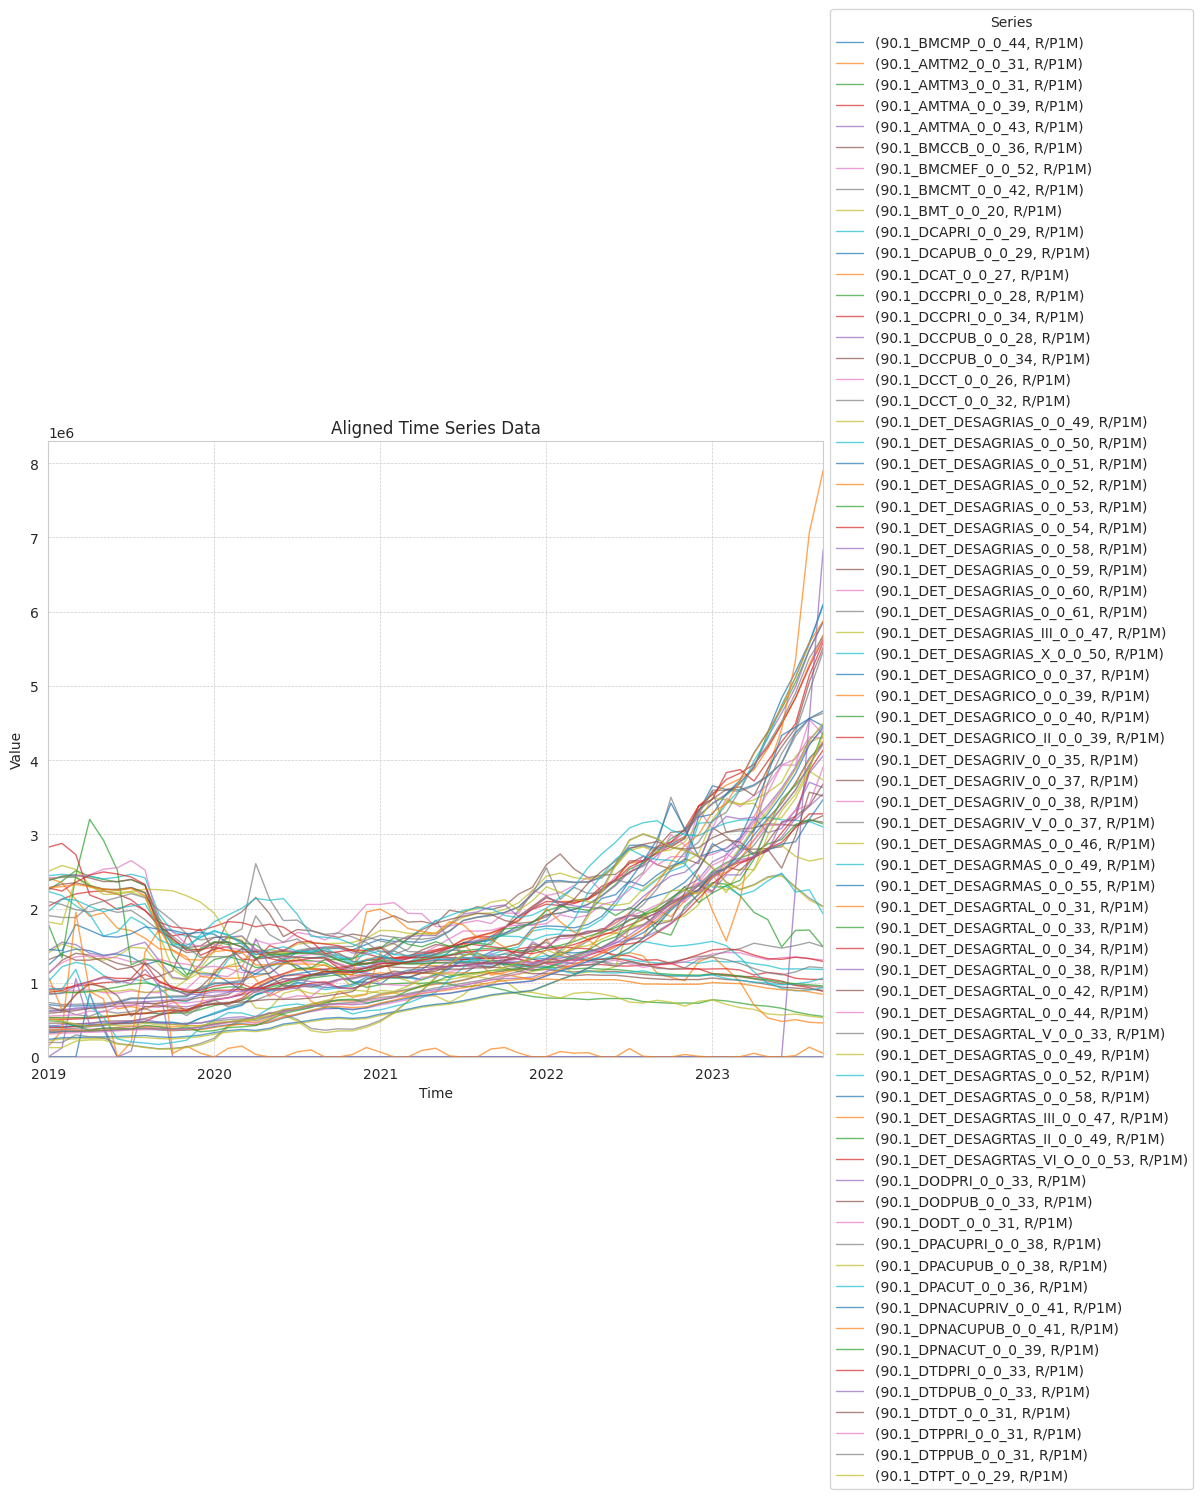

In [ ]:
dataset_no = '90.'

data_ = data.loc['2019':'2024']

dataset = data_[[col for col in data_.columns if dataset_no == col[0][:len(dataset_no)]]].dropna(how = 'all')
# dataset.plot()

top_consultas = consultas.loc[consultas.serie_id.str.startswith(dataset_no)].sort_values(by = 'consultas_180_dias', ascending = False)
display(top_consultas.head(10))

aligned_data = align_time_series(dataset, anchor_col=top_consultas.serie_id.values[0])


import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 8))

aligned_data.dropna(how='all').plot(ax=ax, linewidth=1, alpha=0.7)
ax.grid(True, linestyle='--', linewidth=0.5)
ax.set(ylim=(0, None), title='Aligned Time Series Data', xlabel='Time', ylabel='Value')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Series', fontsize=10)

plt.tight_layout()
plt.show()


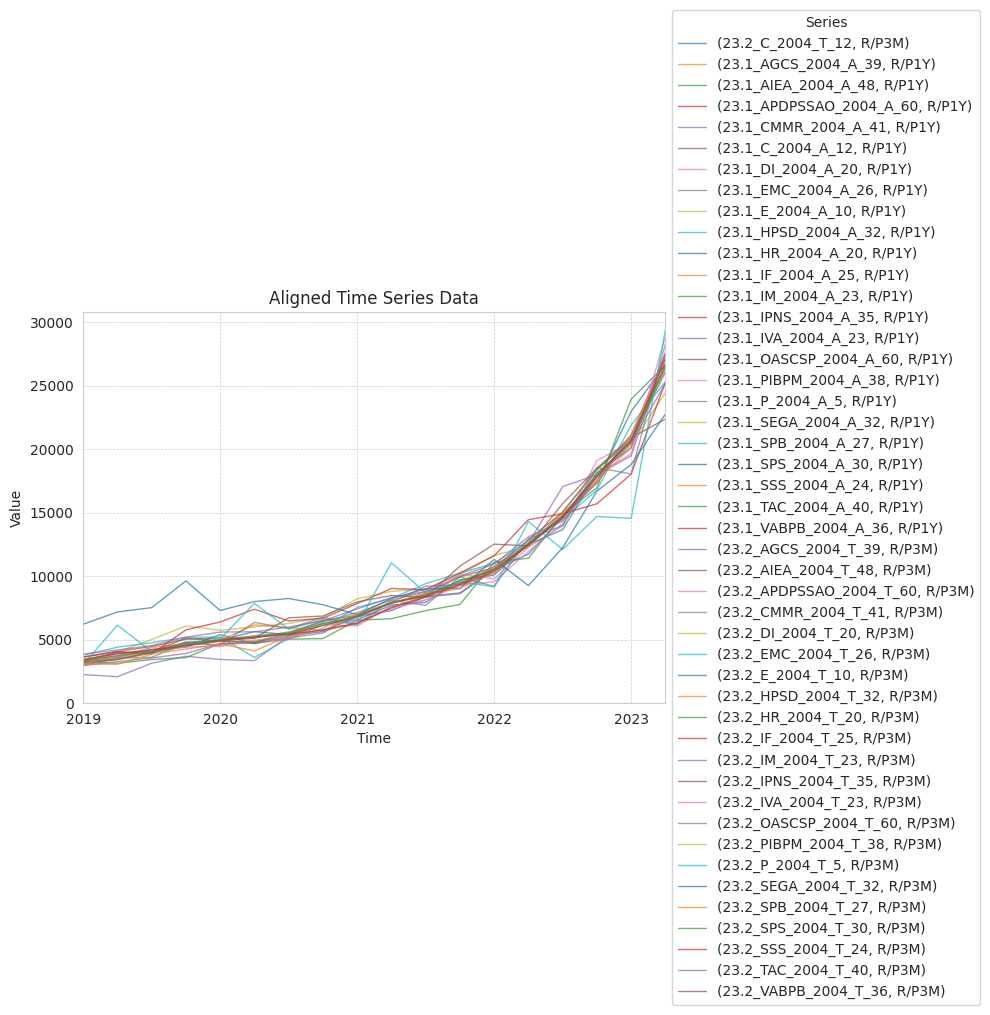

In [ ]:
LinearRegression().fit(X, y_log)

ValueError: Input y contains infinity or a value too large for dtype('float64').

In [ ]:
consultas.loc[consultas.serie_id.str.startswith('89.')][['serie_id', 'consultas_180_dias']]

In [ ]:
consultas

NameError: name 'consultas' is not defined